In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator

#▶️DATASET IMPORT

---



In [ ]:
# data import with Google Drive (run on Colab)
from google.colab import drive
drive.mount('/content/drive')

catch_by_sector = pd.read_csv("/content/drive/MyDrive/capstone_data/global-fishery-catch-by-sector.csv")
capture_production = pd.read_csv("/content/drive/MyDrive/capstone_data/capture-fishery-production.csv")
farmed_production = pd.read_csv("/content/drive/MyDrive/capstone_data/aquaculture-farmed-fish-production.csv")
consumption_per_capita = pd.read_csv("/content/drive/MyDrive/capstone_data/fish-and-seafood-consumption-per-capita.csv")
sustain_levels = pd.read_csv("/content/drive/MyDrive/capstone_data/fish-stocks-within-sustainable-levels.csv")

In [ ]:
# data import from local directory (run locally)
import os

folder_path = r"D:/Konpaleo/MLDS/Projects/Capstone/Fish_Overfishing_Data"   # set the right paths

catch_by_sector = pd.read_csv(os.path.join(folder_path, "global-fishery-catch-by-sector.csv"))
capture_production = pd.read_csv(os.path.join(folder_path, "capture-fishery-production.csv"))
farmed_production = pd.read_csv(os.path.join(folder_path, "aquaculture-farmed-fish-production.csv"))
consumption_per_capita = pd.read_csv(os.path.join(folder_path, "fish-and-seafood-consumption-per-capita.csv"))
sustain_levels = pd.read_csv(os.path.join(folder_path, "fish-stocks-within-sustainable-levels.csv"))

#▶️DATASET EXPLORATION

---



In [ ]:
# print(capture_production.info())
# print(capture_production.describe())

# print(catch_by_sector.info())
# print(catch_by_sector.describe())

# print(farmed_production.info())
# print(farmed_production.describe())

# print(consumption_per_capita.info())
# print(consumption_per_capita.describe())

# print(sustain_levels.info())
# print(sustain_levels.describe())

##catch_by_sector

In [ ]:
print(catch_by_sector.info())
# catch_by_sector.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Entity                               61 non-null     object
 1   Code                                 61 non-null     object
 2   Year                                 61 non-null     int64 
 3   Artisanal (small-scale commercial)   61 non-null     int64 
 4   Discards                             61 non-null     int64 
 5   Industrial (large-scale commercial)  61 non-null     int64 
 6   Recreational                         61 non-null     int64 
 7   Subsistence                          61 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.9+ KB
None


In [ ]:
df1 = catch_by_sector.copy()
df1.rename(columns={"Artisanal (small-scale commercial)": "Artisanal", "Industrial (large-scale commercial)": "Industrial"}, inplace=True)
df1 = df1[["Entity", "Code", "Year", "Industrial", "Artisanal", "Discards", "Subsistence", "Recreational"]]
data_cols = ["Industrial", "Artisanal", "Discards", "Subsistence", "Recreational"]
for col in data_cols :  # kg to to metric tonnes conversion
  df1[col] /= 1000

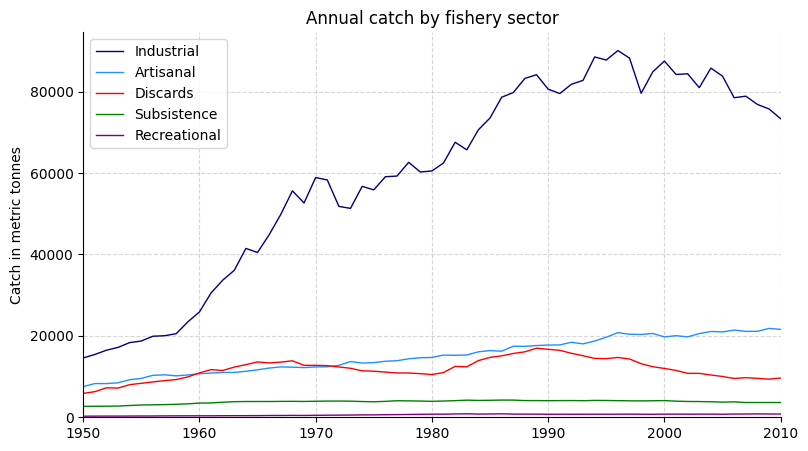

In [ ]:
# all sectors time series plot
plt.figure(figsize=(9, 5))
plt.title("Annual catch by fishery sector")
plt.ylabel("Catch in metric tonnes")
plt.plot(df1["Year"], df1["Industrial"], color="navy", label="Industrial", linewidth=1)
plt.plot(df1["Year"], df1["Artisanal"], color="dodgerblue", label="Artisanal", linewidth=1)
plt.plot(df1["Year"], df1["Discards"], color="red", label="Discards", linewidth=1)
plt.plot(df1["Year"], df1["Subsistence"], color="green", label="Subsistence", linewidth=1)
plt.plot(df1["Year"], df1["Recreational"], color="purple", label="Recreational", linewidth=1)
plt.legend()
plt.xlim(df1["Year"].iloc[0], df1["Year"].iloc[-1])
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

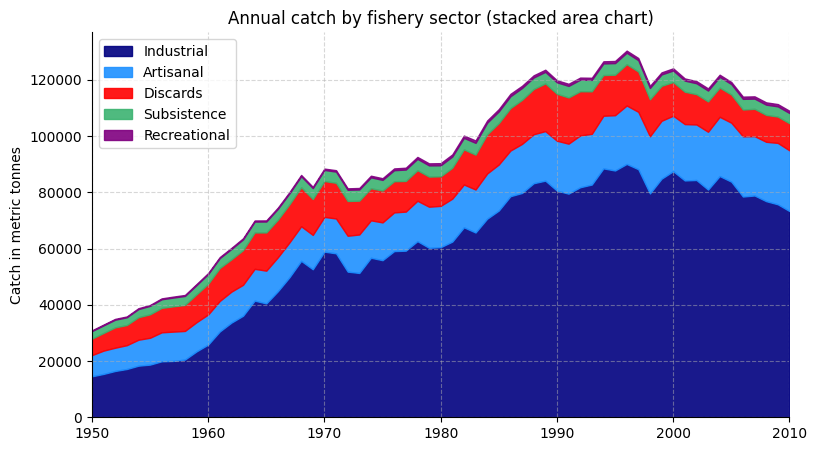

In [ ]:
# stacked area chart
plt.figure(figsize=(9, 5))
plt.title("Annual catch by fishery sector (stacked area chart)")
plt.ylabel("Catch in metric tonnes")
plt.fill_between(df1["Year"], 0, df1["Industrial"], color="navy", alpha=0.9, label="Industrial")
plt.fill_between(df1["Year"], df1["Industrial"], df1["Industrial"] + df1["Artisanal"], color="dodgerblue", alpha=0.9, label="Artisanal")
plt.fill_between(df1["Year"], df1["Industrial"] + df1["Artisanal"], df1["Industrial"] + df1["Artisanal"]\
                 + df1["Discards"], color="red", alpha=0.9, label="Discards")
plt.fill_between(df1["Year"], df1["Industrial"] + df1["Artisanal"] + df1["Discards"], df1["Industrial"] + df1["Artisanal"] + df1["Discards"]\
                 + df1["Subsistence"], color="mediumseagreen", alpha=0.9, label="Subsistence")
plt.fill_between(df1["Year"], df1["Industrial"] + df1["Artisanal"] + df1["Discards"] + df1["Subsistence"], df1["Industrial"] + df1["Artisanal"] + df1["Discards"] + df1["Subsistence"]\
                 + df1["Recreational"], color="purple", alpha=0.9, label="Recreational")
plt.legend(loc="upper left")
plt.xlim(df1["Year"].iloc[0], df1["Year"].iloc[-1])
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# plt.figure(figsize=(9, 5))
# plt.title("Small-scale sectors annual catch")
# plt.ylabel("Catch in metric tonnes")
# plt.plot(df1["Year"], df1["Subsistence"], color="green", label="Subsistence")
# plt.plot(df1["Year"], df1["Recreational"], color="purple", label="Recreational")
# plt.legend()
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

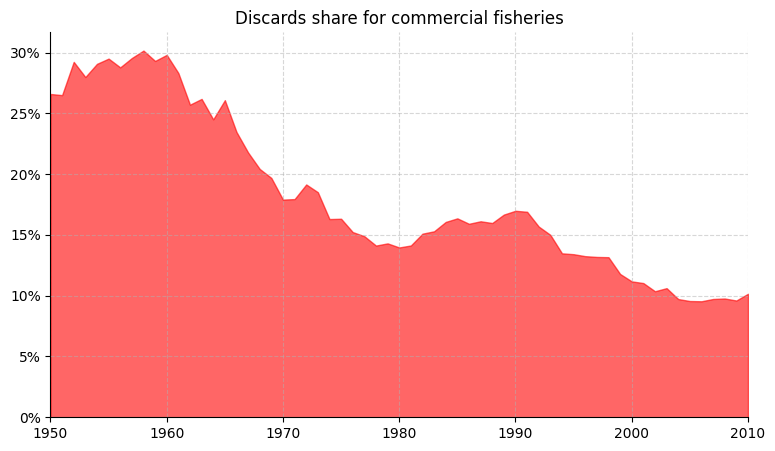

In [ ]:
# Discards percentage of commercial catch
commercial_catch = df1["Industrial"] + df1["Artisanal"]
df1_measures = df1.copy() # creating an extended dataframe
df1_measures["Discards-commercial catch percentage"] = (df1["Discards"] / commercial_catch) * 100

plt.figure(figsize=(9, 5))
plt.title("Discards share for commercial fisheries")
plt.fill_between(df1_measures["Year"], 0, df1_measures["Discards-commercial catch percentage"], color="red", alpha=0.6)
plt.xlim(df1["Year"].iloc[0], df1["Year"].iloc[-1])
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.show()

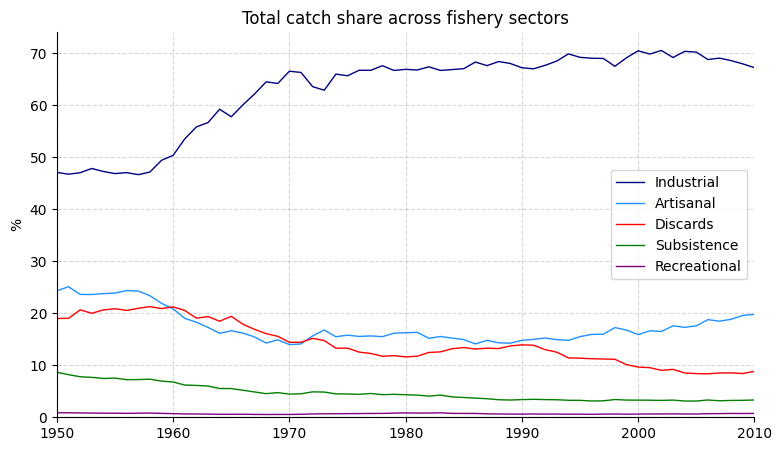

In [ ]:
# Total catch percentage of each fishery sector
df1_measures["Total catch"] = df1[data_cols].sum(axis=1)
for col in data_cols :
  df1_measures[col + " " + "percentage"] = (df1[col] / df1_measures["Total catch"]) * 100

plt.figure(figsize=(9, 5))
plt.title("Total catch share across fishery sectors")
plt.ylabel("%")
plt.plot(df1_measures["Year"], df1_measures["Industrial percentage"], color="navy", label="Industrial", linewidth=1)
plt.plot(df1_measures["Year"], df1_measures["Artisanal percentage"], color="dodgerblue", label="Artisanal", linewidth=1)
plt.plot(df1_measures["Year"], df1_measures["Discards percentage"], color="red", label="Discards", linewidth=1)
plt.plot(df1_measures["Year"], df1_measures["Subsistence percentage"], color="green", label="Subsistence", linewidth=1)
plt.plot(df1_measures["Year"], df1_measures["Recreational percentage"], color="purple", label="Recreational", linewidth=1)
plt.legend()
plt.xlim(df1_measures["Year"].iloc[0], df1_measures["Year"].iloc[-1])
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

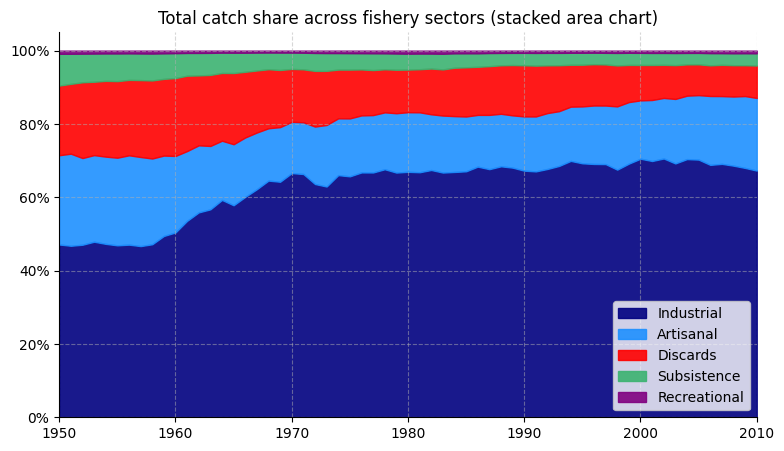

In [ ]:
# Stacked area chart of catch percentage of each fishery sector
plt.figure(figsize=(9, 5))
plt.title("Total catch share across fishery sectors (stacked area chart)")
plt.fill_between(df1_measures["Year"], 0, df1_measures["Industrial percentage"], color="navy", alpha=0.9, label="Industrial")
plt.fill_between(df1_measures["Year"], df1_measures["Industrial percentage"], df1_measures["Industrial percentage"] + df1_measures["Artisanal percentage"], color="dodgerblue", alpha=0.9, label="Artisanal")
plt.fill_between(df1_measures["Year"], df1_measures["Industrial percentage"] + df1_measures["Artisanal percentage"], df1_measures["Industrial percentage"] + df1_measures["Artisanal percentage"]\
                 + df1_measures["Discards percentage"], color="red", alpha=0.9, label="Discards")
plt.fill_between(df1_measures["Year"], df1_measures["Industrial percentage"] + df1_measures["Artisanal percentage"] + df1_measures["Discards percentage"], df1_measures["Industrial percentage"] + df1_measures["Artisanal percentage"] + df1_measures["Discards percentage"]\
                 + df1_measures["Subsistence percentage"], color="mediumseagreen", alpha=0.9, label="Subsistence")
plt.fill_between(df1_measures["Year"], df1_measures["Industrial percentage"] + df1_measures["Artisanal percentage"] + df1_measures["Discards percentage"] + df1_measures["Subsistence percentage"], df1_measures["Industrial percentage"] + df1_measures["Artisanal percentage"] + df1_measures["Discards percentage"] + df1_measures["Subsistence percentage"]\
                 + df1_measures["Recreational percentage"], color="purple", alpha=0.9, label="Recreational")
plt.legend(loc="lower right")
plt.xlim(df1_measures["Year"].iloc[0], df1_measures["Year"].iloc[-1])
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.show()

##capture_production

In [ ]:
print(capture_production.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14516 entries, 0 to 14515
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      14516 non-null  object 
 1   Code                                        11743 non-null  object 
 2   Year                                        14516 non-null  int64  
 3   Capture fisheries production (metric tons)  14516 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 453.8+ KB
None


In [ ]:
df2 = capture_production.copy()
df2.rename(columns={"Capture fisheries production (metric tons)":"Capture production"}, inplace=True)

In [ ]:
for value in df2["Entity"].unique() :
  print(value)

Afghanistan
Africa Eastern and Southern
Africa Western and Central
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Arab World
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Caribbean Small States
Cayman Islands
Central African Republic
Central Europe and the Baltics
Chad
Channel Islands
Chile
China
Colombia
Comoros
Congo
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD)
East Asia & Pacific (excluding high income)
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD)
Europe & Central Asia (exc

In [ ]:
for value in df2.loc[pd.isna(df2["Code"]), "Entity"].unique() :
  print(value)

Africa Eastern and Southern
Africa Western and Central
Arab World
Caribbean Small States
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD)
East Asia & Pacific (excluding high income)
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD)
Europe & Central Asia (excluding high income)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
Late-demographic dividend
Latin America & Caribbean
Latin America & Caribbean (IDA & IBRD)
Latin America & Caribbean (excluding high income)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (IDA & IBRD)
Middle East & North Africa (excluding high income)
Middle income
North America
OECD members
Other small states
Pacific island small states
Post-demographic dividend
Pre-demogra

In [ ]:
# New dfs for the major fishing regions of the world
df2_world = df2.loc[df2["Entity"] == "World", ["Year","Capture production"]].reset_index(drop=True)
# temp_df = df1_measures.join(df2_world.set_index("Year"), on="Year", how="inner", sort=True)
# temp_df = temp_df[["Year", "Total catch", "Capture production"]]
df2_EAP = df2.loc[df2["Entity"] == "East Asia & Pacific"].reset_index(drop=True)
df2_ECA = df2.loc[df2["Entity"] == "Europe & Central Asia"].reset_index(drop=True)
df2_LAC = df2.loc[df2["Entity"] == "Latin America & Caribbean"].reset_index(drop=True)
df2_MENA = df2.loc[df2["Entity"] == "Middle East & North Africa"].reset_index(drop=True)
df2_NA = df2.loc[df2["Entity"] == "North America"].reset_index(drop=True)
df2_SAS = df2.loc[df2["Entity"] == "South Asia"].reset_index(drop=True)
df2_SAF = df2.loc[df2["Entity"] == "Sub-Saharan Africa"].reset_index(drop=True)

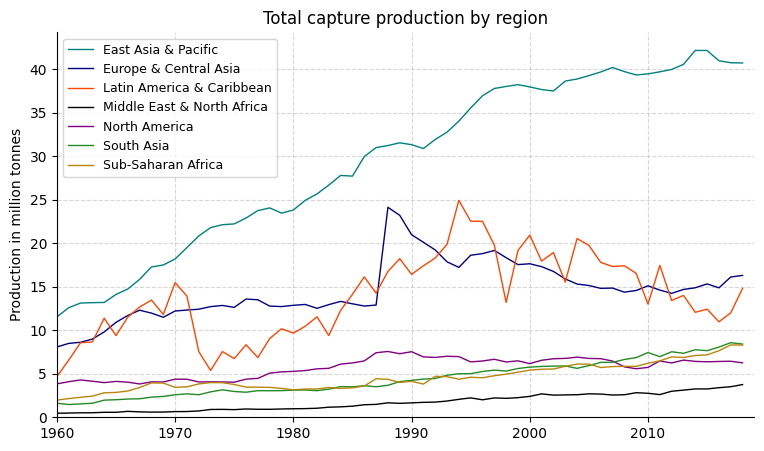

In [ ]:
# all regions time series plot
plt.figure(figsize=(9, 5))
plt.title("Total capture production by region")
plt.ylabel("Production in million tonnes")

plt.plot(df2_EAP["Year"], df2_EAP["Capture production"]/(10**6), color="teal", label="East Asia & Pacific", linewidth=1)
plt.plot(df2_ECA["Year"], df2_ECA["Capture production"]/(10**6), color="navy", label="Europe & Central Asia", linewidth=1)
plt.plot(df2_LAC["Year"], df2_LAC["Capture production"]/(10**6), color="orangered", label="Latin America & Caribbean", linewidth=1)
plt.plot(df2_MENA["Year"], df2_MENA["Capture production"]/(10**6), color="black", label="Middle East & North Africa", linewidth=1)
plt.plot(df2_NA["Year"], df2_NA["Capture production"]/(10**6), color="purple", label="North America", linewidth=1)
plt.plot(df2_SAS["Year"], df2_SAS["Capture production"]/(10**6), color="forestgreen", label="South Asia", linewidth=1)
plt.plot(df2_SAF["Year"], df2_SAF["Capture production"]/(10**6), color="darkgoldenrod", label="Sub-Saharan Africa", linewidth=1)

plt.legend(fontsize=9)
plt.xlim(1960, 2019)
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

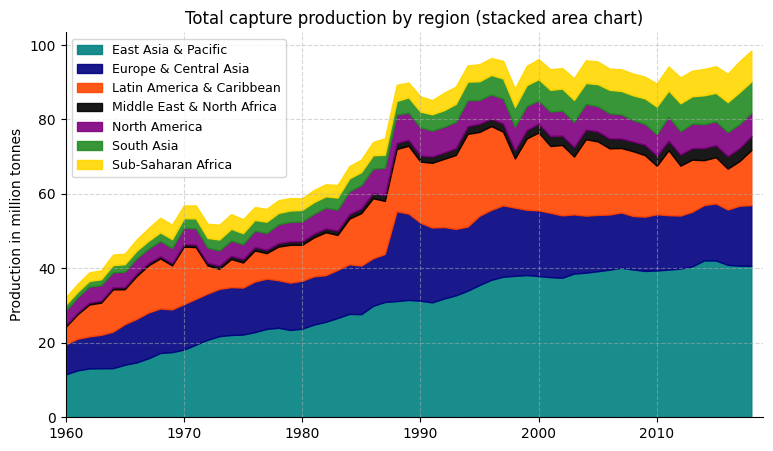

In [ ]:
# stacked area chart
plt.figure(figsize=(9, 5))
plt.title("Total capture production by region (stacked area chart)")
plt.ylabel("Production in million tonnes")

plt.fill_between(df2_EAP["Year"], 0, df2_EAP["Capture production"]/(10**6), color="teal", alpha=0.9, label="East Asia & Pacific")
plt.fill_between(df2_ECA["Year"], df2_EAP["Capture production"]/(10**6), (df2_EAP["Capture production"]+df2_ECA["Capture production"])/(10**6), color="navy", alpha=0.9, label="Europe & Central Asia")
plt.fill_between(df2_LAC["Year"], (df2_EAP["Capture production"]+df2_ECA["Capture production"])/(10**6), (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"])/(10**6), color="orangered", alpha=0.9, label="Latin America & Caribbean")
plt.fill_between(df2_MENA["Year"], (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"])/(10**6), (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"]+df2_MENA["Capture production"])/(10**6), color="black", alpha=0.9, label="Middle East & North Africa")
plt.fill_between(df2_NA["Year"], (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"]+df2_MENA["Capture production"])/(10**6), (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"]+df2_MENA["Capture production"]+df2_NA["Capture production"])/(10**6), color="purple", alpha=0.9, label="North America")
plt.fill_between(df2_SAS["Year"], (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"]+df2_MENA["Capture production"]+df2_NA["Capture production"])/(10**6), (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"]+df2_MENA["Capture production"]+df2_NA["Capture production"]+df2_SAS["Capture production"])/(10**6), color="forestgreen", alpha=0.9, label="South Asia")
plt.fill_between(df2_SAF["Year"], (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"]+df2_MENA["Capture production"]+df2_NA["Capture production"]+df2_SAS["Capture production"])/(10**6), (df2_EAP["Capture production"]+df2_ECA["Capture production"]+df2_LAC["Capture production"]+df2_MENA["Capture production"]+df2_NA["Capture production"]+df2_SAS["Capture production"]+df2_SAF["Capture production"])/(10**6), color="gold", alpha=0.9, label="Sub-Saharan Africa")

plt.legend(fontsize=9, loc="upper left")
plt.xlim(1960, 2019)
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


##farmed_production

In [ ]:
print(farmed_production.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Entity                                11657 non-null  object 
 1   Code                                  8884 non-null   object 
 2   Year                                  11657 non-null  int64  
 3   Aquaculture production (metric tons)  11657 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 364.4+ KB
None


In [ ]:
df3 = farmed_production.copy()
df3.rename(columns={"Aquaculture production (metric tons)":"Aquaculture production"}, inplace=True)

In [ ]:
for value in df3.loc[pd.isna(df3["Code"]), "Entity"].unique():
  print(value)

Africa Eastern and Southern
Africa Western and Central
Arab World
Caribbean Small States
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD)
East Asia & Pacific (excluding high income)
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD)
Europe & Central Asia (excluding high income)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
Late-demographic dividend
Latin America & Caribbean
Latin America & Caribbean (IDA & IBRD)
Latin America & Caribbean (excluding high income)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (IDA & IBRD)
Middle East & North Africa (excluding high income)
Middle income
North America
OECD members
Other small states
Pacific island small states
Post-demographic dividend
Pre-demogra

In [ ]:
# New dfs for the major fishing regions of the world
df3_world = df3.loc[df3["Entity"] == "World", ["Year","Aquaculture production"]].reset_index(drop=True)
df3_EAP = df3.loc[df3["Entity"] == "East Asia & Pacific"].reset_index(drop=True)
df3_ECA = df3.loc[df3["Entity"] == "Europe & Central Asia"].reset_index(drop=True)
df3_LAC = df3.loc[df3["Entity"] == "Latin America & Caribbean"].reset_index(drop=True)
df3_MENA = df3.loc[df3["Entity"] == "Middle East & North Africa"].reset_index(drop=True)
df3_NA = df3.loc[df3["Entity"] == "North America"].reset_index(drop=True)
df3_SAS = df3.loc[df3["Entity"] == "South Asia"].reset_index(drop=True)
df3_SAF = df3.loc[df3["Entity"] == "Sub-Saharan Africa"].reset_index(drop=True)

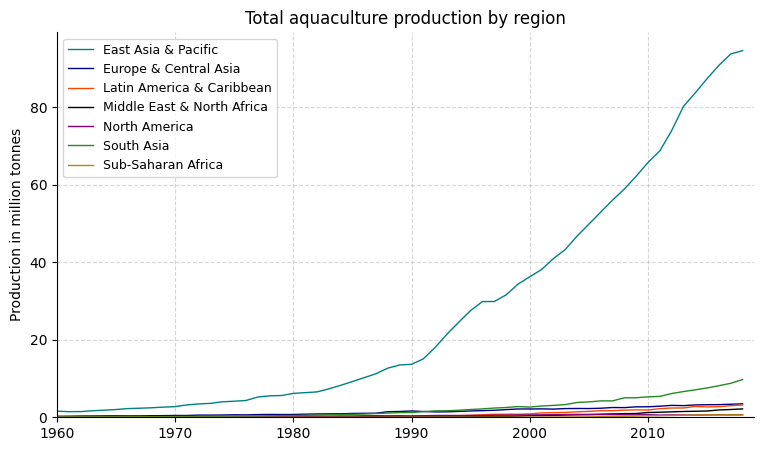

In [ ]:
# all regions time series plot
plt.figure(figsize=(9, 5))
plt.title("Total aquaculture production by region")
plt.ylabel("Production in million tonnes")

plt.plot(df3_EAP["Year"], df3_EAP["Aquaculture production"]/(10**6), color="teal", label="East Asia & Pacific", linewidth=1)
plt.plot(df3_ECA["Year"], df3_ECA["Aquaculture production"]/(10**6), color="navy", label="Europe & Central Asia", linewidth=1)
plt.plot(df3_LAC["Year"], df3_LAC["Aquaculture production"]/(10**6), color="orangered", label="Latin America & Caribbean", linewidth=1)
plt.plot(df3_MENA["Year"], df3_MENA["Aquaculture production"]/(10**6), color="black", label="Middle East & North Africa", linewidth=1)
plt.plot(df3_NA["Year"], df3_NA["Aquaculture production"]/(10**6), color="purple", label="North America", linewidth=1)
plt.plot(df3_SAS["Year"], df3_SAS["Aquaculture production"]/(10**6), color="forestgreen", label="South Asia", linewidth=1)
plt.plot(df3_SAF["Year"], df3_SAF["Aquaculture production"]/(10**6), color="darkgoldenrod", label="Sub-Saharan Africa", linewidth=1)

plt.legend(fontsize=9)
plt.xlim(1960, 2019)
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

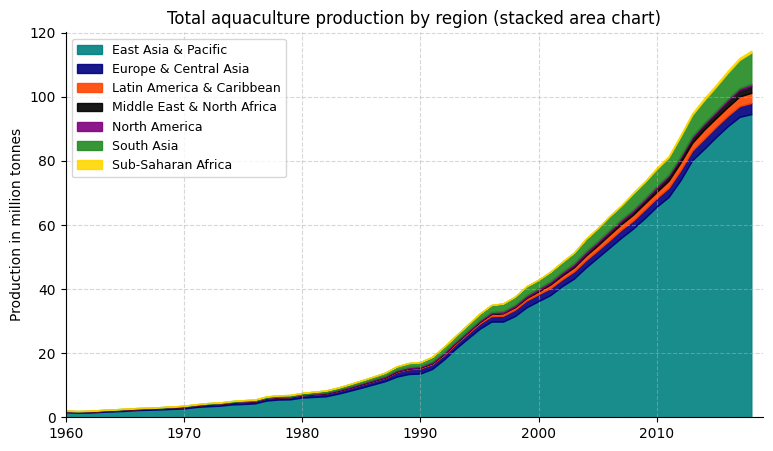

In [ ]:
# stacked area chart
plt.figure(figsize=(9, 5))
plt.title("Total aquaculture production by region (stacked area chart)")
plt.ylabel("Production in million tonnes")

plt.fill_between(df3_EAP["Year"], 0, df3_EAP["Aquaculture production"]/(10**6), color="teal", alpha=0.9, label="East Asia & Pacific")
plt.fill_between(df3_ECA["Year"], df3_EAP["Aquaculture production"]/(10**6), (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"])/(10**6), color="navy", alpha=0.9, label="Europe & Central Asia")
plt.fill_between(df3_LAC["Year"], (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"])/(10**6), (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"])/(10**6), color="orangered", alpha=0.9, label="Latin America & Caribbean")
plt.fill_between(df3_MENA["Year"], (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"])/(10**6), (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"]+df3_MENA["Aquaculture production"])/(10**6), color="black", alpha=0.9, label="Middle East & North Africa")
plt.fill_between(df3_NA["Year"], (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"]+df3_MENA["Aquaculture production"])/(10**6), (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"]+df3_MENA["Aquaculture production"]+df3_NA["Aquaculture production"])/(10**6), color="purple", alpha=0.9, label="North America")
plt.fill_between(df3_SAS["Year"], (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"]+df3_MENA["Aquaculture production"]+df3_NA["Aquaculture production"])/(10**6), (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"]+df3_MENA["Aquaculture production"]+df3_NA["Aquaculture production"]+df3_SAS["Aquaculture production"])/(10**6), color="forestgreen", alpha=0.9, label="South Asia")
plt.fill_between(df3_SAF["Year"], (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"]+df3_MENA["Aquaculture production"]+df3_NA["Aquaculture production"]+df3_SAS["Aquaculture production"])/(10**6), (df3_EAP["Aquaculture production"]+df3_ECA["Aquaculture production"]+df3_LAC["Aquaculture production"]+df3_MENA["Aquaculture production"]+df3_NA["Aquaculture production"]+df3_SAS["Aquaculture production"]+df3_SAF["Aquaculture production"])/(10**6), color="gold", alpha=0.9, label="Sub-Saharan Africa")

plt.legend(fontsize=9, loc="upper left")
plt.xlim(1960, 2019)
plt.ylim(0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


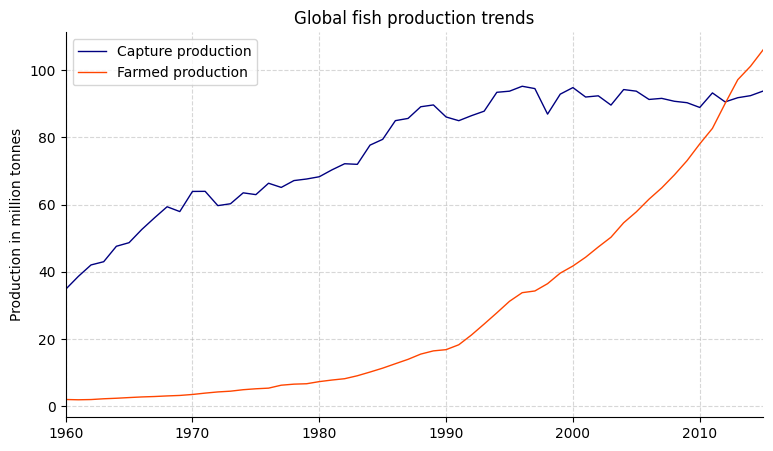

In [ ]:
# Capture VS Farmed world production
plt.figure(figsize=(9, 5))
plt.title("Global fish production trends")
plt.ylabel("Production in million tonnes")

plt.plot(df2_world["Year"], df2_world["Capture production"]/(1e06), label="Capture production", color="navy", linewidth=1)
plt.plot(df3_world["Year"], df3_world["Aquaculture production"]/(1e06), label="Farmed production", color="orangered", linewidth=1)

plt.xlim(df2_world["Year"].iloc[0], df2_world["Year"].iloc[-1])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##consumption_per_capita

In [ ]:
print(consumption_per_capita.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 4 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Entity                                                          11028 non-null  object 
 1   Code                                                            9294 non-null   object 
 2   Year                                                            11028 non-null  int64  
 3   Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)  11028 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 344.8+ KB
None


In [ ]:
df4 = consumption_per_capita.copy()
df4.rename(columns={"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)":"Consumption(kg/capita/yr)"}, inplace=True)

In [ ]:
df4.groupby("Entity").sum("Consumption(kg/capita/yr)")\
    .sort_values(by="Consumption(kg/capita/yr)", ascending=False).head(20)

Year  Consumption(kg/capita/yr)
Entity                                                
Maldives             113373                    6888.51
Iceland              113373                    4823.15
Kiribati             113373                    3889.64
Micronesia (region)  105311                    3584.59
Japan                113373                    3496.80
Hong Kong            113373                    3144.60
Portugal             113373                    3053.25
Norway               113373                    2623.43
Malaysia             113373                    2547.07
Solomon Islands      113373                    2532.75
Antigua and Barbuda  113373                    2450.43
South Korea          113373                    2436.14
French Polynesia     113373                    2419.84
Samoa                113373                    2304.69
Polynesia            105311                    2157.74
Bermuda              105311                    2139.49
Spain                113373                    2093.81
Guyana               113373                    2032.87
Gabon                113373                    1994.56
Vanuatu              113373                    1984.66

In [ ]:
# New dfs for selected fishing regions of the world
df4_world = df4.loc[df4["Entity"] == "World", ["Year", "Consumption(kg/capita/yr)"]].reset_index(drop=True)
df4_mald = df4.loc[df4["Entity"] == "Maldives"].reset_index(drop=True)
df4_ice = df4.loc[df4["Entity"] == "Iceland"].reset_index(drop=True)
df4_jap = df4.loc[df4["Entity"] == "Japan"].reset_index(drop=True)
df4_port = df4.loc[df4["Entity"] == "Portugal"].reset_index(drop=True)
df4_gr = df4.loc[df4["Entity"] == "Greece"].reset_index(drop=True)

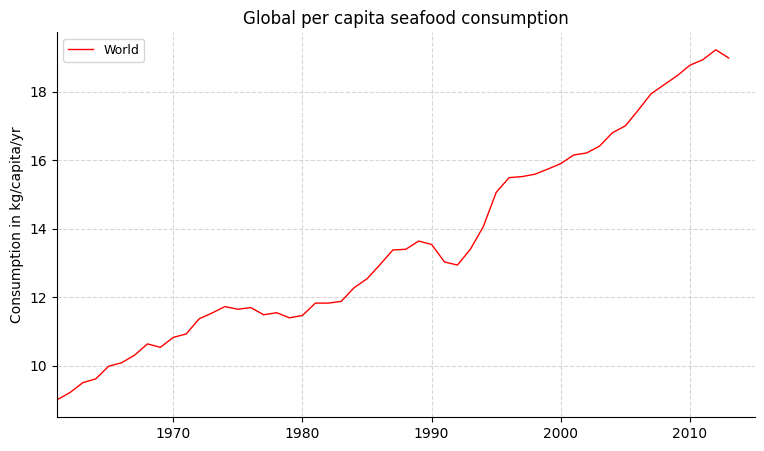

In [ ]:
# time series plot for world
plt.figure(figsize=(9, 5))
plt.title("Global per capita seafood consumption")
plt.ylabel("Consumption in kg/capita/yr")

plt.plot(df4_world["Year"], df4_world["Consumption(kg/capita/yr)"], color="red", label="World", linestyle='-',linewidth=1)

plt.legend(fontsize=9)
plt.xlim(1961, 2015)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

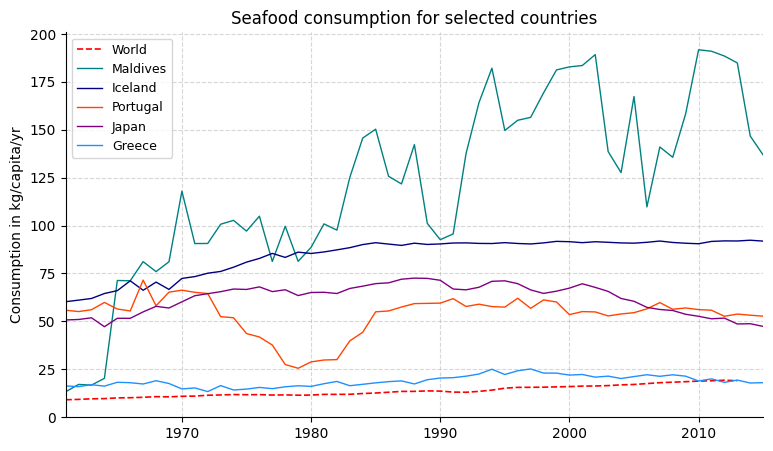

In [ ]:
# time series plot for selected countries
plt.figure(figsize=(9, 5))
plt.title("Seafood consumption for selected countries")
plt.ylabel("Consumption in kg/capita/yr")

plt.plot(df4_world["Year"], df4_world["Consumption(kg/capita/yr)"], color="red", label="World", linestyle='--',linewidth=1.2)
plt.plot(df4_mald["Year"], df4_mald["Consumption(kg/capita/yr)"], color="teal", label="Maldives", linewidth=1)
plt.plot(df4_ice["Year"], df4_ice["Consumption(kg/capita/yr)"], color="navy", label="Iceland", linewidth=1)
plt.plot(df4_port["Year"], df4_port["Consumption(kg/capita/yr)"], color="orangered", label="Portugal", linewidth=1)
plt.plot(df4_jap["Year"], df4_jap["Consumption(kg/capita/yr)"], color="purple", label="Japan", linewidth=1)
plt.plot(df4_gr["Year"], df4_gr["Consumption(kg/capita/yr)"], color="dodgerblue", label="Greece", linewidth=1)


plt.legend(fontsize=9)
plt.xlim(1961, 2015)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##sustain_levels

In [ ]:
print(sustain_levels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Entity                                                                   51 non-null     object 
 1   Code                                                                     21 non-null     object 
 2   Year                                                                     51 non-null     int64  
 3   Share of fish stocks within biologically sustainable levels (FAO, 2020)  51 non-null     float64
 4   Share of fish stocks that are overexploited                              51 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB
None


In [ ]:
df5 = sustain_levels.copy()
df5.rename(columns={"Share of fish stocks within biologically sustainable levels (FAO, 2020)":"sustainable",\
                    "Share of fish stocks that are overexploited":"overexploited"}, inplace=True)
df5

Entity      Code  Year  sustainable  overexploited
0      Eastern Central Atlantic       NaN  2015    57.142860      42.857140
1      Eastern Central Atlantic       NaN  2017    57.142857      42.857143
2       Eastern Central Pacific       NaN  2015    86.666670      13.333330
3       Eastern Central Pacific       NaN  2017    86.666667      13.333333
4          Eastern Indian Ocean       NaN  2015    73.076920      26.923080
5          Eastern Indian Ocean       NaN  2017    68.627451      31.372549
6   Mediterranean and Black Sea       NaN  2015    37.837840      62.162160
7   Mediterranean and Black Sea       NaN  2017    37.500000      62.500000
8    Northeast Central Atlantic       NaN  2015    73.469390      26.530610
9    Northeast Central Atlantic       NaN  2017    79.310345      20.689655
10            Northeast Pacific       NaN  2015    85.714290      14.285710
11            Northeast Pacific       NaN  2017    83.870968      16.129032
12   Northwest Central Atlantic       NaN  2015    73.913040      26.086960
13   Northwest Central Atlantic       NaN  2017    56.250000      43.750000
14            Northwest Pacific       NaN  2015    82.692310      17.307690
15            Northwest Pacific       NaN  2017    65.384615      34.615385
16   Southeast Central Atlantic       NaN  2015    67.647060      32.352940
17   Southeast Central Atlantic       NaN  2017    67.647059      32.352941
18            Southeast Pacific       NaN  2015    38.461540      61.538460
19            Southeast Pacific       NaN  2017    45.454545      54.545455
20           Southwest Atlantic       NaN  2015    41.176470      58.823530
21           Southwest Atlantic       NaN  2017    46.666667      53.333333
22            Southwest Pacific       NaN  2015    74.074070      25.925930
23            Southwest Pacific       NaN  2017    84.615385      15.384615
24     Western Central Atlantic       NaN  2015    60.344830      39.655170
25     Western Central Atlantic       NaN  2017    61.403509      38.596491
26      Western Central Pacific       NaN  2015    82.608700      17.391300
27      Western Central Pacific       NaN  2017    77.551020      22.448980
28         Western Indian Ocean       NaN  2015    66.666670      33.333330
29         Western Indian Ocean       NaN  2017    68.292683      31.707317
30                        World  OWID_WRL  1974    90.000000      10.000000
31                        World  OWID_WRL  1978    91.463415       8.536585
32                        World  OWID_WRL  1979    86.982249      13.017751
33                        World  OWID_WRL  1981    86.419753      13.580247
34                        World  OWID_WRL  1983    83.333333      16.666667
35                        World  OWID_WRL  1985    81.818182      18.181818
36                        World  OWID_WRL  1987    75.675676      24.324324
37                        World  OWID_WRL  1989    73.369565      26.630435
38                        World  OWID_WRL  1990    81.868132      18.131868
39                        World  OWID_WRL  1992    76.777251      23.222749
40                        World  OWID_WRL  1995    74.324324      25.675676
41                        World  OWID_WRL  1997    76.966292      23.033708
42                        World  OWID_WRL  2000    72.790698      27.209302
43                        World  OWID_WRL  2004    76.394850      23.605150
44                        World  OWID_WRL  2006    72.371134      27.628866
45                        World  OWID_WRL  2008    67.021277      32.978723
46                        World  OWID_WRL  2009    69.553806      30.446194
47                        World  OWID_WRL  2011    71.078431      28.921569
48                        World  OWID_WRL  2013    68.000000      32.000000
49                        World  OWID_WRL  2015    66.666667      33.333333
50                        World  OWID_WRL  2017    65.849057      34.150943

In [ ]:
for value in df5["Entity"].unique() :
  print(value)

Eastern Central Atlantic
Eastern Central Pacific
Eastern Indian Ocean
Mediterranean and Black Sea
Northeast Central Atlantic
Northeast Pacific
Northwest Central Atlantic
Northwest Pacific
Southeast Central Atlantic
Southeast Pacific
Southwest Atlantic
Southwest Pacific
Western Central Atlantic
Western Central Pacific
Western Indian Ocean
World


In [ ]:
df5_world = df5.loc[df5["Entity"]=="World", ["Year", "sustainable"]].reset_index(drop=True)

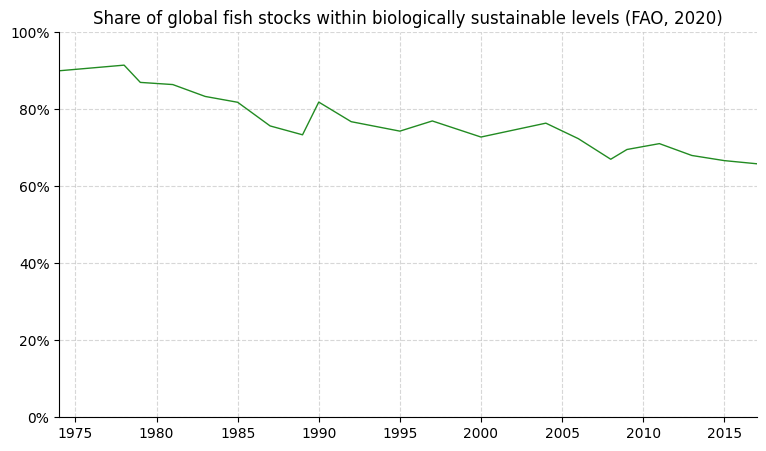

In [ ]:
# time series plot
plt.figure(figsize=(9, 5))
plt.title("Share of global fish stocks within biologically sustainable levels (FAO, 2020)")

plt.plot(df5_world["Year"], df5_world["sustainable"], label="World", color="forestgreen", linewidth=1)
plt.xlim(df5_world["Year"].iloc[0], df5_world["Year"].iloc[-1])
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

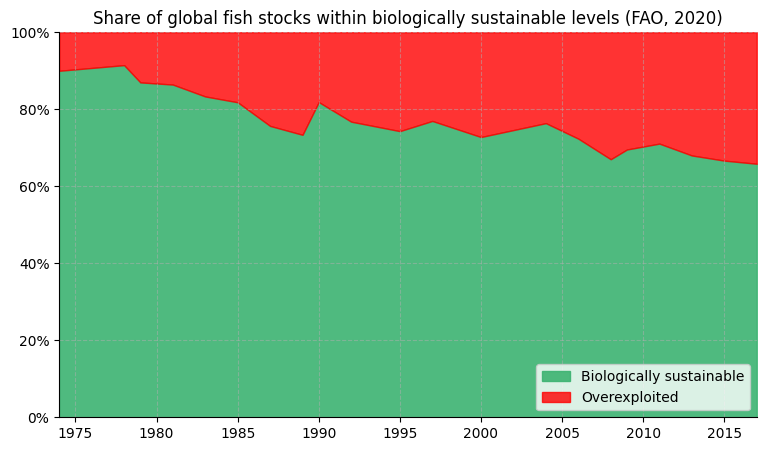

In [ ]:
# stacked area chart
plt.figure(figsize=(9, 5))
plt.title("Share of global fish stocks within biologically sustainable levels (FAO, 2020)")

plt.fill_between(df5_world["Year"], 0, df5_world["sustainable"], label="Biologically sustainable", color="mediumseagreen", alpha=0.9)
plt.fill_between(df5_world["Year"], df5_world["sustainable"], 100, label="Overexploited", color="red", alpha=0.8)
plt.legend(fontsize=10, loc="lower right")
plt.xlim(df5_world["Year"].iloc[0], df5_world["Year"].iloc[-1])
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

#▶️TIME SERIES CLUSTERING

---
* Merge the *capture*, *farmed* and *consumption* datasets
* Delete all aggregated entities from the merged dataset (World, High income, Europe etc.) so only countries are left.
* Reshape the df so that *Entity* (country) is the key and *Years* are the features with *Capture, Farmed, Consumption* as the values (the feature vectors should be one per row).
* Handle missing values with regression and/or time series modeling.
* Perform PCA so that we reduce the features to 2 (PC1, PC2).
* Run clustering algorithms (KMeans, DBSCAN etc.) on the reduced data.
* Visualize the clusters using PC1 and PC2 as the axes.
* Interpret and compare the clustering results







##Creating the merged dataframe

In [ ]:
df_capture = df2[pd.notna(df2["Code"])]
df_capture = df_capture.drop('Code', axis=1)

df_farmed = df3[pd.notna(df3["Code"])]
df_farmed = df_farmed.drop('Code', axis=1)

df_consumption = df4.drop('Code', axis=1)

In [ ]:
foo = pd.merge(df_capture, df_farmed, on=['Entity', 'Year'], how='inner')
df = pd.merge(foo, df_consumption, on=['Entity', 'Year'], how='inner')
df_ts = df.copy()

In [ ]:
# the final df should have 1 row for each country and 1 column for each feature-year combination
capture_pivot = df.pivot(index='Entity', columns='Year', values='Capture production')
farmed_pivot = df.pivot(index='Entity', columns='Year', values='Aquaculture production')
consumption_pivot = df.pivot(index='Entity', columns='Year', values='Consumption(kg/capita/yr)')

# columns order is [capture(all years)-----farmed(all years)-----consumption(all years)-----]
df_pivot = pd.concat([capture_pivot, farmed_pivot, consumption_pivot], axis=1)
df_pivot = df_pivot.dropna(axis=0)
df_pivot.head(5)

Year           1961      1962      1963      1964      1965      1966  \
Entity                                                                  
Albania      3200.0    2800.0    3000.0    3000.0    4000.0    4000.0   
Algeria     30400.0   21500.0   16900.0   17300.0   18300.0   20350.0   
Argentina  101900.0  101306.0  130571.0  168604.0  205000.0  250800.0   
Australia   57215.0   62656.0   67819.0   68242.0   77944.0   89514.0   
Austria      3540.0    3830.0    4000.0    4220.0    4370.0    4150.0   

Year           1967      1968      1969      1970  ...   2008   2009   2010  \
Entity                                             ...                        
Albania      5000.0    6000.0    7000.0    8000.0  ...   5.48   5.90   5.73   
Algeria     21150.0   18250.0   23150.0   24234.0  ...   4.70   4.75   3.81   
Argentina  240860.0  223121.0  202800.0  214500.0  ...   7.80   6.10   5.85   
Australia   93044.0  103495.0   91758.0   97996.0  ...  26.05  25.09  26.67   
Austria      3410.0    3260.0    2700.0    2330.0  ...  14.51  13.69  13.47   

Year        2011   2012   2013   2014   2015   2016   2017  
Entity                                                      
Albania     5.86   4.97   4.87   5.34   5.35   5.36   5.36  
Algeria     3.94   3.99   3.92   4.40   4.16   3.92   3.86  
Argentina   6.02   5.88   7.05   5.88   7.21   6.07   7.29  
Australia  25.96  25.97  26.09  26.41  24.82  25.70  25.87  
Austria    14.18  13.70  13.88  14.00  14.03  14.05  14.09  

[5 rows x 171 columns]

##Handling missing values

*   Zeros

In [ ]:
zero_counts = (df_pivot == 0).sum(axis=1)
zero_percentage = round((zero_counts / df_pivot.shape[1]) * 100, 2)
zero_percentage[zero_percentage > 15]

Entity
Guinea-Bissau           32.16
Kuwait                  16.96
Lesotho                 31.58
Samoa                   26.32
Suriname                18.13
United Arab Emirates    21.05
Uruguay                 15.20
Vanuatu                 25.15
dtype: float64

In [ ]:
# drop countries with too many zeros
threshold = 30

entities_to_drop = zero_percentage[zero_percentage > threshold].index
df = df_pivot.drop(entities_to_drop)

print(df.shape)

(68, 171)


*   NaN values

In [ ]:
def NaN_stats(df):
  '''Returns a df with the rows containing NaN, their count and percentage'''
  df_with_nans = df[df.isna().any(axis=1)]
  nan_count = df_with_nans.isna().sum(axis=1)
  nan_percentage = round(df_with_nans.isna().mean(axis=1) * 100, 2)
  stats_df = pd.DataFrame({'NaN count': nan_count, 'NaN percentage': nan_percentage})
  return stats_df

In [ ]:
nan_df = NaN_stats(df)
nan_df

Empty DataFrame
Columns: [NaN count, NaN percentage]
Index: []

In [ ]:
# drop countries with too many NaN values
threshold = 30

entities_to_drop = nan_df[nan_df['NaN percentage'] > threshold].index
df = df.drop(entities_to_drop)
nan_df = df[df.isna().any(axis=1)]

print(nan_df.shape)

(0, 171)


In [ ]:
# fill NaNs with a regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def fill_NaN_regression(df, degree):
  '''Returns the df with filled NaNs by doing regression in each row'''
  from sklearn import metrics
  df_fill = df.copy()
  performance_metrics = []

  # accessing each time series of the df
  for i, row in df_fill.iterrows():
    train_years = row[row.notna()].index    # years without NaN
    target_years = row[row.isna()].index    # years with NaN

    x_train = train_years.values.reshape(-1,1).astype(float)    # needs to be 2D
    y_train = row[train_years].values.astype(float)   # needs to be 1D (series)

    # polynomial transformation
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)

    # model fit
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # predict for missing years
    target_years_array = np.array(target_years).reshape(-1,1).astype(float)
    target_years_poly = poly.transform(target_years_array)
    y_target_pred = model.predict(target_years_poly)

    # fill NaNs
    df_fill.loc[i, target_years] = y_target_pred

    # performance metrics
    y_train_pred = model.predict(x_train_poly)
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)    # num of observations
    p = x_train_poly.shape[1] - 1   # num of predictors
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))   # adjusted R-squared
    performance_metrics.append((i, round(adj_r2, 4)))

  return df_fill, performance_metrics

In [ ]:
# regression model performance for each country
nan_filled, metrics = fill_NaN_regression(nan_df, degree=3)
for x in metrics: print(x)

In [ ]:
# # drop entities with poor regression performance
# nan_df = nan_df.drop(['Eswatini', 'Mongolia'])
# nan_filled = nan_filled.drop(['Eswatini', 'Mongolia'])
# df = df.drop(['Eswatini', 'Mongolia'])

In [ ]:
def plot_rows(df, title: str, legend: bool):
  '''Plots one time series for each row of the df'''
  plt.figure(figsize=(9, 5))
  plt.title(title)
  plt.ylabel("Production in metric tonnes")
  for i, row in df.iterrows():
    plt.plot(row.index, row.values, label=i, linestyle='-',linewidth=1)
  if legend:
    plt.legend(fontsize=9)
  plt.xlim(1961, 2015)
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.show()


def update_original_df(original_df, new_df):
  '''Substitutes the original df's rows with those from the new df'''
  for i in new_df.index:
    original_df.loc[i] = new_df.loc[i]
  return original_df

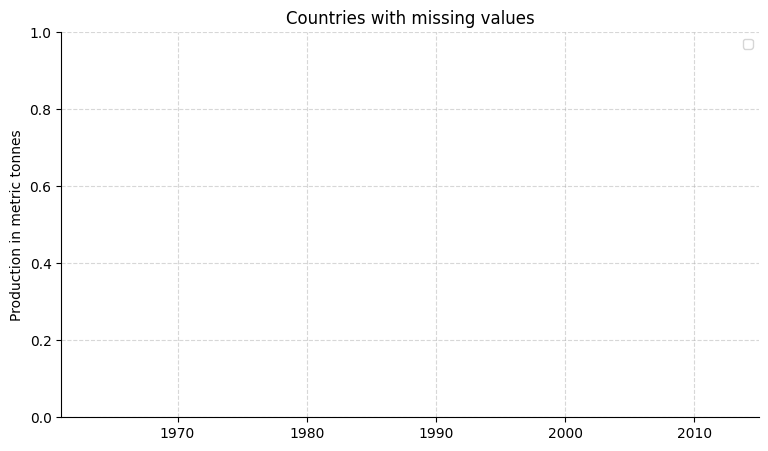

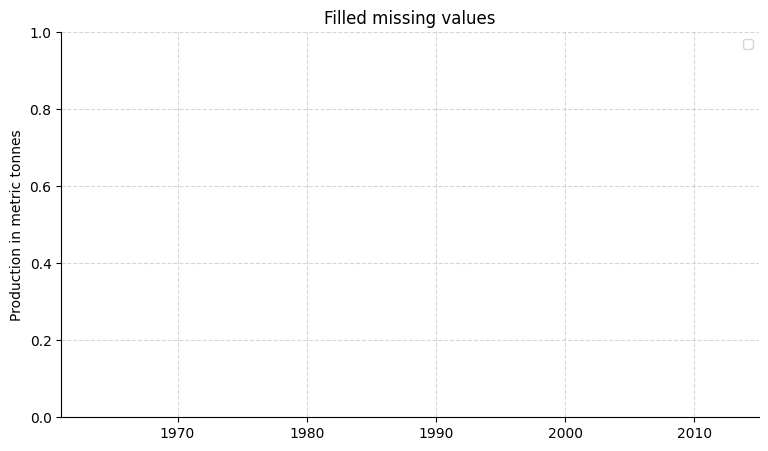

In [ ]:
plot_rows(nan_df, "Countries with missing values", legend=True)
plot_rows(nan_filled, "Filled missing values", legend=True)

In [ ]:
df = update_original_df(df, nan_filled)
df.shape

(68, 171)

##Scaling and PCA

*   The initial df has 171 rows 59 features each, which is manageable, but we perform PCA so we can visualize the clusters on a 2D plot.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

In [ ]:
df

Year                1961       1962       1963       1964       1965  \
Entity                                                                 
Albania           3200.0     2800.0     3000.0     3000.0     4000.0   
Algeria          30400.0    21500.0    16900.0    17300.0    18300.0   
Argentina       101900.0   101306.0   130571.0   168604.0   205000.0   
Australia        57215.0    62656.0    67819.0    68242.0    77944.0   
Austria           3540.0     3830.0     4000.0     4220.0     4370.0   
...                  ...        ...        ...        ...        ...   
United States  2979093.0  2995674.0  2741650.0  2585660.0  2702785.0   
Uruguay          18503.0    15813.0    18100.0    22570.0    25241.0   
Vanuatu           1400.0     1400.0     1500.0     1500.0     1800.0   
Venezuela        84920.0    94916.0    97307.0   110611.0   119408.0   
Vietnam         433800.0   501940.0   584190.0   599970.0   625260.0   

Year                1966       1967       1968       1969       1970  ...  \
Entity                                                                ...   
Albania           4000.0     5000.0     6000.0     7000.0     8000.0  ...   
Algeria          20350.0    21150.0    18250.0    23150.0    24234.0  ...   
Argentina       250800.0   240860.0   223121.0   202800.0   214500.0  ...   
Australia        89514.0    93044.0   103495.0    91758.0    97996.0  ...   
Austria           4150.0     3410.0     3260.0     2700.0     2330.0  ...   
...                  ...        ...        ...        ...        ...  ...   
United States  2495433.0  2377789.0  2470105.0  2478221.0  2836550.0  ...   
Uruguay          24800.0    23820.0    24161.0    27920.0    28377.0  ...   
Vanuatu           1800.0     1800.0     1800.0     1800.0     2100.0  ...   
Venezuela       116929.0   107526.0   126100.0   134100.0   126720.0  ...   
Vietnam         628040.0   655610.0   652270.0   703310.0   552650.0  ...   

Year            2008   2009   2010   2011   2012   2013   2014   2015   2016  \
Entity                                                                         
Albania         5.48   5.90   5.73   5.86   4.97   4.87   5.34   5.35   5.36   
Algeria         4.70   4.75   3.81   3.94   3.99   3.92   4.40   4.16   3.92   
Argentina       7.80   6.10   5.85   6.02   5.88   7.05   5.88   7.21   6.07   
Australia      26.05  25.09  26.67  25.96  25.97  26.09  26.41  24.82  25.70   
Austria        14.51  13.69  13.47  14.18  13.70  13.88  14.00  14.03  14.05   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
United States  21.58  21.41  21.77  21.38  21.33  21.51  21.82  21.92  21.91   
Uruguay         7.50   5.83   5.41   7.19   6.46   7.49   9.21   8.61   8.24   
Vanuatu        35.15  34.68  33.32  33.67  32.81  32.05  30.73  29.91  29.14   
Venezuela      13.26  14.41   9.63   9.36  10.97   9.58  11.10   8.64   9.95   
Vietnam        30.27  34.37  33.90  33.31  32.99  32.67  30.88  35.47  35.92   

Year            2017  
Entity                
Albania         5.36  
Algeria         3.86  
Argentina       7.29  
Australia      25.87  
Austria        14.09  
...              ...  
United States  22.36  
Uruguay         9.23  
Vanuatu        28.40  
Venezuela      10.10  
Vietnam        37.66  

[68 rows x 171 columns]

##🔹TSlearn K-Means (best overall)

###Preprocessing the data for tslearn

* dim-1 = countries
* dim-2 = time steps (years)
* dim-3 = features (capture, aquaculture, consumption)

* Can't do PCA because tslearn needs the whole temporal range to do proper clustering, so it wouldnt make sense as in the case of classic clustering where I reduced the ~170 features to 2.


In [ ]:
from sklearn.preprocessing import StandardScaler

entities = df.index.values
n_entities = df.shape[0]
n_years = 57
n_features = 3

data = df.values

# scaling the data (optional)
scaler = StandardScaler()
data = scaler.fit_transform(data)

# extract time series for each feature
capture_data = data[:, :n_years]
aquaculture_data = data[:, n_years:n_years*2]
consumption_data = data[:, n_years*2:n_years*3]

# 3D array to hold the data
reshaped_data = np.zeros((n_entities, n_years, n_features))

# fill the 3D array with the data for each feature
reshaped_data[:, :, 0] = capture_data
reshaped_data[:, :, 1] = aquaculture_data
reshaped_data[:, :, 2] = consumption_data

print(reshaped_data.shape)

(68, 57, 3)


###1st level

In [2]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
from tslearn.clustering import TimeSeriesKMeans

def iterative_tsKMeans(data):
  sse = {}    # a dict with the k-sse value pairs
  for k in range(1, 6):
    clustering = TimeSeriesKMeans(n_clusters=k, metric="softdtw", max_iter=10, random_state=42).fit(data)
    sse[k] = clustering.inertia_
  return clustering, sse

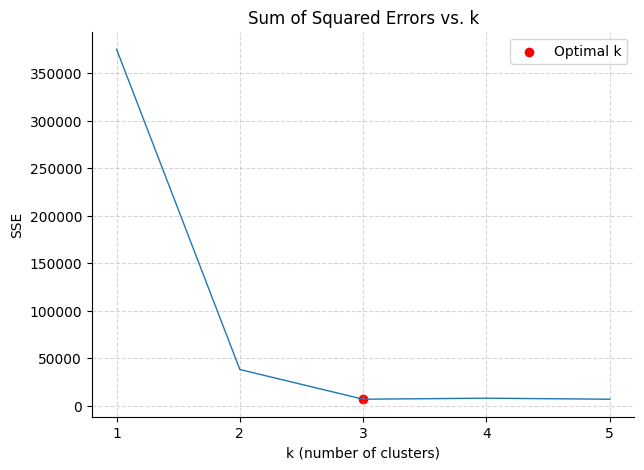

In [ ]:
clustering, sse = iterative_tsKMeans(reshaped_data)

# plot to find the optimal k
plt.figure(figsize=(7, 5))
plt.title("Sum of Squared Errors vs. k")
plt.plot(list(sse.keys()), list(sse.values()), linewidth=1)
plt.scatter(3, sse[3], color='red', label='Optimal k')

plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
k = 3

# Perform k-means clustering with DTW as the distance metric
model = TimeSeriesKMeans(n_clusters=k, metric='softdtw', max_iter=10, verbose=False, random_state=42)
labels = model.fit_predict(reshaped_data)

# Create a df to store cluster labels
df_clusters = pd.DataFrame({'Entity': entities, 'Cluster': labels})

for clusterid in set(labels):
  print (f"{list(labels).count(clusterid)} countries in cluster {clusterid}")

11 countries in cluster 0
1 countries in cluster 1
56 countries in cluster 2


In [ ]:
from tslearn.clustering import silhouette_score

score = silhouette_score(reshaped_data, labels, metric='softdtw')
round(score, 4)

0.6821

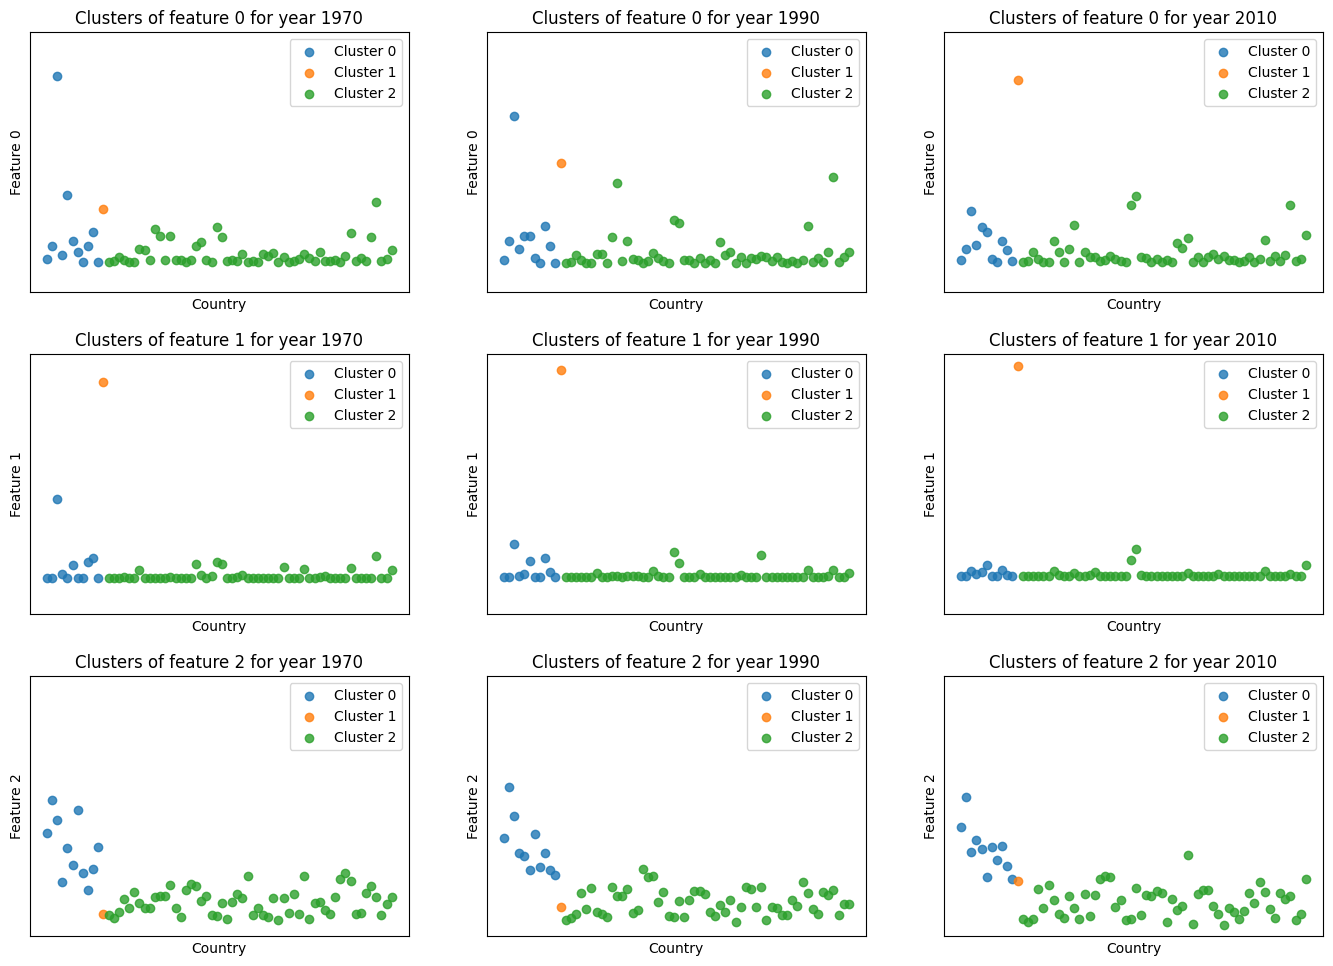

In [ ]:
feature_indices = [0, 1, 2]  # 0 for capture, 1 for aquaculture, 2 for consumption
years_indices = [9, 29, 49]  # add 1961 for true year

# subplots for each feature
fig, axs = plt.subplots(len(feature_indices), len(years_indices), figsize=(14, 10), sharex=True, sharey=True)

for i, feature_index in enumerate(feature_indices):
    for j, year_index in enumerate(years_indices):

        # extract data for the chosen feature and year
        data_to_plot = reshaped_data[:, year_index, feature_index]

        for cluster_label in np.unique(labels):
            cluster_mask = labels == cluster_label
            axs[i, j].scatter(entities[cluster_mask], data_to_plot[cluster_mask],
                              label=f'Cluster {cluster_label}', alpha=0.8)

        axs[i, j].set_xlabel('Country')
        axs[i, j].set_ylabel(f'Feature {feature_index}')
        axs[i, j].set_title(f'Clusters of feature {feature_index} for year {year_index + 1961}')
        axs[i, j].legend()

plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# create the new cluster arrays
cluster_0 = []
cluster_1 = []
cluster_2 = []

for i in range(len(entities)):
    cluster_label = labels[i]
    if cluster_label == 0:
        cluster_0.append(reshaped_data[i])
    elif cluster_label == 1:
        cluster_1.append(reshaped_data[i])
    elif cluster_label == 2:
        cluster_2.append(reshaped_data[i])

cluster_0 = np.array(cluster_0)
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)

entities_0 = entities[np.where(labels == 0)]
entities_1 = entities[np.where(labels == 1)]
entities_2 = entities[np.where(labels == 2)]

###2nd level

####Inside cluster_0

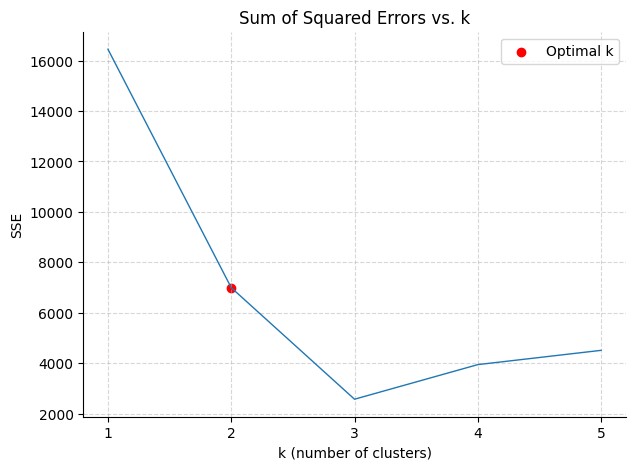

In [ ]:
clustering, sse = iterative_tsKMeans(cluster_0)

# plot to find the optimal k
plt.figure(figsize=(7, 5))
plt.title("Sum of Squared Errors vs. k")
plt.plot(list(sse.keys()), list(sse.values()), linewidth=1)
plt.scatter(2, sse[2], color='red', label='Optimal k')

plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
k = 2

# Perform k-means clustering with DTW as the distance metric
model = TimeSeriesKMeans(n_clusters=k, metric='softdtw', max_iter=10, verbose=False, random_state=42)
labels = model.fit_predict(cluster_0)

for clusterid in set(labels):
  print (f"{list(labels).count(clusterid)} countries in cluster {clusterid}")

10 countries in cluster 0
1 countries in cluster 1


In [ ]:
score = silhouette_score(cluster_0, labels, metric='softdtw')
round(score, 4)

0.7849

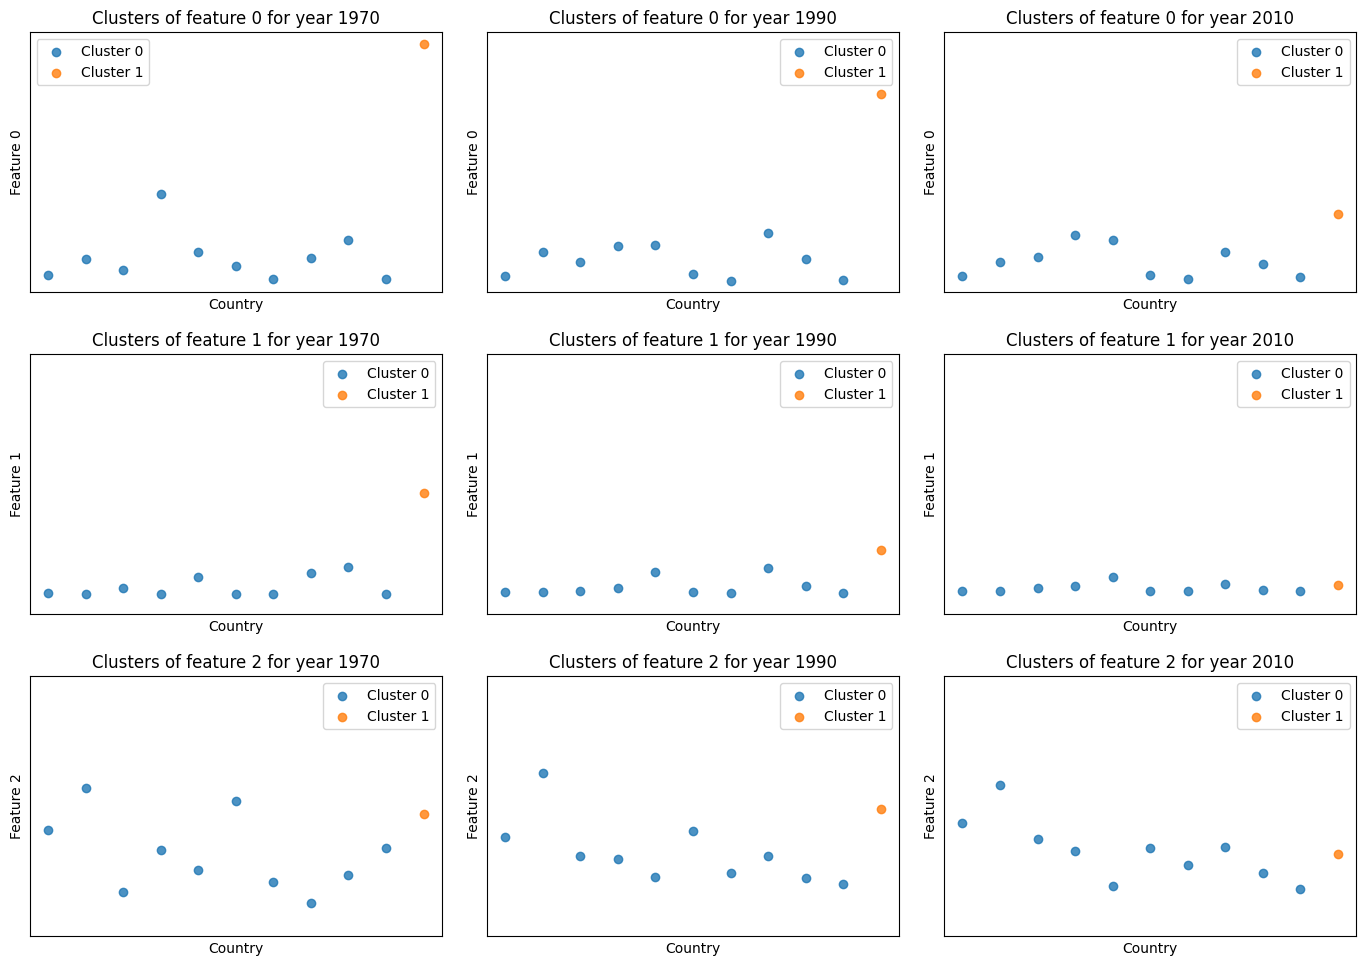

In [ ]:
feature_indices = [0, 1, 2]  # 0 for capture, 1 for aquaculture, 2 for consumption
years_indices = [9, 29, 49]  # add 1961 for true year

# subplots for each feature
fig, axs = plt.subplots(len(feature_indices), len(years_indices), figsize=(14, 10), sharex=True, sharey=True)

for i, feature_index in enumerate(feature_indices):
    for j, year_index in enumerate(years_indices):

        # extract data for the chosen feature and year
        data_to_plot = cluster_0[:, year_index, feature_index]

        for cluster_label in np.unique(labels):
            cluster_mask = labels == cluster_label
            axs[i, j].scatter(entities_0[cluster_mask], data_to_plot[cluster_mask],
                              label=f'Cluster {cluster_label}', alpha=0.8)

        axs[i, j].set_xlabel('Country')
        axs[i, j].set_ylabel(f'Feature {feature_index}')
        axs[i, j].set_title(f'Clusters of feature {feature_index} for year {year_index + 1961}')
        axs[i, j].legend()

plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
cluster_00 = []

for i in range(len(entities_0)):
    cluster_label = labels[i]
    if cluster_label == 0:
        cluster_00.append(reshaped_data[i])


cluster_00 = np.array(cluster_00)
entities_00 = entities[np.where(labels == 0)]

####Inside cluster_2

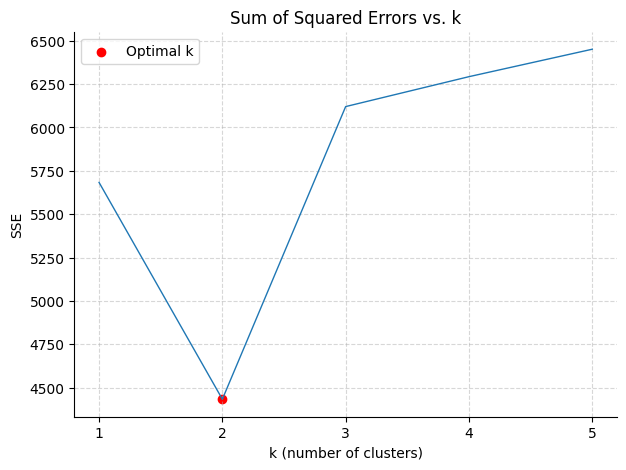

In [ ]:
clustering, sse = iterative_tsKMeans(cluster_2)

# plot to find the optimal k
plt.figure(figsize=(7, 5))
plt.title("Sum of Squared Errors vs. k")
plt.plot(list(sse.keys()), list(sse.values()), linewidth=1)
plt.scatter(2, sse[2], color='red', label='Optimal k')

plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
k = 2

# Perform k-means clustering with DTW as the distance metric
model = TimeSeriesKMeans(n_clusters=k, metric='softdtw', max_iter=10, verbose=False, random_state=42)
labels = model.fit_predict(cluster_2)

for clusterid in set(labels):
  print (f"{list(labels).count(clusterid)} countries in cluster {clusterid}")

51 countries in cluster 0
5 countries in cluster 1


In [ ]:
score = silhouette_score(cluster_2, labels, metric='softdtw')
round(score, 4)

0.7406

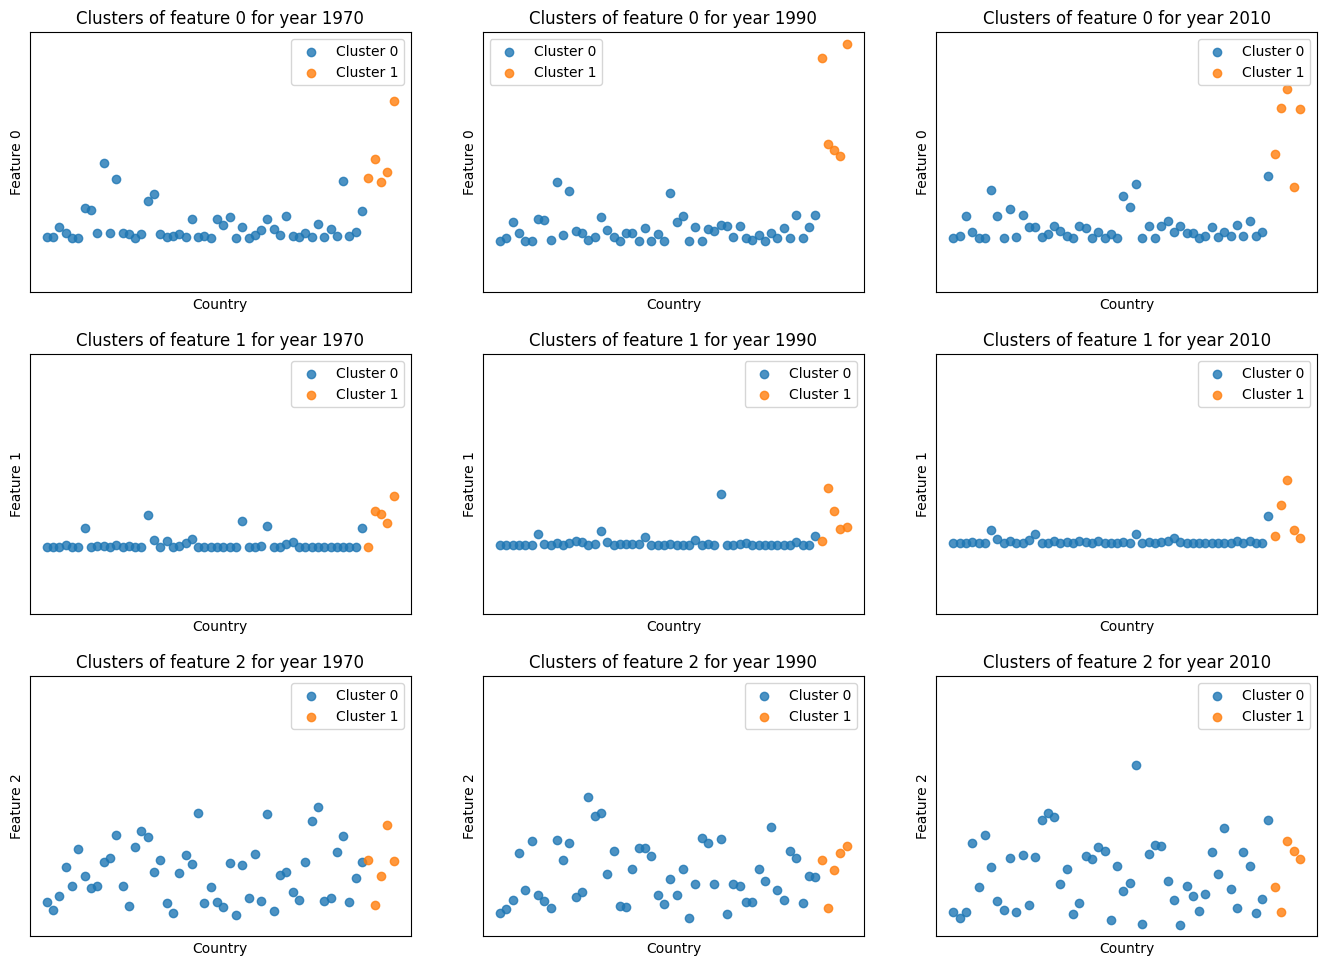

In [ ]:
feature_indices = [0, 1, 2]  # 0 for capture, 1 for aquaculture, 2 for consumption
years_indices = [9, 29, 49]  # add 1961 for true year

# subplots for each feature
fig, axs = plt.subplots(len(feature_indices), len(years_indices), figsize=(14, 10), sharex=True, sharey=True)

for i, feature_index in enumerate(feature_indices):
    for j, year_index in enumerate(years_indices):

        # extract data for the chosen feature and year
        data_to_plot = cluster_2[:, year_index, feature_index]

        for cluster_label in np.unique(labels):
            cluster_mask = labels == cluster_label
            axs[i, j].scatter(entities_2[cluster_mask], data_to_plot[cluster_mask],
                              label=f'Cluster {cluster_label}', alpha=0.8)

        axs[i, j].set_xlabel('Country')
        axs[i, j].set_ylabel(f'Feature {feature_index}')
        axs[i, j].set_title(f'Clusters of feature {feature_index} for year {year_index + 1961}')
        axs[i, j].legend()

plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# create the new cluster arrays
cluster_20 = []
cluster_21 = []

for i in range(len(entities_2)):
    cluster_label = labels[i]
    if cluster_label == 0:
        cluster_20.append(reshaped_data[i])
    elif cluster_label == 1:
        cluster_21.append(reshaped_data[i])

cluster_20 = np.array(cluster_20)
cluster_21 = np.array(cluster_21)

entities_20 = entities_2[np.where(labels == 0)]
entities_21 = entities_2[np.where(labels == 1)]

###3rd level

####Inside cluster_20

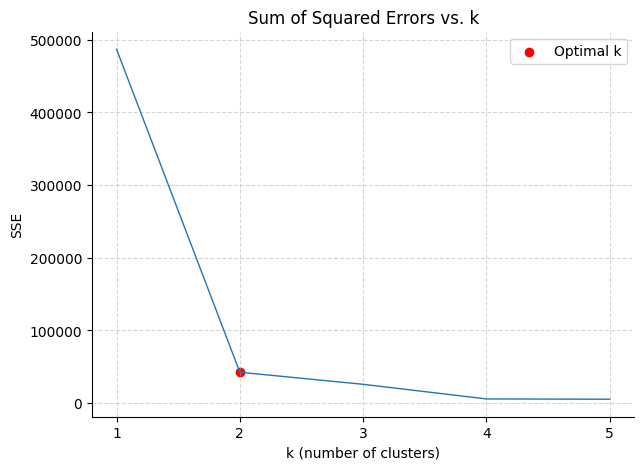

In [ ]:
clustering, sse = iterative_tsKMeans(cluster_20)

# plot to find the optimal k
plt.figure(figsize=(7, 5))
plt.title("Sum of Squared Errors vs. k")
plt.plot(list(sse.keys()), list(sse.values()), linewidth=1)
plt.scatter(2, sse[2], color='red', label='Optimal k')

plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
k = 2

# Perform k-means clustering with DTW as the distance metric
model = TimeSeriesKMeans(n_clusters=k, metric='softdtw', max_iter=10, verbose=False, random_state=42)
labels = model.fit_predict(cluster_20)

for clusterid in set(labels):
  print (f"{list(labels).count(clusterid)} countries in cluster {clusterid}")

50 countries in cluster 0
1 countries in cluster 1


In [ ]:
score = silhouette_score(cluster_20, labels, metric='softdtw')
round(score, 4)

0.9282

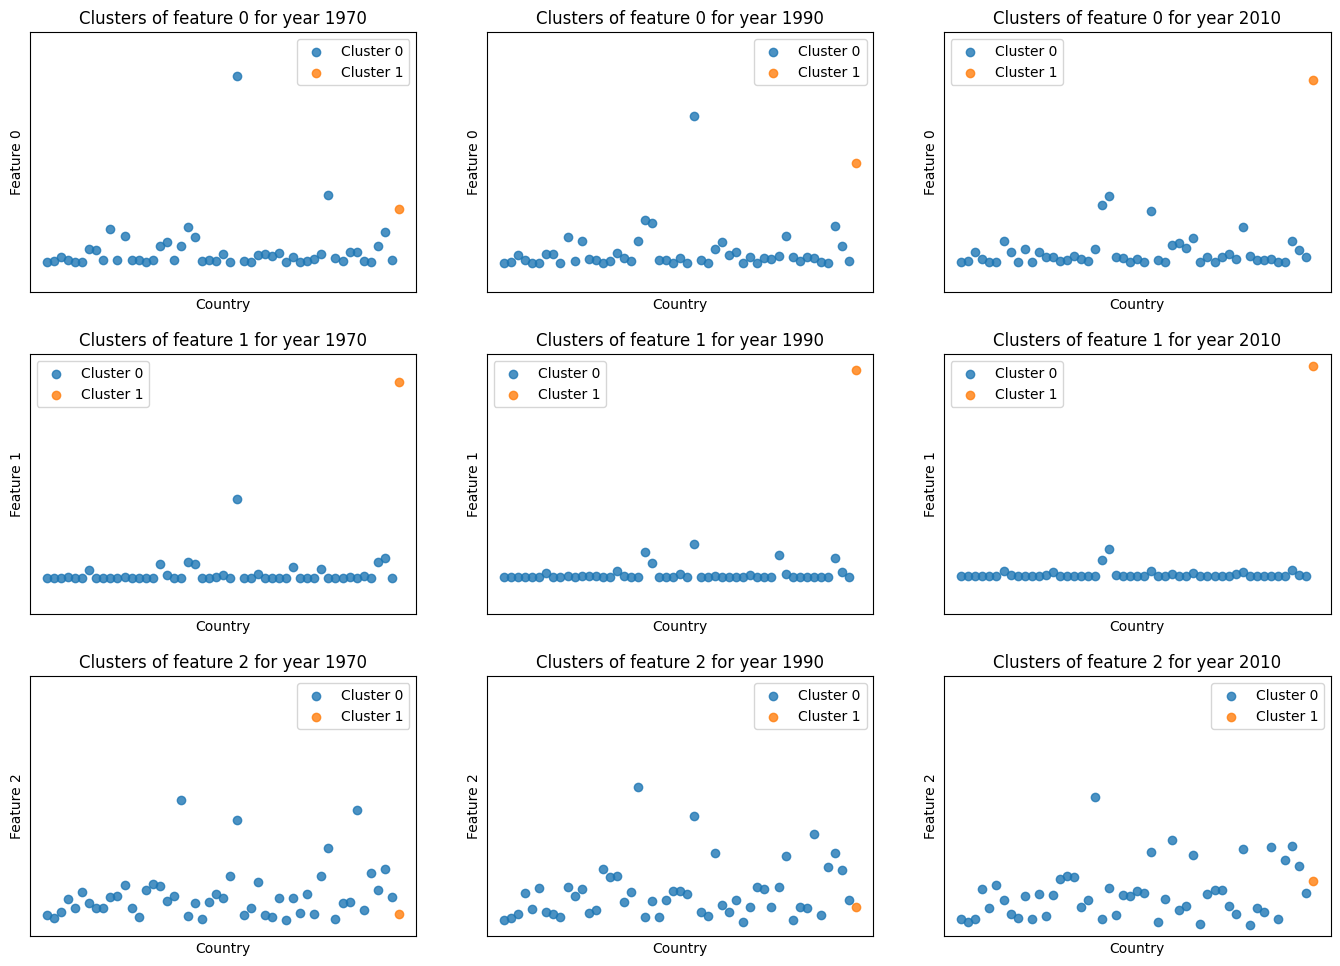

In [ ]:
feature_indices = [0, 1, 2]  # 0 for capture, 1 for aquaculture, 2 for consumption
years_indices = [9, 29, 49]  # add 1961 for true year

# subplots for each feature
fig, axs = plt.subplots(len(feature_indices), len(years_indices), figsize=(14, 10), sharex=True, sharey=True)

for i, feature_index in enumerate(feature_indices):
    for j, year_index in enumerate(years_indices):

        # extract data for the chosen feature and year
        data_to_plot = cluster_20[:, year_index, feature_index]

        for cluster_label in np.unique(labels):
            cluster_mask = labels == cluster_label
            axs[i, j].scatter(entities_20[cluster_mask], data_to_plot[cluster_mask],
                              label=f'Cluster {cluster_label}', alpha=0.8)

        axs[i, j].set_xlabel('Country')
        axs[i, j].set_ylabel(f'Feature {feature_index}')
        axs[i, j].set_title(f'Clusters of feature {feature_index} for year {year_index + 1961}')
        axs[i, j].legend()

plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# create the new cluster arrays
cluster_200 = []

for i in range(len(entities_20)):
    cluster_label = labels[i]
    if cluster_label == 0:
        cluster_200.append(reshaped_data[i])


cluster_200 = np.array(cluster_200)

entities_200 = entities_20[np.where(labels == 0)]

###Removing outliers

In [ ]:
from tslearn.metrics import soft_dtw
from tslearn.metrics import cdist_dtw
from sklearn.metrics import euclidean_distances
from tslearn.clustering import TimeSeriesKMeans

def compute_centroid(cluster_data):
    return np.mean(cluster_data, axis=0)


def compute_medoid(cluster_data, entities):
    '''Returns the most representative ts of the given cluster'''
    num_samples = cluster_data.shape[0]
    distances = np.zeros((num_samples, num_samples))

    # compute pairwise DTW distances
    for i in range(num_samples):
        for j in range(num_samples):
            distances[i, j] = soft_dtw(cluster_data[i], cluster_data[j])

    total_distances = np.sum(distances, axis=1)    # compute the total distance of each time series to all others
    medoid_index = np.argmin(total_distances)    # medoid: the time series with the smallest total distance
    return cluster_data[medoid_index], entities[medoid_index]

In [ ]:
def remove_outliers_euclidean(cluster_data, entities, threshold=2):
    centroid = compute_centroid(cluster_data)
    distances = euclidean_distances(cluster_data.reshape(len(cluster_data), -1), centroid.reshape(1, -1)).ravel()

    median_distance = np.median(distances)
    outlier_mask = distances > (median_distance * threshold)

    return cluster_data[~outlier_mask], entities[~outlier_mask]

In [ ]:
# final clusters
cluster_A, entities_A = remove_outliers_euclidean(cluster_200, entities_200, 1.25)
cluster_B, entities_B = remove_outliers_euclidean(cluster_21, entities_21, 1.5)
cluster_C, entities_C = remove_outliers_euclidean(cluster_00, entities_00, 1.5)

In [ ]:
print(cluster_A.shape)
print(cluster_B.shape)
print(cluster_C.shape)

(31, 57, 3)
(4, 57, 3)
(9, 57, 3)


###Finding the medoids

In [ ]:
# find medoid of each cluster
medoid_A, country_A = compute_medoid(cluster_A, entities_A)
medoid_B, country_B = compute_medoid(cluster_B, entities_B)
medoid_C, country_C = compute_medoid(cluster_B, entities_C)
print([country_A, country_B, country_C])

['Mexico', 'United States', 'Austria']


In [ ]:
def plot_cluster_time_series(cluster_data, entities, feature, years, title):
    plt.figure(figsize=(12, 4))

    for i, country_ts in enumerate(cluster_data):
        country = entities[i]
        plt.plot(years, country_ts[:, feature], linewidth=1, label=country)

    plt.title(title)
    plt.ylabel('feature values')
    plt.yticks([])
    # plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

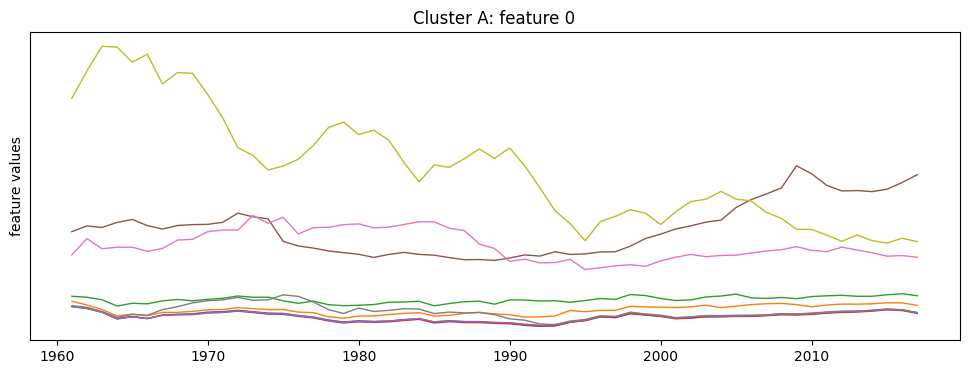

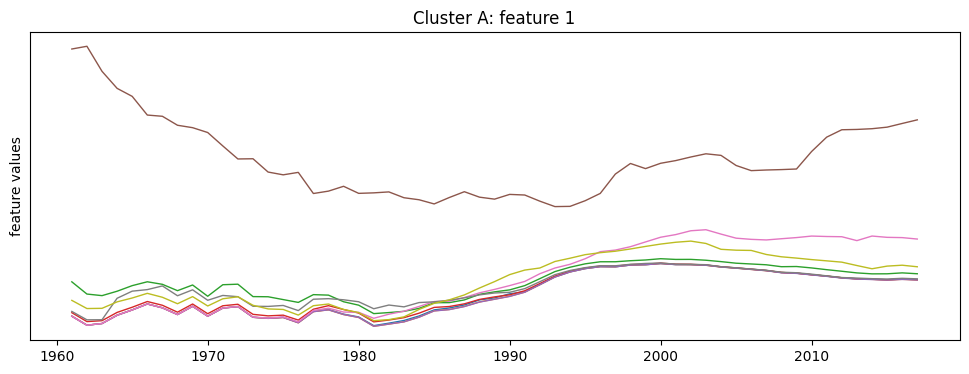

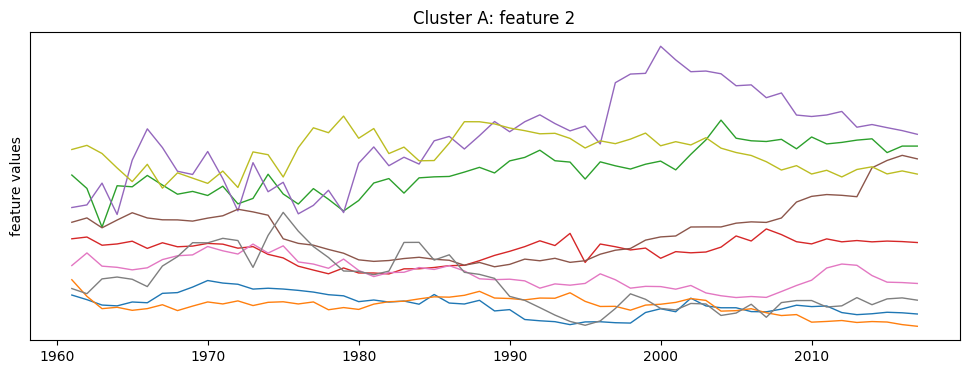

In [ ]:
# plot time series of each cluster
years = list(range(1961, 2018))
for feature in range(3):
  plot_cluster_time_series(cluster_C, entities_C, feature, years, f'Cluster A: feature {feature}')

##🔹TS modeling on clusters
---
* For each cluster we want to produce a single TS model for forecasting the values of the 3 features.
* Each df should have the years for rows and the 3 features of each country for columns (*3 x countries* columns).
* We want to test different train-test splits and find the best for each model.

In [ ]:
# for cluster_A
years = range(1961, 2018)

country_features = {}   # save the features of each country in a dict
for country in entities_A:
  country_features[country] = df_ts[df_ts['Entity'] == country].set_index('Year').loc[years]

ts_A = pd.DataFrame(index=years)
for country, country_df in country_features.items():
  stacked_features = np.hstack([
        country_df['Capture production'].values.reshape(-1, 1),
        country_df['Aquaculture production'].values.reshape(-1, 1),
        country_df['Consumption(kg/capita/yr)'].values.reshape(-1, 1)
        ])

  df_country = pd.DataFrame(stacked_features, index=years, columns=[f'{country}_Capture',
                                                                     f'{country}_Aquaculture',
                                                                     f'{country}_Consumption'])
  ts_A = pd.concat([ts_A, df_country], axis=1)
  del df_country

In [ ]:
# for cluster_B
country_features = {}   # save the features of each country in a dict
for country in entities_B:
  country_features[country] = df_ts[df_ts['Entity'] == country].set_index('Year').loc[years]

ts_B = pd.DataFrame(index=years)
for country, country_df in country_features.items():
  stacked_features = np.hstack([
        country_df['Capture production'].values.reshape(-1, 1),
        country_df['Aquaculture production'].values.reshape(-1, 1),
        country_df['Consumption(kg/capita/yr)'].values.reshape(-1, 1)
        ])

  df_country = pd.DataFrame(stacked_features, index=years, columns=[f'{country}_Capture',
                                                                     f'{country}_Aquaculture',
                                                                     f'{country}_Consumption'])
  ts_B = pd.concat([ts_B, df_country], axis=1)
  del df_country

In [ ]:
# for cluster_C
country_features = {}   # save the features of each country in a dict
for country in entities_C:
  country_features[country] = df_ts[df_ts['Entity'] == country].set_index('Year').loc[years]

ts_C = pd.DataFrame(index=years)
for country, country_df in country_features.items():
  stacked_features = np.hstack([
        country_df['Capture production'].values.reshape(-1, 1),
        country_df['Aquaculture production'].values.reshape(-1, 1),
        country_df['Consumption(kg/capita/yr)'].values.reshape(-1, 1)
        ])

  df_country = pd.DataFrame(stacked_features, index=years, columns=[f'{country}_Capture',
                                                                     f'{country}_Aquaculture',
                                                                     f'{country}_Consumption'])
  ts_C = pd.concat([ts_C, df_country], axis=1)
  del df_country

In [ ]:
print(ts_A.shape)   # each triplet of columns (country) corresponds to a different realization of the process
print(ts_B.shape)
print(ts_C.shape)

(57, 93)
(57, 12)
(57, 27)


We try to do transformations in the time series that are not stationary, although this can mess the consistency within the cluster.

* Logging

In [ ]:
from statsmodels.tsa.stattools import adfuller

ts_log = ts_C.copy()    # here put the ts cluster of preference

num_countries = int(ts_log.shape[1] / 3)

# Loop over each country and each variable
for i in range(num_countries):
    # Identify column indices for current country
    start_idx = i * 3
    end_idx = start_idx + 3

    country_columns = ts_log.iloc[:, start_idx:end_idx]

    for col in country_columns:
        ts = ts_log[col].dropna()

        # Check if log transformation is possible (i.e., no non-positive values among non-zero values)
        non_zero_ts = ts[ts > 0]
        if non_zero_ts.empty:
            print(f"No log transformation applied for {col} due to absence of positive values.")
        else:
            # Apply log transformation only to non-zero values
            ts_log[col] = ts_log[col].apply(lambda x: np.log(x) if x > 0 else x)
            # print(f"Log-transformed non-zero values in {col}.")

* 1st diff

In [ ]:
ts_diff = ts_log.copy()
num_countries = int(ts_diff.shape[1] / 3)

# Loop over each country and each variable to perform differencing
for i in range(num_countries):
    # Identify column indices for current country
    start_idx = i * 3
    end_idx = start_idx + 3

    country_columns = ts_diff.iloc[:, start_idx:end_idx]

    for col in country_columns.columns:
        # Check stationarity with ADF test
        adf_test_result = adfuller(country_columns[col].dropna())
        p_value = adf_test_result[1]

        if p_value > 0.05:
            # Perform first-order differencing until stationary
            ts_diff[col + '_diff'] = ts_diff[col].diff()
        else:
            ts_diff[col + '_diff'] = ts_diff[col]  # No differencing needed

        # Replace original variable with differenced variable
        ts_diff[col] = ts_diff[col + '_diff']

# Now ts_diff contains differenced variables (if needed) for each country and variable

# Drop the differenced columns (optional)
ts_diff.drop(columns=[col for col in ts_diff.columns if col.endswith('_diff')], inplace=True)
ts_diff = ts_diff.iloc[1:]
ts_diff.shape

(56, 27)

* 2nd diff

In [ ]:
ts_diff2 = ts_diff.copy()
num_countries = int(ts_diff2.shape[1] / 3)

# Loop over each country and each variable to perform differencing
for i in range(num_countries):
    # Identify column indices for current country
    start_idx = i * 3
    end_idx = start_idx + 3

    country_columns = ts_diff2.iloc[:, start_idx:end_idx]

    for col in country_columns.columns:
        # Check stationarity with ADF test
        adf_test_result = adfuller(country_columns[col].dropna())
        p_value = adf_test_result[1]

        if p_value > 0.05:
            # Perform first-order differencing until stationary
            ts_diff2[col + '_diff'] = ts_diff2[col].diff()
        else:
            ts_diff2[col + '_diff'] = ts_diff2[col]  # No differencing needed

        # Replace original variable with differenced variable
        ts_diff2[col] = ts_diff2[col + '_diff']

# Now ts_diff2 contains differenced variables (if needed) for each country and variable

# Drop the differenced columns (optional)
ts_diff2.drop(columns=[col for col in ts_diff2.columns if col.endswith('_diff')], inplace=True)
ts_diff2 = ts_diff2.iloc[1:]
ts_diff2.shape

(55, 27)

In [ ]:
# Stationarity test of each ts (column)
def check_stationarity(ts):
    adf_test_result = adfuller(ts.dropna())
    p_value = adf_test_result[1]
    return p_value

series = [ts_A, ts_B, ts_C]
for ts_to_check in series:
    count1 = 0
    count2 = 0
    for col in ts_to_check.columns:
        p_value = check_stationarity(ts_to_check[col])
        if p_value <= 0.05:
            # print(f"{col} is stationary with p-value = {p_value:.5f}")
            count1 += 1
        else:
            # print(f"{col} is not stationary with p-value = {p_value:.5f}")
            count2 += 1

    print(f'{count1} stationary, {count2} non-stationary')

6 stationary, 87 non-stationary
1 stationary, 11 non-stationary
1 stationary, 26 non-stationary


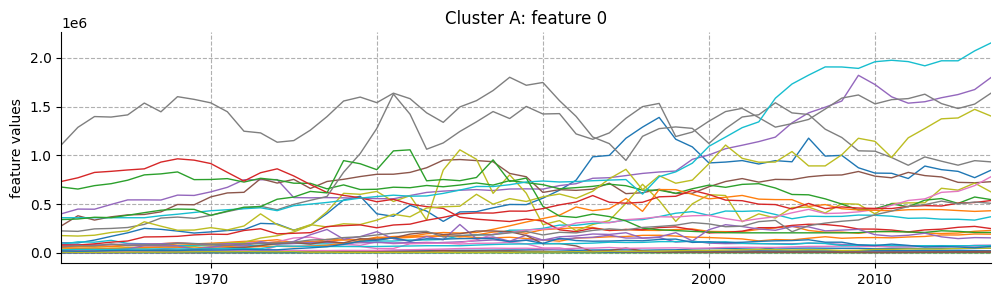

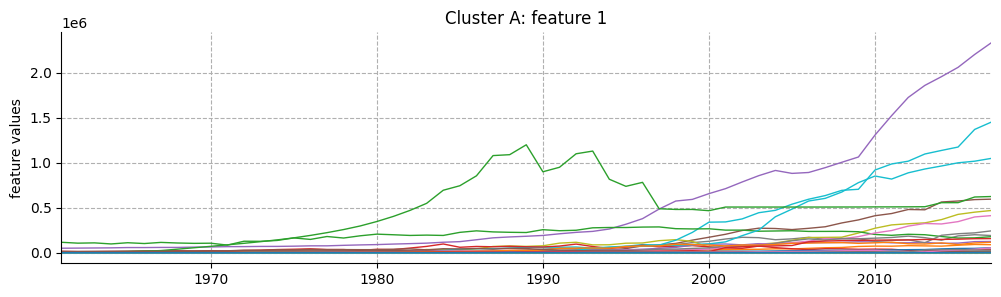

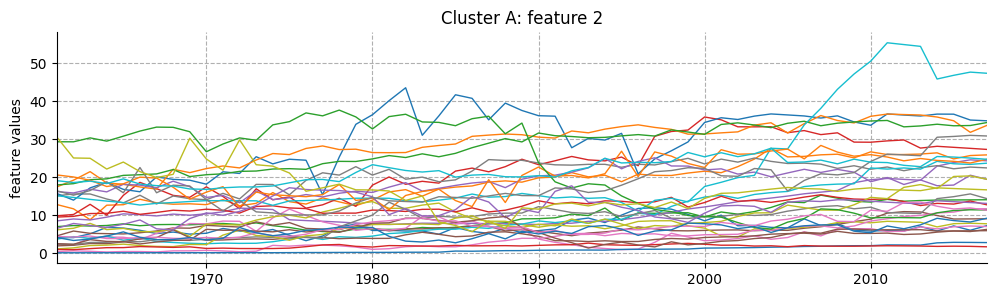

In [ ]:
# plot time series of each cluster
cluster_to_plot = ts_A

for i in range(3):
  plt.figure(figsize=(12, 3))
  plt.title(f'Cluster A: feature {i}')
  columns_to_plot = cluster_to_plot.columns[i::3]

  for col in columns_to_plot:
    plt.plot(cluster_to_plot[col], linewidth=1)

  plt.ylabel('feature values')
  plt.xlim((1961, 2017))
  # plt.yticks([])
  plt.grid(True, linestyle='--')
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.show()

In [ ]:
# from statsmodels.tsa.vector_ar.var_model import VAR

# train_size = int(len(ts_C_diff2) * 0.8)  # 80% training, 20% testing
# train, test = ts_C_diff2.iloc[:train_size], ts_C_diff2.iloc[train_size:]

# model = VAR(train)
# optimal_lag_order = model.select_order().bic
# model_fit = model.fit(ic='bic')

In [ ]:
# # Make predictions on the test set
# lag_order = model_fit.k_ar
# forecast_input = train.values[-lag_order:]

# # Perform the forecast
# forecast = model_fit.forecast(y=forecast_input, steps=len(test))

# # Convert forecast to DataFrame
# forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# # Plot the results
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(test.columns):
#     plt.subplot(3, 3, i+1)
#     plt.plot(train[col], label='Train')
#     plt.plot(test[col], label='Test')
#     plt.plot(forecast_df[col], label='Forecast')
#     plt.title(col)
#     plt.legend()
# plt.tight_layout()
# plt.show()

###Modeling on the 3 medoids

* Since modeling on the whole clusters was infeasible, we focus on the medoids. First we preprocess them for multivariate TS modeling.

* Will try VECM on all 3 medoids

In [ ]:
years = range(1961, 2018)

medoid_A_ts = df_ts.loc[df_ts['Entity'] == 'Mexico', \
      ['Year', 'Capture production', 'Aquaculture production',\
       'Consumption(kg/capita/yr)']].set_index('Year').loc[years].copy()

medoid_B_ts = df_ts.loc[df_ts['Entity'] == 'United States', \
      ['Year', 'Capture production', 'Aquaculture production',\
       'Consumption(kg/capita/yr)']].set_index('Year').loc[years].copy()

medoid_C_ts = df_ts.loc[df_ts['Entity'] == 'Austria', \
      ['Year', 'Capture production', 'Aquaculture production',\
       'Consumption(kg/capita/yr)']].set_index('Year').loc[years].copy()

In [ ]:
medoid_A_ts.index = pd.to_datetime(medoid_A_ts.index, format='%Y')   # cast index to datetime
medoid_A_ts.index.freq = 'AS-JAN'  # set frequency to annual

medoid_B_ts.index = pd.to_datetime(medoid_B_ts.index, format='%Y')
medoid_B_ts.index.freq = 'AS-JAN'

medoid_C_ts.index = pd.to_datetime(medoid_C_ts.index, format='%Y')
medoid_C_ts.index.freq = 'AS-JAN'

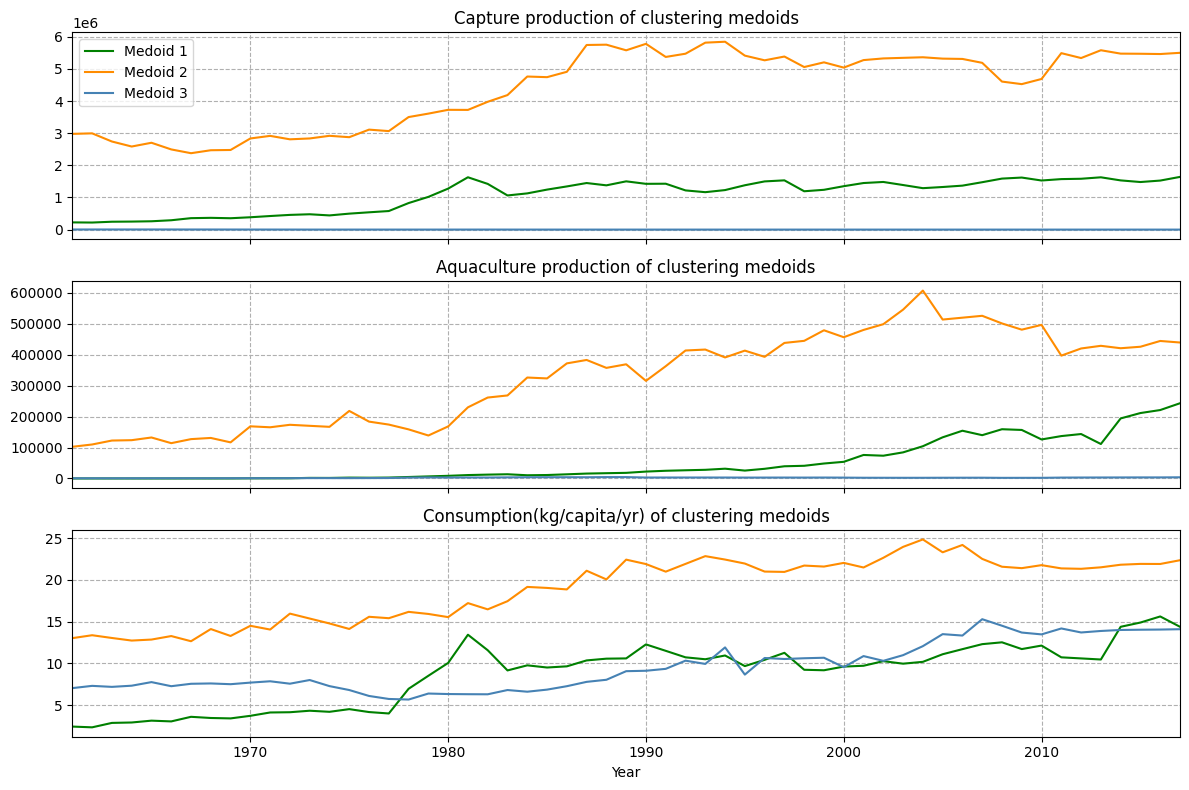

In [ ]:
# plot each medoid's feature
medoids = [medoid_A_ts, medoid_B_ts, medoid_C_ts]
colors = ['green', 'darkorange', 'steelblue']
features = ['Capture production', 'Aquaculture production', 'Consumption(kg/capita/yr)']

fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
for i, feature in enumerate(features):
    for j, medoid in enumerate(medoids):
        axs[i].plot(medoid.index.year, medoid[feature], color=colors[j], label=f'Medoid {j+1}')

    axs[i].set_title(f'{feature} of clustering medoids')
    # axs[i].set_ylabel(feature)
    axs[i].grid(True, linestyle='--')

axs[0].legend(loc='upper left')
plt.xlim((1961, 2017))
plt.xlabel('Year')
plt.tight_layout()
plt.show()

####Medoid_A model

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, coint_johansen

# Determine the optimal lag order for VECM
lag_order_selection = select_order(medoid_A_ts, maxlags=10, deterministic="ci")
print(lag_order_selection.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        43.00      43.60*   4.751e+18       43.23
1        43.10       44.06   5.291e+18       43.46
2        43.03       44.35   5.033e+18       43.53
3        42.65       44.32   3.550e+18       43.28
4        42.49       44.52  3.180e+18*       43.25
5        42.63       45.01   3.924e+18       43.52
6        42.84       45.58   5.399e+18       43.86
7        42.62       45.73   5.101e+18       43.79
8        42.37       45.83   4.913e+18       43.66
9        41.97       45.78   4.484e+18       43.40
10      41.44*       45.62   4.134e+18      43.00*
--------------------------------------------------


We choose order 4 (balance between fit and complexity).

In [ ]:
# Johansen test for cointegration
coint_test = coint_johansen(medoid_A_ts, det_order=0, k_ar_diff=4)

print('Trace Statistic:')
print(coint_test.lr1)  # Trace statistic

print('\nCritical Values (90%, 95%, 99%):')
print(coint_test.cvt)  # Critical values

print('\nEigenvalues:')
print(coint_test.eig)  # Eigenvalues

Trace Statistic:
[2.90501125e+01 4.01391878e+00 5.38057976e-03]

Critical Values (90%, 95%, 99%):
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Eigenvalues:
[3.82122625e-01 7.41909481e-02 1.03467334e-04]


Conclusion: strong evidence that r=1

NMSE:
 Capture production           1.191518e+00
Aquaculture production       1.861154e+00
Consumption(kg/capita/yr)    9.140235e+08
dtype: float64
R-squared: -1.3586
MAPE: 0.1802


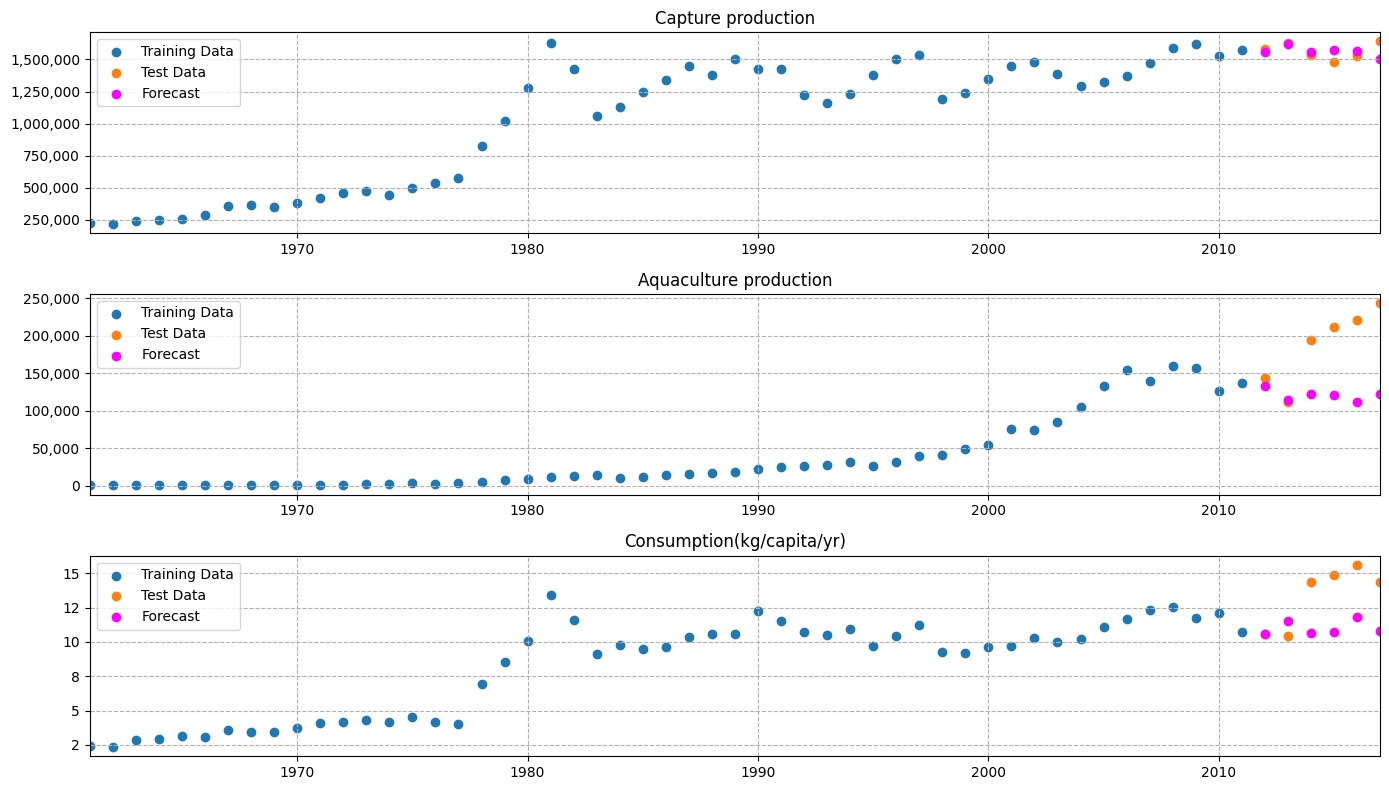

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Split the data into training and testing sets
train_size = int(len(medoid_A_ts) * 0.9)    # 90-10 split
train, test = medoid_A_ts[:train_size], medoid_A_ts[train_size:]

# Fit the VECM model on the training set
chosen_lag_order = 4
coint_rank = 1
model = VECM(train, k_ar_diff=chosen_lag_order, coint_rank=coint_rank)
results = model.fit()

# Forecasting for the length of the test set
forecast_steps = len(test)
forecast = results.predict(steps=forecast_steps)

# Convert forecast to DataFrame for easier comparison
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps+1, freq='AS-JAN')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=test.columns)

# Calculate error metrics
mse = mean_squared_error(test, forecast_df)
nmse = mse / np.var(test)
r2 = r2_score(test, forecast_df)
mape = mean_absolute_percentage_error(test, forecast_df)

# print("MSE:", mse)
print("NMSE:\n", nmse)
print(f"R-squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


# Plot the original and forecasted values
def format_yticks(x, pos):
    return f'{x:,.0f}'

plt.figure(figsize=(14, 8))

# Plot for each variable
for i, col in enumerate(medoid_A_ts.columns):
    plt.subplot(len(medoid_A_ts.columns), 1, i+1)
    plt.scatter(train.index.year, train[col], label='Training Data')
    plt.scatter(test.index.year, test[col], label='Test Data')
    plt.scatter(forecast_df.index.year, forecast_df[col], label='Forecast', color='magenta')

    plt.title(col)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
    plt.grid(True, linestyle='--')
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    plt.xlim((medoid_A_ts.index.year[0], forecast_df.index.year[-1]))

plt.tight_layout()
plt.show()

####Medoid_B model

In [ ]:
# Determine the optimal lag order for VECM
lag_order_selection = select_order(medoid_B_ts, maxlags=10, deterministic="ci")
print(lag_order_selection.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        45.32      45.92*  4.831e+19*      45.54*
1        45.46       46.42   5.612e+19       45.82
2        45.78       47.09   7.862e+19       46.27
3        46.00       47.67   1.009e+20       46.63
4        46.08       48.10   1.145e+20       46.84
5        46.21       48.60   1.414e+20       47.11
6        46.14       48.88   1.466e+20       47.17
7        46.16       49.26   1.747e+20       47.32
8        46.20       49.66   2.265e+20       47.49
9        45.75       49.57   1.972e+20       47.18
10      45.12*       49.29   1.637e+20       46.68
--------------------------------------------------


We choose order 0.

In [ ]:
# Johansen test for cointegration
coint_test = coint_johansen(medoid_B_ts, det_order=0, k_ar_diff=0)

print('Trace Statistic:')
print(coint_test.lr1)  # Trace statistic

print('\nCritical Values (90%, 95%, 99%):')
print(coint_test.cvt)  # Critical values

print('\nEigenvalues:')
print(coint_test.eig)  # Eigenvalues

Trace Statistic:
[3.66725476e+01 6.78768498e+00 4.74450219e-04]

Critical Values (90%, 95%, 99%):
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Eigenvalues:
[4.13544367e-01 1.14143396e-01 8.47228944e-06]


r = 1

NMSE:
 Capture production           5.486055e+00
Aquaculture production       3.400144e+02
Consumption(kg/capita/yr)    2.613611e+11
dtype: float64
R-squared: -5.6407
MAPE: 0.0270


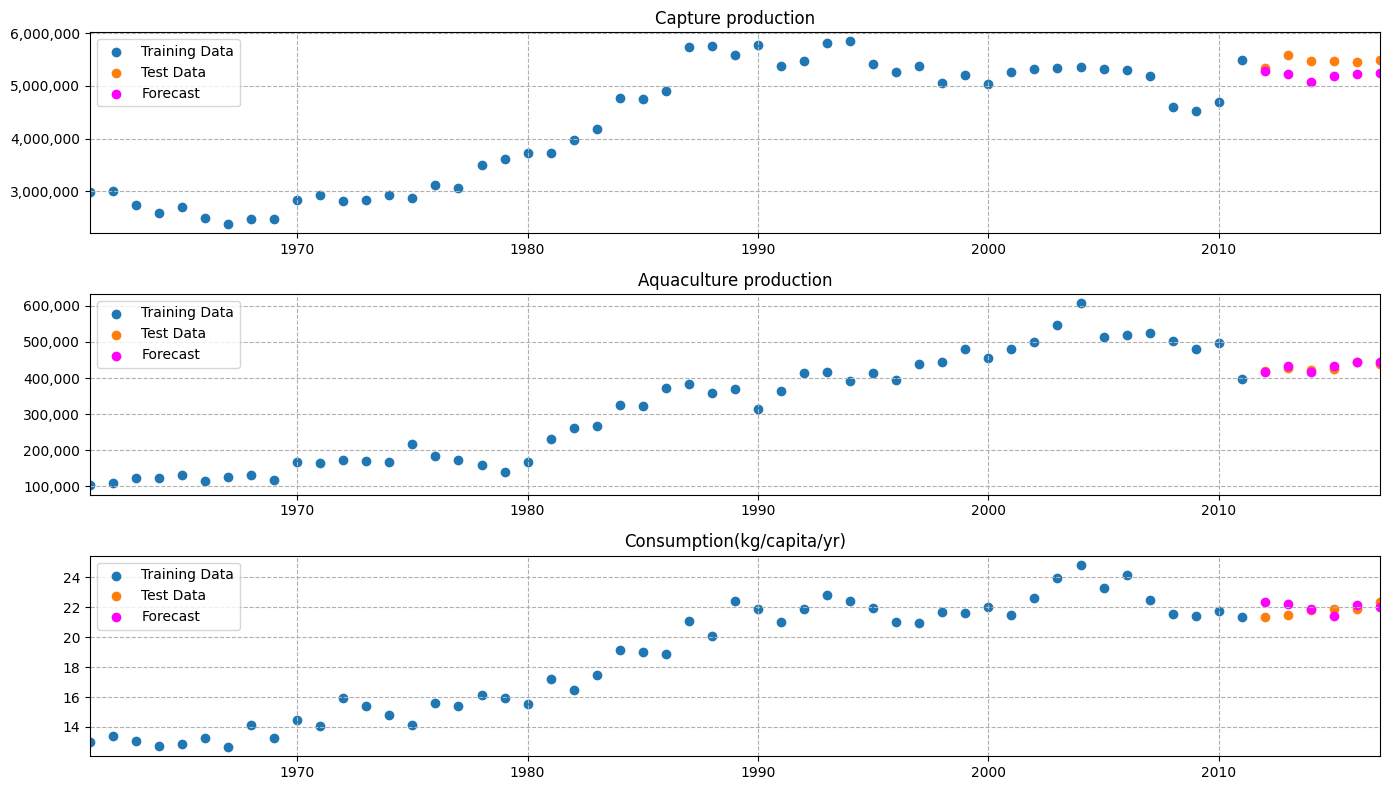

In [ ]:
# Split the data into training and testing sets
train_size = int(len(medoid_B_ts) * 0.9)    # 90-10 split
train, test = medoid_B_ts[:train_size], medoid_B_ts[train_size:]

# Fit the VECM model on the training set
chosen_lag_order = 4
coint_rank = 1
model = VECM(train, k_ar_diff=chosen_lag_order, coint_rank=coint_rank)
results = model.fit()

# Forecasting for the length of the test set
forecast_steps = len(test)
forecast = results.predict(steps=forecast_steps)

# Convert forecast to DataFrame for easier comparison
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps+1, freq='AS-JAN')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=test.columns)

# Calculate error metrics
mse = mean_squared_error(test, forecast_df)
nmse = mse / np.var(test)
r2 = r2_score(test, forecast_df)
mape = mean_absolute_percentage_error(test, forecast_df)

# print("MSE:", mse)
print("NMSE:\n", nmse)
print(f"R-squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


# Plot the original and forecasted values
def format_yticks(x, pos):
    return f'{x:,.0f}'

plt.figure(figsize=(14, 8))

# Plot for each variable
for i, col in enumerate(medoid_B_ts.columns):
    plt.subplot(len(medoid_B_ts.columns), 1, i+1)
    plt.scatter(train.index.year, train[col], label='Training Data')
    plt.scatter(test.index.year, test[col], label='Test Data')
    plt.scatter(forecast_df.index.year, forecast_df[col], label='Forecast', color='magenta')

    plt.title(col)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
    plt.grid(True, linestyle='--')
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    plt.xlim((medoid_B_ts.index.year[0], forecast_df.index.year[-1]))

plt.tight_layout()
plt.show()

####Medoid_C model

In [ ]:
# Determine the optimal lag order for VECM
lag_order_selection = select_order(medoid_C_ts, maxlags=10, deterministic="ci")
print(lag_order_selection.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        21.38      21.97*   1.930e+09      21.60*
1        21.27       22.22  1.742e+09*       21.62
2        21.35       22.66   1.923e+09       21.84
3        21.38       23.05   2.045e+09       22.00
4        21.34       23.37   2.074e+09       22.10
5        21.47       23.86   2.544e+09       22.36
6        21.32       24.06   2.430e+09       22.34
7        21.39       24.49   3.053e+09       22.55
8        20.96       24.42   2.470e+09       22.25
9        20.81       24.63   2.905e+09       22.24
10      20.49*       24.66   3.291e+09       22.05
--------------------------------------------------


We choose order 1.

In [ ]:
# Johansen test for cointegration
coint_test = coint_johansen(medoid_C_ts, det_order=0, k_ar_diff=1)

print('Trace Statistic:')
print(coint_test.lr1)  # Trace statistic

print('\nCritical Values (90%, 95%, 99%):')
print(coint_test.cvt)  # Critical values

print('\nEigenvalues:')
print(coint_test.eig)  # Eigenvalues

Trace Statistic:
[16.36591508  7.96762847  0.15749892]

Critical Values (90%, 95%, 99%):
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Eigenvalues:
[0.14160947 0.13238079 0.00285952]


NMSE:
 Capture production           5.250683e+02
Aquaculture production       3.355620e+00
Consumption(kg/capita/yr)    1.037029e+07
dtype: float64
R-squared: -158.8639
MAPE: 0.4043


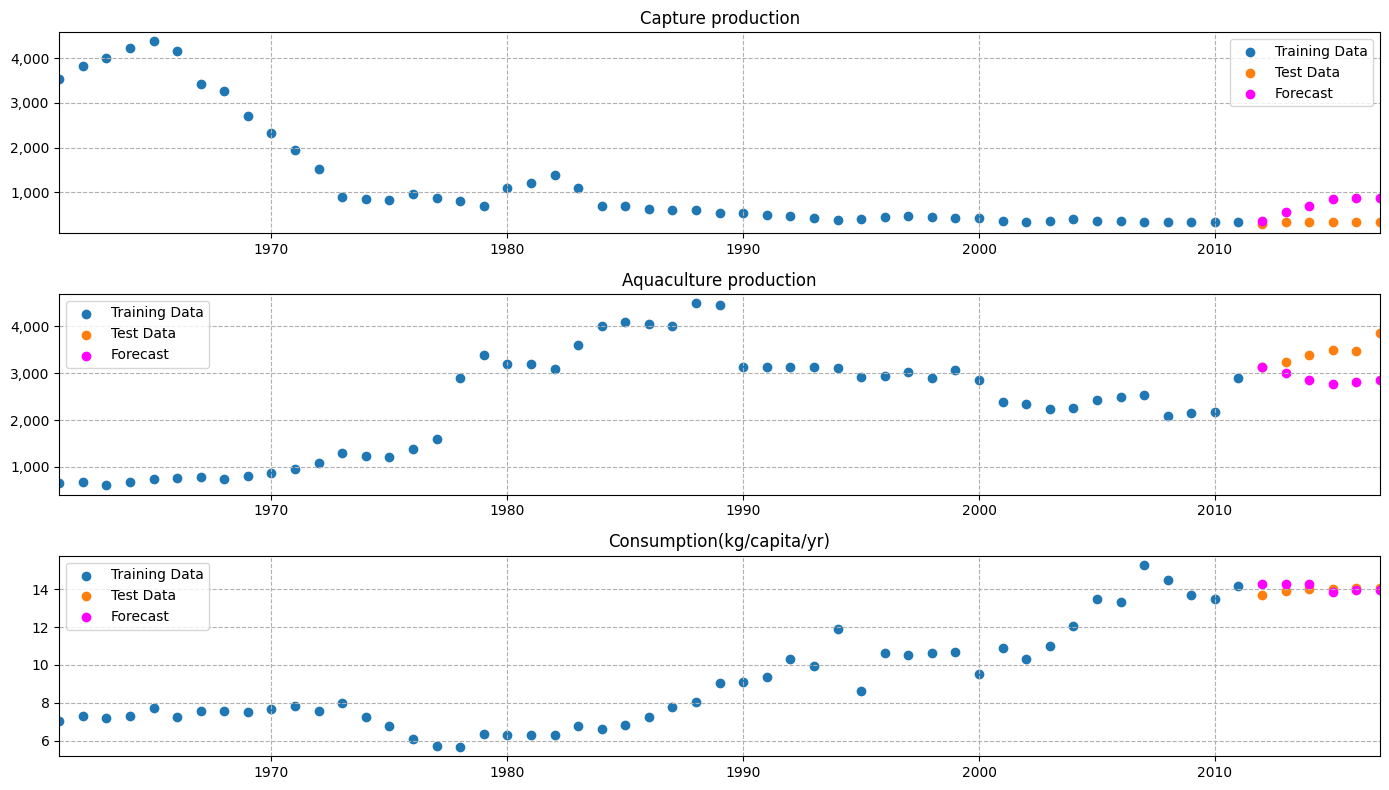

In [ ]:
# Split the data into training and testing sets
train_size = int(len(medoid_C_ts) * 0.9)    # 90-10 split
train, test = medoid_C_ts[:train_size], medoid_C_ts[train_size:]

# Fit the VECM model on the training set
chosen_lag_order = 4
coint_rank = 1
model = VECM(train, k_ar_diff=chosen_lag_order, coint_rank=coint_rank)
results = model.fit()

# Forecasting for the length of the test set
forecast_steps = len(test)
forecast = results.predict(steps=forecast_steps)

# Convert forecast to DataFrame for easier comparison
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps+1, freq='AS-JAN')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=test.columns)

# Calculate error metrics
mse = mean_squared_error(test, forecast_df)
nmse = mse / np.var(test)
r2 = r2_score(test, forecast_df)
mape = mean_absolute_percentage_error(test, forecast_df)

# print("MSE:", mse)
print("NMSE:\n", nmse)
print(f"R-squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")


# Plot the original and forecasted values
def format_yticks(x, pos):
    return f'{x:,.0f}'

plt.figure(figsize=(14, 8))

# Plot for each variable
for i, col in enumerate(medoid_C_ts.columns):
    plt.subplot(len(medoid_C_ts.columns), 1, i+1)
    plt.scatter(train.index.year, train[col], label='Training Data')
    plt.scatter(test.index.year, test[col], label='Test Data')
    plt.scatter(forecast_df.index.year, forecast_df[col], label='Forecast', color='magenta')

    plt.title(col)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
    plt.grid(True, linestyle='--')
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    plt.xlim((medoid_C_ts.index.year[0], forecast_df.index.year[-1]))

plt.tight_layout()
plt.show()

##🔹K-Means (worst overall)

* We run consecutive KMeans in a hierarchical fashion, each time choosing the optimal number of clusters by following the *elbow-criterion* method.

###1st level clustering

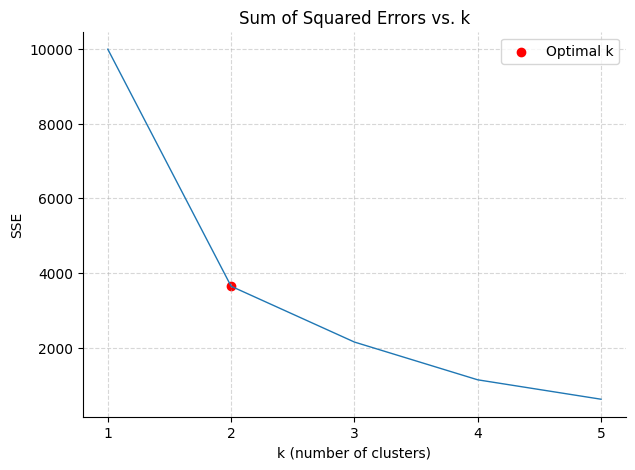

In [ ]:
from sklearn.cluster import KMeans

def iterative_KMeans(df):
  sse = {}    # a dict with the k-sse value pairs
  for k in range(1, 6):
    clustering = KMeans(n_clusters=k, random_state=13, n_init='auto', max_iter=1000).fit(df)
    sse[k] = clustering.inertia_
  return clustering, sse

clustering, sse = iterative_KMeans(df_reduced)

# plot to find the optimal k
plt.figure(figsize=(7, 5))
plt.title("Sum of Squared Errors vs. k")
plt.plot(list(sse.keys()), list(sse.values()), linewidth=1)
plt.scatter(2, sse[2], color='red', label='Optimal k')

plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

* The optimal value (elbow point) for k is 2, so we run again a KMeans for this value.

In [ ]:
# cluster again for k=2
k = 2
clustering = KMeans(n_clusters=k, random_state=13, n_init='auto', max_iter=1000).fit(df_reduced)
labels = clustering.labels_
centroids = clustering.cluster_centers_

for clusterid in set(clustering.labels_):
  print (f"{list(clustering.labels_).count(clusterid)} countries in cluster {clusterid}")

175 countries in cluster 0
4 countries in cluster 1


NameError: name 'df_reduced' is not defined

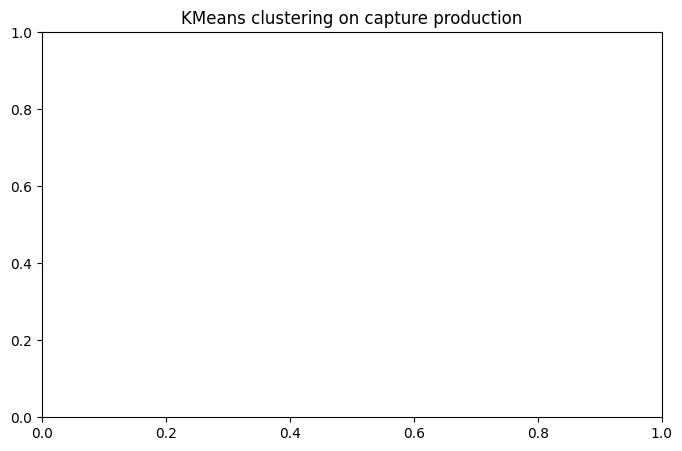

In [ ]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(8, 5))
plt.title('KMeans clustering on capture production')
colors = ['green', 'red']
cmap_cust = ListedColormap(colors)

plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=labels, marker='.', cmap=cmap_cust)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Cluster centroids')

plt.legend(loc='upper left', fontsize=9)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# KMeans performance: silhouette coefficient
from sklearn import metrics

score = metrics.silhouette_score(df_reduced, clustering.labels_)
print(f"Silhouette coefficient for k={k} : {round(score, 4)}")

Silhouette coefficient for k=2 : 0.9174


In [ ]:
cluster_0 = df[labels == 0]

# detect the outlier countries that belong to cluster 1
outliers = df[labels == 1].index
outliers.tolist()

['China', 'Japan', 'Peru', 'United States']

##🔹OPTICS & DBSCAN (best traditional)

* We run consecutive OPTICS and DBSCAN in a hierarchical fashion, each time choosing the optimal epsilon value by plotting the silhouette coefficient against epsilon and finding the point of diminishing returns.

###1st level OPTICS

In [ ]:
from sklearn.cluster import OPTICS
from sklearn import metrics

def iterative_OPTICS(df):
    '''Returns the best hyperparameters for OPTICS'''
    scores = {}
    best_score = -1
    best_params = {}

    # Parameter ranges to test
    min_samples_range = [3, 5, 10, 15]
    xi_range = np.linspace(0.01, 0.2, 10)
    min_cluster_size_range = [0.05, 0.1, 0.2, 0.5]

    for min_samples in min_samples_range:
        for xi in xi_range:
            for min_cluster_size in min_cluster_size_range:
                optics_clustering = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size).fit(df)
                labels = optics_clustering.labels_

                # Filter out noise points
                filtered_df = df_reduced[labels != -1]
                filtered_labels = labels[labels != -1]

                if len(set(filtered_labels)) > 1:
                    score = metrics.silhouette_score(filtered_df, filtered_labels)
                    scores[(min_samples, xi, min_cluster_size)] = score

                    if score > best_score:
                        best_score = score
                        best_params = {'min_samples': min_samples, 'xi': round(xi,5),\
                                       'min_cluster_size': min_cluster_size}

    return best_params

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# scaling and PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

optics_best_params = iterative_OPTICS(df_reduced)
print(optics_best_params)

{'min_samples': 10, 'xi': 0.09444, 'min_cluster_size': 0.05}


In [ ]:
# run OPTICS with the best hyperparameters
clustering = OPTICS(**optics_best_params).fit(df_reduced)

labels = clustering.labels_
core_distances = clustering.core_distances_

for clusterid in set(clustering.labels_):
  print (f"{list(clustering.labels_).count(clusterid)} countries in cluster {clusterid}")

12 countries in cluster 0
11 countries in cluster 1
45 countries in cluster -1


In [ ]:
filtered_df = df_reduced[labels != -1]
filtered_labels = labels[labels != -1]
score = metrics.silhouette_score(filtered_df, filtered_labels)
print(f'Silhouette score: {round(score, 5)}')

Silhouette score: 0.80811


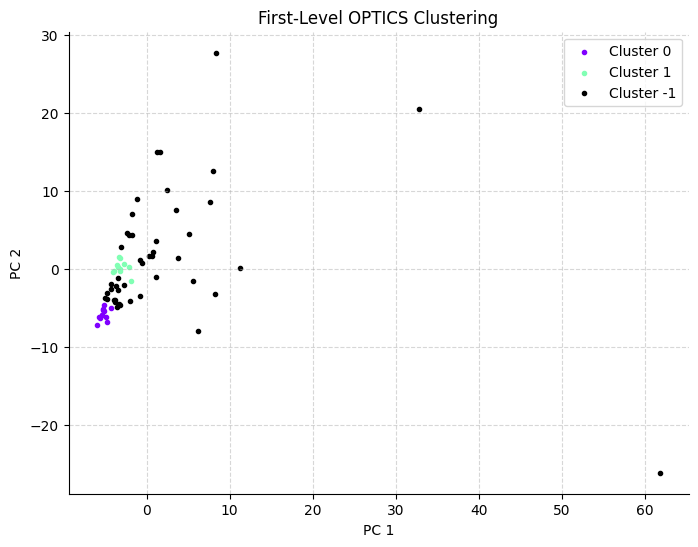

In [ ]:
plt.figure(figsize=(8, 6))

# Plot points colored by cluster label
colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(set(labels)))]

for label, color in zip(set(labels), colors):
    if label == -1:
        color = 'black'

    # Plot points in this cluster
    cluster_mask = (labels == label)
    plt.scatter(df_reduced[cluster_mask, 0], df_reduced[cluster_mask, 1], marker='.',\
                color=color, label=f'Cluster {label}')

plt.title('First-Level OPTICS Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Reachability plot: \\
Flat regions (valleys) indicate the presence of clusters with uniform density, while peaks are points on the edge of clusters. The absence of such peaks indicates non-clearly defined clusters.

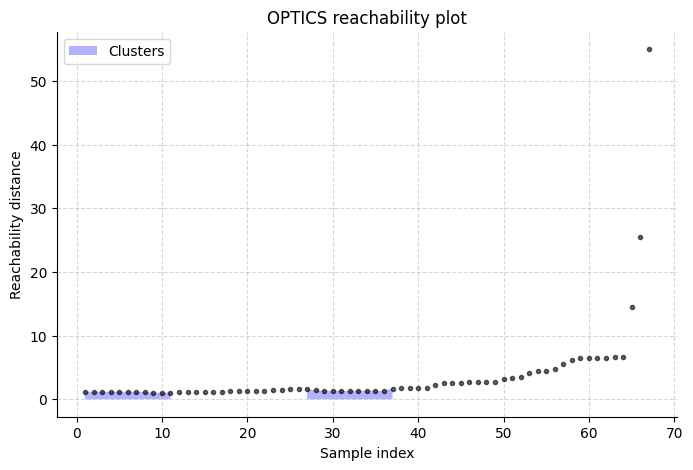

In [ ]:
# Extract reachability and ordering
reachability = clustering.reachability_[clustering.ordering_]
labels = clustering.labels_[clustering.ordering_]
space = np.arange(len(df_reduced))

# Plot reachability
plt.figure(figsize=(8, 5))
plt.plot(space, reachability, 'k.', alpha=0.6)
plt.fill_between(space, 0, reachability, where=labels != -1, facecolor='b', alpha=0.3, label='Clusters')
plt.title('OPTICS reachability plot')
plt.xlabel('Sample index')
plt.ylabel('Reachability distance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
cluster_0 = df[labels == 0]
cluster_1 = df[labels == 1]
cluster_noise = df[labels == -1]
# detect the outlier countries (noise points) with label -1
outliers = cluster_noise.index

###2nd level DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

def iterative_DBSCAN(df, min_samples):
  scores = {}
  for i in range(1, 100):
    epsilon = i / 10
    dbscan_clustering = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df_reduced)
    labels = dbscan_clustering.labels_
    if len(set(labels)) > 1:
      scores[epsilon] = metrics.silhouette_score(df_reduced, dbscan_clustering.labels_)
    else:
      scores[epsilon] = 0
    # print(epsilon, scores[epsilon])
  return dbscan_clustering, scores

####Inside cluster_0

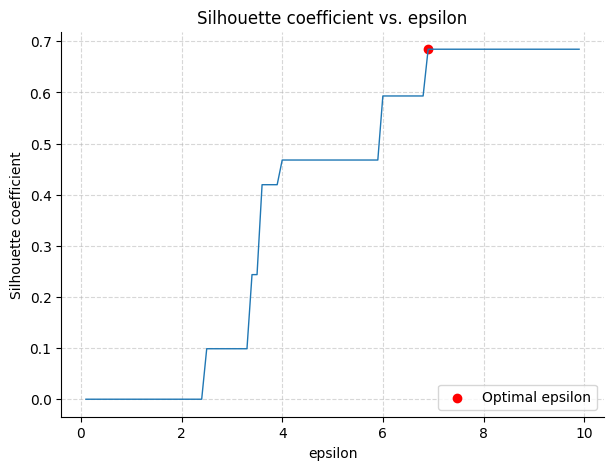

In [ ]:
# scaling and PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cluster_0)

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

clustering, scores = iterative_DBSCAN(df_reduced, 4)

# plot to find the optimal epsilon
plt.figure(figsize=(7, 5))
plt.title("Silhouette coefficient vs. epsilon")
plt.plot(list(scores.keys()), list(scores.values()), linewidth=1)
plt.scatter(6.9, scores[6.9], color='red', label='Optimal epsilon')

plt.xlabel("epsilon")
plt.ylabel("Silhouette coefficient")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
# cluster for optimal epsilon
epsilon = 6.9
clustering = DBSCAN(eps=epsilon, min_samples=4).fit(df_reduced)
labels = clustering.labels_

for clusterid in set(clustering.labels_):
  print (f"{list(clustering.labels_).count(clusterid)} countries in cluster {clusterid}")

11 countries in cluster 0
1 countries in cluster -1


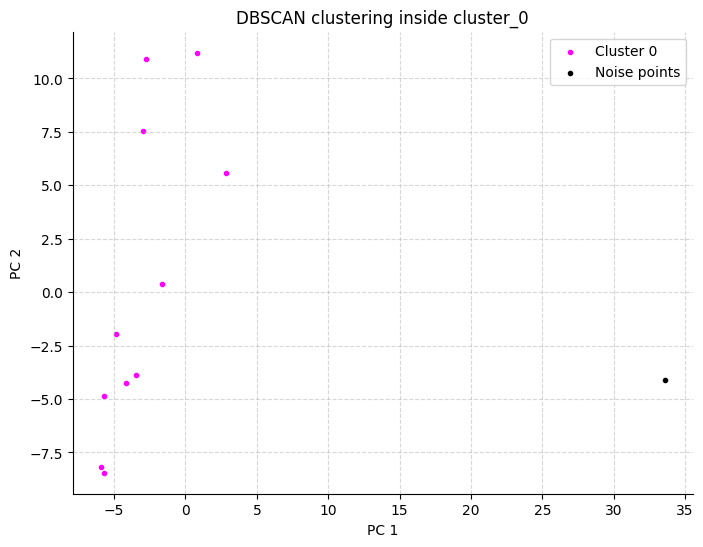

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('DBSCAN clustering inside cluster_0')
colors = ['magenta', 'black']

for i, label in enumerate(set(labels)):
    if label == -1:
        # Label -1 represents noise points (not assigned to any cluster)
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label='Noise points')
    else:
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label=f'Cluster {label}')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
score = metrics.silhouette_score(df_reduced, clustering.labels_)
print(f"Silhouette coefficient for epsilon={epsilon} : {round(score, 4)}")

Silhouette coefficient for epsilon=6.9 : 0.6845


In [ ]:
cluster_00 = cluster_0[labels == 0]
cluster_0noise = cluster_0[labels == -1]

####Inside cluster_1

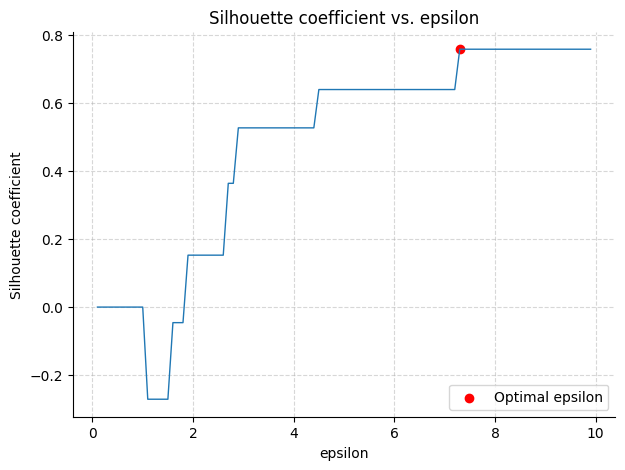

In [ ]:
# scaling and PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cluster_1)

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

clustering, scores = iterative_DBSCAN(df_reduced, 2)

# plot to find the optimal epsilon
plt.figure(figsize=(7, 5))
plt.title("Silhouette coefficient vs. epsilon")
plt.plot(list(scores.keys()), list(scores.values()), linewidth=1)
plt.scatter(7.3, scores[7.3], color='red', label='Optimal epsilon')

plt.xlabel("epsilon")
plt.ylabel("Silhouette coefficient")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
# cluster for optimal epsilon
epsilon = 7.3
clustering = DBSCAN(eps=epsilon, min_samples=2).fit(df_reduced)
labels = clustering.labels_

for clusterid in set(clustering.labels_):
  print (f"{list(clustering.labels_).count(clusterid)} countries in cluster {clusterid}")

10 countries in cluster 0
1 countries in cluster -1


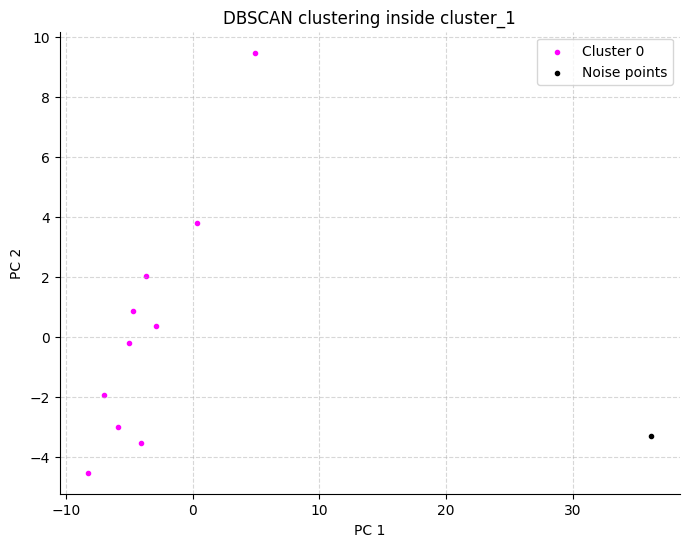

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('DBSCAN clustering inside cluster_1')
colors = ['magenta', 'black']

for i, label in enumerate(set(labels)):
    if label == -1:
        # Label -1 represents noise points (not assigned to any cluster)
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label='Noise points')
    else:
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label=f'Cluster {label}')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
score = metrics.silhouette_score(df_reduced, clustering.labels_)
print(f"Silhouette coefficient for epsilon={epsilon} : {round(score, 4)}")

Silhouette coefficient for epsilon=7.3 : 0.758


##🔹Applying kernel decomposition for maximum data separation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn import metrics

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# find the optimal kernel parameters
gamma_values = [0.1, 1]
n_components = [2, 3, 5, 10]
best_kpca = None
best_df_reduced = None
max_unique_points = 0

for gamma in gamma_values:
    for n_comp in n_components:
        kpca = KernelPCA(n_components=n_comp, kernel='rbf', gamma=gamma)
        df_reduced = kpca.fit_transform(df_scaled)

        # find number of unique points (rows) in the current transformation
        num_unique_points = np.unique(df_reduced, axis=0).shape[0]

        # check if the current transformation has more unique points
        if num_unique_points > max_unique_points:
            best_kpca = kpca
            best_df_reduced = df_reduced
            best_gamma = gamma
            best_n_components = n_comp
            max_unique_points = num_unique_points

df_reduced = best_df_reduced

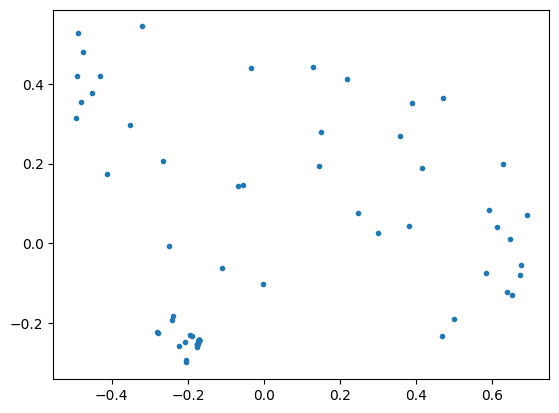

In [ ]:
plt.scatter(df_reduced[:,0], df_reduced[:, 1], marker='.')

###1st level OPTICS

In [ ]:
# find best OPTICS parameters
optics_best_params = iterative_OPTICS(df_reduced)
print(optics_best_params)

{'min_samples': 10, 'xi': 0.2, 'min_cluster_size': 0.1}


In [ ]:
# run OPTICS with the best parameters
clustering = OPTICS(**optics_best_params).fit(df_reduced)

labels = clustering.labels_
core_distances = clustering.core_distances_

for clusterid in set(clustering.labels_):
  print (f"{list(clustering.labels_).count(clusterid)} countries in cluster {clusterid}")

28 countries in cluster 0
9 countries in cluster 1
31 countries in cluster -1


In [ ]:
filtered_df = df_reduced[labels != -1]
filtered_labels = labels[labels != -1]
score = metrics.silhouette_score(filtered_df, filtered_labels)
print(f'Silhouette score: {round(score, 5)}')

Silhouette score: 0.90697


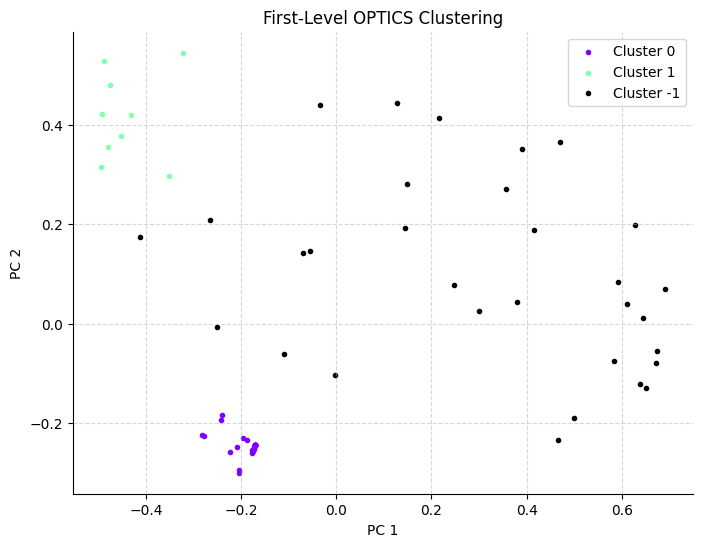

In [ ]:
plt.figure(figsize=(8, 6))

# Plot points colored by cluster label
colors = [plt.cm.rainbow(each) for each in np.linspace(0, 1, len(set(labels)))]

for label, color in zip(set(labels), colors):
    if label == -1:
        color = 'black'

    # Plot points in this cluster
    cluster_mask = (labels == label)
    plt.scatter(df_reduced[cluster_mask, 0], df_reduced[cluster_mask, 1], marker='.',\
                color=color, label=f'Cluster {label}')

plt.title('First-Level OPTICS Clustering')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

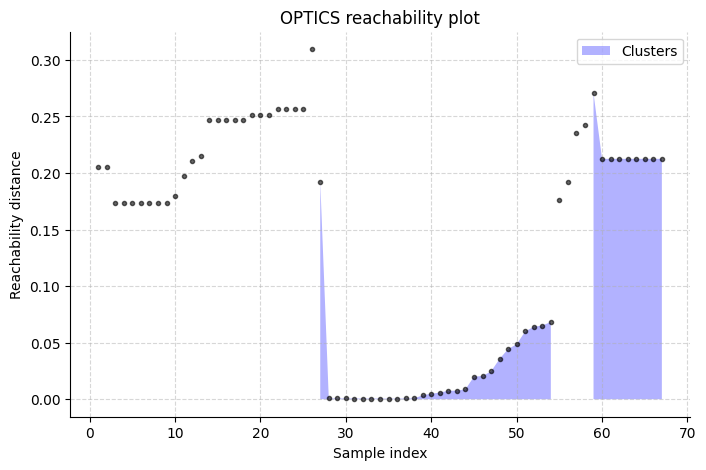

In [ ]:
# Extract reachability and ordering
reachability = clustering.reachability_[clustering.ordering_]
labels = clustering.labels_[clustering.ordering_]
space = np.arange(len(df_reduced))

# Plot reachability
plt.figure(figsize=(8, 5))
plt.plot(space, reachability, 'k.', alpha=0.6)
plt.fill_between(space, 0, reachability, where=labels != -1, facecolor='b', alpha=0.3, label='Clusters')
plt.title('OPTICS reachability plot')
plt.xlabel('Sample index')
plt.ylabel('Reachability distance')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

* Both plots exhibit better data seperation than without the Kernel decomposition.

In [ ]:
cluster_0 = df[labels == 0]
cluster_1 = df[labels == 1]
cluster_noise = df[labels == -1]
# detect the outlier countries (noise points) with label -1
outliers = cluster_noise.index

###2nd level DBSCAN

####Inside cluster_0

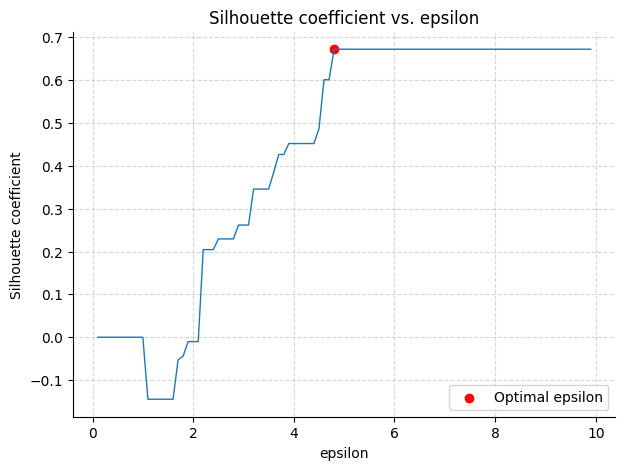

In [ ]:
from sklearn.decomposition import PCA

# scaling and PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cluster_0)

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

clustering, scores = iterative_DBSCAN(df_reduced, 4)

# plot to find the optimal epsilon
plt.figure(figsize=(7, 5))
plt.title("Silhouette coefficient vs. epsilon")
plt.plot(list(scores.keys()), list(scores.values()), linewidth=1)
plt.scatter(4.8, scores[4.8], color='red', label='Optimal epsilon')

plt.xlabel("epsilon")
plt.ylabel("Silhouette coefficient")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
# cluster for optimal epsilon
epsilon = 4.8
clustering = DBSCAN(eps=epsilon, min_samples=4).fit(df_reduced)
labels = clustering.labels_

for clusterid in set(clustering.labels_):
  print (f"{list(clustering.labels_).count(clusterid)} countries in cluster {clusterid}")

25 countries in cluster 0
3 countries in cluster -1


In [ ]:
score = metrics.silhouette_score(df_reduced, clustering.labels_)
print(f"Silhouette coefficient for epsilon={epsilon} : {round(score, 4)}")

Silhouette coefficient for epsilon=4.8 : 0.6721


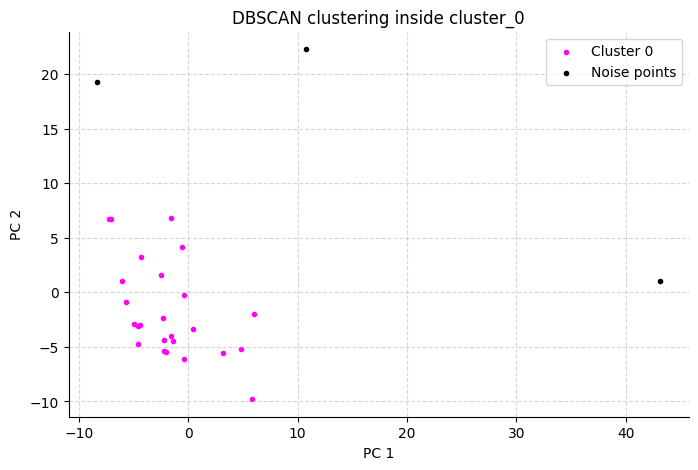

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('DBSCAN clustering inside cluster_0')
colors = ['magenta', 'black']

for i, label in enumerate(set(labels)):
    if label == -1:
        # Label -1 represents noise points (not assigned to any cluster)
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label='Noise points')
    else:
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label=f'Cluster {label}')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
cluster_0 = cluster_0[labels == 0]

####Inside cluster_1

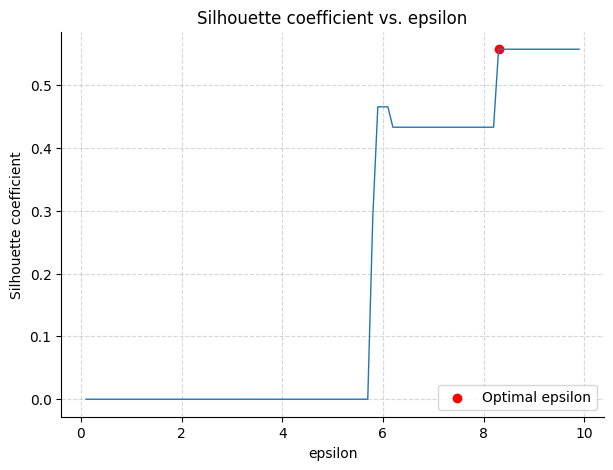

In [ ]:
# scaling and PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cluster_1)

pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df_scaled)

clustering, scores = iterative_DBSCAN(df_reduced, 4)

# plot to find the optimal epsilon
plt.figure(figsize=(7, 5))
plt.title("Silhouette coefficient vs. epsilon")
plt.plot(list(scores.keys()), list(scores.values()), linewidth=1)
plt.scatter(8.3, scores[8.3], color='red', label='Optimal epsilon')

plt.xlabel("epsilon")
plt.ylabel("Silhouette coefficient")
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
# cluster for optimal epsilon
epsilon = 8.3
clustering = DBSCAN(eps=epsilon, min_samples=4).fit(df_reduced)
labels = clustering.labels_

for clusterid in set(clustering.labels_):
  print (f"{list(clustering.labels_).count(clusterid)} countries in cluster {clusterid}")

8 countries in cluster 0
1 countries in cluster -1


In [ ]:
score = metrics.silhouette_score(df_reduced, clustering.labels_)
print(f"Silhouette coefficient for epsilon={epsilon} : {round(score, 4)}")

Silhouette coefficient for epsilon=8.3 : 0.557


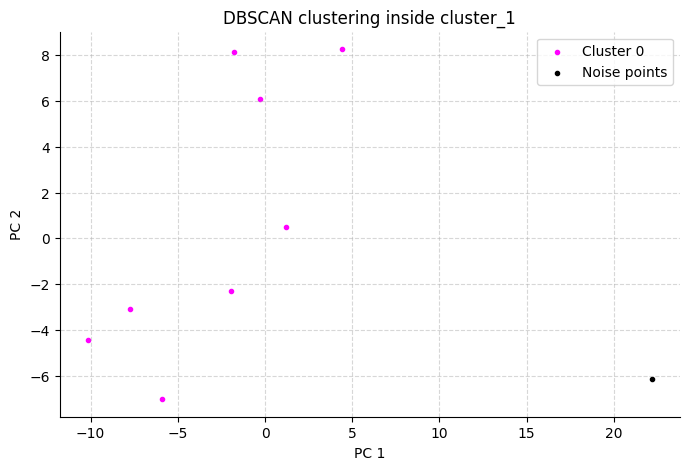

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('DBSCAN clustering inside cluster_1')
colors = ['magenta', 'black']

for i, label in enumerate(set(labels)):
    if label == -1:
        # Label -1 represents noise points (not assigned to any cluster)
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label='Noise points')
    else:
        plt.scatter(df_reduced[labels == label, 0], df_reduced[labels == label, 1],
                    color=colors[i], marker='.', label=f'Cluster {label}')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
cluster_1 = cluster_1[labels == 0]

* Silhouette scores turned out sub-optimal.

##🔹TS modeling on clusters (traditional)
---
* For each cluster we want to produce a single TS model for forecasting the values of the 3 features.
* Each df should have the years for rows and the 3 features of each country for columns (*3 x countries* columns).
* We want to test different train-test splits and find the best for each model.

In [ ]:
df_ts.head()

Entity  Year  Capture production  Aquaculture production  \
0  Afghanistan  1969               400.0                    60.0   
1  Afghanistan  1970               400.0                    60.0   
2  Afghanistan  1971               500.0                    60.0   
3  Afghanistan  1972               500.0                    60.0   
4  Afghanistan  1973               500.0                    60.0   

   Consumption(kg/capita/yr)  
0                       0.04  
1                       0.04  
2                       0.05  
3                       0.05  
4                       0.05

In [ ]:
countries_0 = list(cluster_0.index)   # cluster_0
countries_1 = list(cluster_1.index)   # cluster_1

In [ ]:
# for cluster_0
years = range(1961, 2018)

country_features = {}   # save the features of each country in a dict
for country in countries_0:
  country_features[country] = df_ts[df_ts['Entity'] == country].set_index('Year').loc[years]

ts_0 = pd.DataFrame(index=years)
for country, country_df in country_features.items():
  stacked_features = np.hstack([
        country_df['Capture production'].values.reshape(-1, 1),
        country_df['Aquaculture production'].values.reshape(-1, 1),
        country_df['Consumption(kg/capita/yr)'].values.reshape(-1, 1)
        ])

  df_country = pd.DataFrame(stacked_features, index=years, columns=[f'{country}_Capture',
                                                                     f'{country}_Aquaculture',
                                                                     f'{country}_Consumption'])
  ts_0 = pd.concat([ts_0, df_country], axis=1)
  del df_country

ts_0.shape    # each triplet of columns (country) corresponds to a different realization of the process

(57, 36)

In [ ]:
# for cluster_1
years = range(1961, 2018)

country_features = {}   # save the features of each country in a dict
for country in countries_1:
  country_features[country] = df_ts[df_ts['Entity'] == country].set_index('Year').loc[years]

ts_1 = pd.DataFrame(index=years)
for country, country_df in country_features.items():
  stacked_features = np.hstack([
        country_df['Capture production'].values.reshape(-1, 1),
        country_df['Aquaculture production'].values.reshape(-1, 1),
        country_df['Consumption(kg/capita/yr)'].values.reshape(-1, 1)
        ])

  df_country = pd.DataFrame(stacked_features, index=years, columns=[f'{country}_Capture',
                                                                     f'{country}_Aquaculture',
                                                                     f'{country}_Consumption'])
  ts_1 = pd.concat([ts_1, df_country], axis=1)
  del df_country

ts_1.shape

(57, 33)

In [ ]:
capture_0 = ts_0.columns[::3]
aquaculture_0 = ts_0.columns[1::3]
consumption_0 = ts_0.columns[2::3]

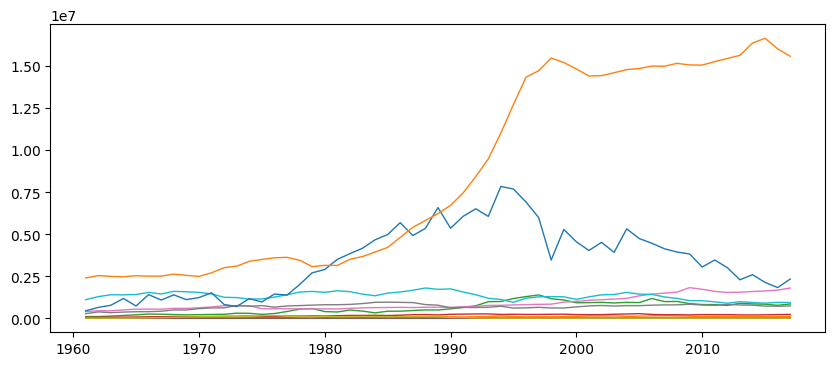

In [ ]:
# plot time series of each cluster
for i in range(3):
  plt.figure(figsize=(12, 4))
  plt.title(f'Cluster 0: feature {i}')
  columns_to_plot = ts_0.columns[i::3]

  for col in columns_to_plot:
    plt.plot(ts_0[col], linewidth=1)

  plt.ylabel('feature values')
  plt.yticks([])
  plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.signal import detrend

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

In [ ]:
ts_0_log = np.log(ts_0 + 1)
ts_0_diff = ts_0_log.diff().dropna()

In [ ]:
ts_0_boxcox = ts_0.apply(lambda x: boxcox(x + 1)[0])

In [ ]:
# Check stationarity for each t.s. (column)
for col in ts_0_boxcox.columns:
    print(f'\nStationarity test for {col}:')
    check_stationarity(ts_0[col])


Stationarity test for Ireland_Capture:
ADF Statistic: -1.5427549508536647
p-value: 0.5122651265204844
Critical Value (1%): -3.5552728880540942
Critical Value (5%): -2.9157312396694217
Critical Value (10%): -2.5956695041322315

Stationarity test for Ireland_Aquaculture:
ADF Statistic: -1.0051051861748923
p-value: 0.7513977505395232
Critical Value (1%): -3.55770911573439
Critical Value (5%): -2.9167703434435808
Critical Value (10%): -2.59622219478738

Stationarity test for Ireland_Consumption:
ADF Statistic: -1.4384044322484497
p-value: 0.5637324460229243
Critical Value (1%): -3.5552728880540942
Critical Value (5%): -2.9157312396694217
Critical Value (10%): -2.5956695041322315

Stationarity test for Israel_Capture:
ADF Statistic: -0.8789288228168033
p-value: 0.7948322431720373
Critical Value (1%): -3.552928203580539
Critical Value (5%): -2.9147306250000002
Critical Value (10%): -2.595137155612245

Stationarity test for Israel_Aquaculture:
ADF Statistic: -1.412083770233619
p-value: 0.576

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model = VAR(ts_0)
results = model.fit()
print(results.summary())

In [ ]:
factor_model = sm.tsa.DynamicFactor(ts_0, k_factors=2, factor_order=2)
factor_results = factor_model.fit()

# Print summary of factor model results
print(factor_results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Statespace Model Results                                                                                                                                                                                                                                                                                                

#▶️PREDICTING SUSTAIN LEVELS
---
* Choose a viable year range for which the datasets to be used don't need to be extrapolated.
* Using linear regression, interpolate the df5_world dataframe (which corresponds to global sustainable levels) so that missing values are filled.
* Create the merged dataframe which will then be split into training and testing datasets.
* Model ideas:
Linear regression, Baysian ridge regression, SVR, Random Forest


In [ ]:
print(df2_world.shape)    # capture_production --> 1960-2015          |
print(df3_world.shape)    # farmed_production --> 1960-2015           | FEATURES
print(df4_world.shape)    # consumption_per_capita --> 1961-2013      |

print(df5_world.shape)    # sustain_levels --> 1974-2017 (with gaps)  | TARGET

(56, 2)
(56, 2)
(53, 2)
(21, 2)


##Data preproccessing

* Interpolation on df5_world to fill gaps

In [ ]:
# extending the "Years" column so that it is filled with NaN on the missing years
years = pd.DataFrame({"Year": range(1974, 2018)})
df5_world = pd.merge(years, df5_world, on='Year', how='left')
df5_world.head(10)

Year  sustainable
0  1974    90.000000
1  1975          NaN
2  1976          NaN
3  1977          NaN
4  1978    91.463415
5  1979    86.982249
6  1980          NaN
7  1981    86.419753
8  1982          NaN
9  1983    83.333333

In [ ]:
# Transposing the df into a single row for use in the regression function
df_to_fill = df5_world.set_index('Year').transpose()
df_to_fill.shape

(1, 44)

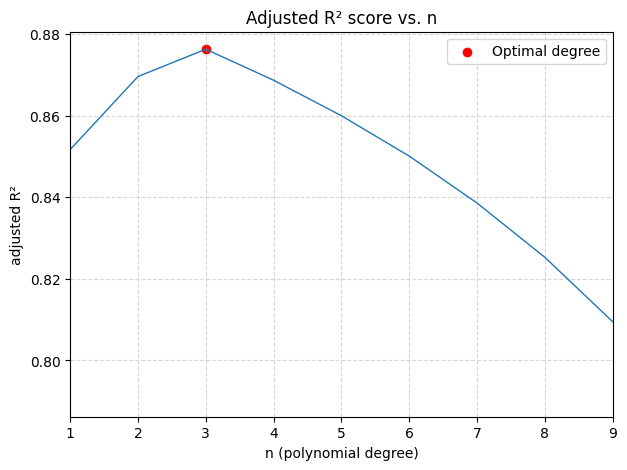

In [ ]:
# finding the optimal polynomial regression degree
def iterative_linear_regression(df):
  scores = {}
  for degree in range (1, 11):
    df_new, performance = fill_NaN_regression(df, degree)
    scores[degree] = performance[0][1]
  return scores

scores = iterative_linear_regression(df_to_fill)

plt.figure(figsize=(7, 5))
plt.title("Adjusted R² score vs. n")
plt.plot(list(scores.keys()), list(scores.values()), linewidth=1)
plt.scatter(3, scores[3], color='red', label='Optimal degree')

plt.xlabel("n (polynomial degree)")
plt.ylabel("adjusted R²")
plt.legend()
plt.xticks(list(scores.keys()))
plt.xlim((1,9))
plt.grid(True, linestyle='--', alpha=0.5)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.show()

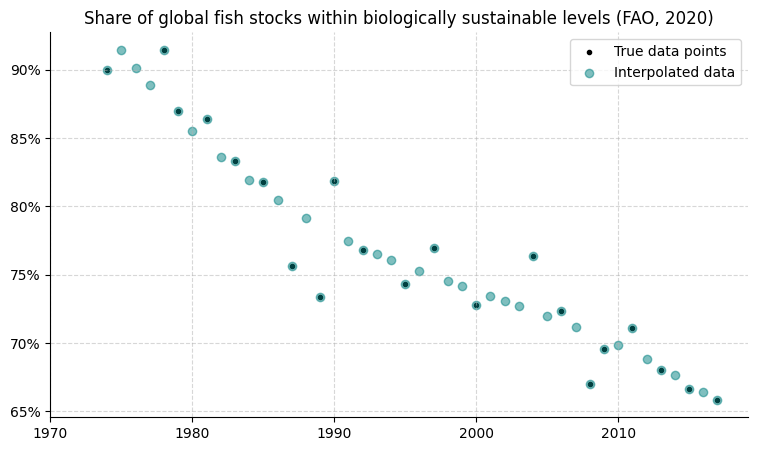

In [ ]:
df_filled, performance = fill_NaN_regression(df_to_fill, degree=3)

# interpolation plot
plt.figure(figsize=(9, 5))
plt.title("Share of global fish stocks within biologically sustainable levels (FAO, 2020)")

plt.scatter(df_to_fill.iloc[0].index, df_to_fill.iloc[0].values, color='black', marker='.', label='True data points')
plt.scatter(df_filled.iloc[0].index, df_filled.iloc[0].values, color='teal', label='Interpolated data', alpha=0.5)

plt.legend()
plt.xticks(np.arange(1970, 2017, step=10))
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.show()

In [ ]:
df5_world = df_filled.transpose().reset_index()
df5_world.columns = ['Year', 'sustainable']
df5_world.shape

(44, 2)

* Preparing the df for the ML models

In [ ]:
df = pd.merge(df2_world, df3_world, on='Year', how='inner')
df = pd.merge(df, df4_world, on='Year', how='inner')
df = pd.merge(df, df5_world, on='Year', how='left')
df.set_index('Year', inplace=True)
df.tail()

Capture production  Aquaculture production  Consumption(kg/capita/yr)  \
Year                                                                          
2009        9.026689e+07            7.304526e+07                      18.46   
2010        8.885599e+07            7.802002e+07                      18.77   
2011        9.318084e+07            8.263540e+07                      18.93   
2012        9.051234e+07            9.002057e+07                      19.22   
2013        9.175393e+07            9.711017e+07                      18.98   

      sustainable  
Year               
2009    69.553806  
2010    69.840410  
2011    71.078431  
2012    68.828910  
2013    68.000000

##🔹Global TS modeling
---
* The features and the years need to be columns

In [ ]:
ts_world = df[['Capture production', 'Aquaculture production', 'Consumption(kg/capita/yr)']].copy()
ts_world.index = pd.to_datetime(ts_world.index, format='%Y')   # cast index to datetime
ts_world.index.freq = 'AS-JAN'  # set frequency to annual
ts_world.head()

Capture production  Aquaculture production  \
Year                                                     
1961-01-01          38630192.0               1948048.0   
1962-01-01          42035679.0               2014404.0   
1963-01-01          42996371.1               2247676.0   
1964-01-01          47586827.1               2402677.0   
1965-01-01          48653613.4               2604353.0   

            Consumption(kg/capita/yr)  
Year                                   
1961-01-01                       9.01  
1962-01-01                       9.22  
1963-01-01                       9.51  
1964-01-01                       9.62  
1965-01-01                       9.99

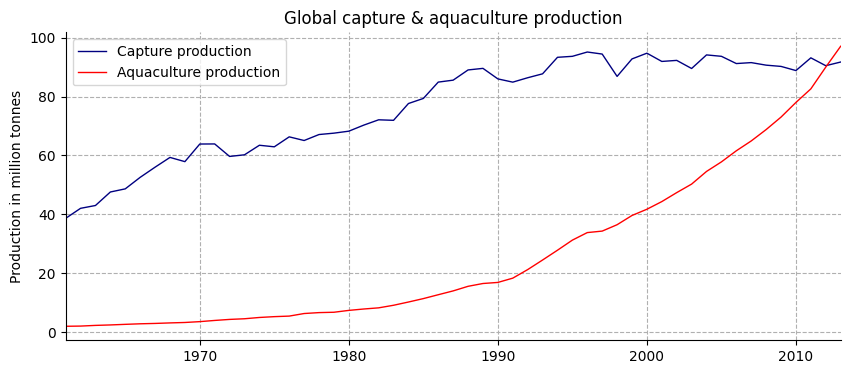

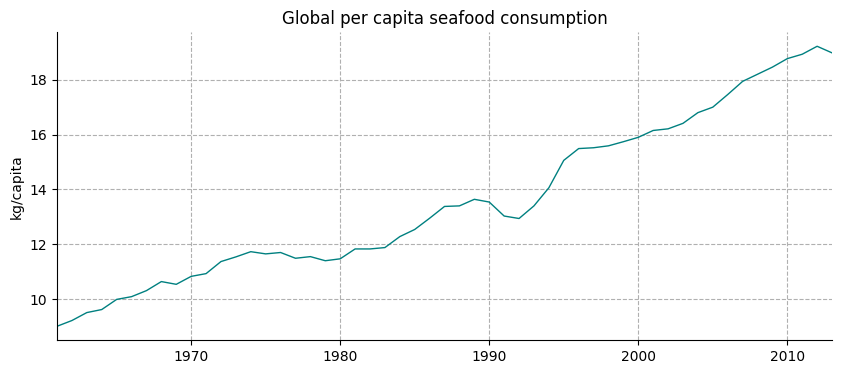

In [ ]:
def format_yticks(value, pos):
    return '{:.0f}'.format(value / 1e6)

# Plot the first two columns in the same plot
plt.figure(figsize=(10, 4))
plt.plot(ts_world.index.year, ts_world.iloc[:, 0], label=ts_world.columns[0], color='navy', linewidth=1)
plt.plot(ts_world.index.year, ts_world.iloc[:, 1], label=ts_world.columns[1],color='red',linewidth=1)
plt.title('Global capture & aquaculture production')
plt.ylabel('Production in million tonnes')
plt.legend()

plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim((1961, 2013))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
plt.show()


# Plot the third column
plt.figure(figsize=(10, 4))
plt.plot(ts_world.index.year, ts_world.iloc[:, 2], label=ts_world.columns[2], color='teal', linewidth=1)
plt.title('Global per capita seafood consumption')
plt.ylabel('kg/capita')

plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim((1961, 2013))
plt.show()

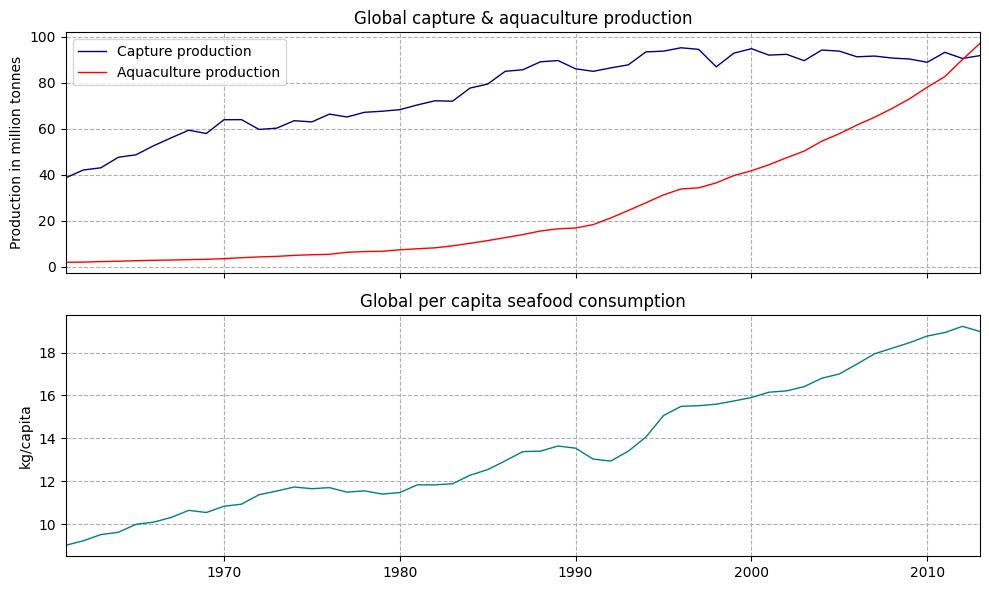

In [ ]:
def format_yticks(value, pos):
    return '{:.0f}'.format(value / 1e6)

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot the first two columns in the first subplot
axs[0].plot(ts_world.index.year, ts_world.iloc[:, 0], label=ts_world.columns[0], color='navy', linewidth=1)
axs[0].plot(ts_world.index.year, ts_world.iloc[:, 1], label=ts_world.columns[1], color='red', linewidth=1)
axs[0].set_title('Global capture & aquaculture production')
axs[0].set_ylabel('Production in million tonnes')
axs[0].legend()
axs[0].grid(True, linestyle='--')
# axs[0].spines['top'].set_visible(False)
# axs[0].spines['right'].set_visible(False)
axs[0].yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))

# Plot the third column in the second subplot
axs[1].plot(ts_world.index.year, ts_world.iloc[:, 2], label=ts_world.columns[2], color='teal', linewidth=1)
axs[1].set_title('Global per capita seafood consumption')
axs[1].set_ylabel('kg/capita')
axs[1].grid(True, linestyle='--')
# axs[1].spines['top'].set_visible(False)
# axs[1].spines['right'].set_visible(False)

# Set the x-axis limits for both subplots
axs[1].set_xlim((1961, 2013))

# Show the plot
plt.tight_layout()
plt.show()


###VAR

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.vector_ar.var_model import VAR


def ADF_KPSS(series):
    adf_result = adfuller(series)
    kpss_result = kpss(series, regression='c')
    return adf_result, kpss_result


def check_stationarity(ts):
    adf_result = adfuller(ts.dropna())
    p_value = adf_result[1]
    return p_value


def check_stationarity_cols(df_to_check):
  '''Stationarity test for each column of the df'''
  for col in df_to_check.columns:
    p_value = check_stationarity(df_to_check[col])
    if p_value <= 0.05:
        print(f"{col} is stationary with p-value = {p_value:.5f}")
    else:
        print(f"{col} is NOT stationary with p-value = {p_value:.5f}")
  return


def difference_cols(df, differences_dict):
    """
    Function to difference each column of a DataFrame the specified number of times.
    Removes rows with NaNs resulting from differencing.
    """
    df_diff = df.copy()
    for col, num_diffs in differences_dict.items():
        for _ in range(num_diffs):
            df_diff[col] = df_diff[col].diff()
    # remove rows with NaNs resulting from differencing
    df_diff.dropna(inplace=True, axis=0)
    return df_diff


def inverse_diff(series, last_observation, order):
    undiff_series = series.copy()
    # Reverse the cumulative sum for the specified order of differencing
    for i in range(order):
        undiff_series = undiff_series.cumsum()
    # Add the last observation to the first value
    undiff_series = undiff_series + last_observation
    return undiff_series

In [ ]:
ts_log = np.log(ts_world)
ts_diff = ts_world.diff().dropna()
ts_diff2 = ts_diff.diff().dropna()

In [ ]:
for col in ts_world:
  print(ADF_KPSS(ts_world[col]))

((-2.551156769631266, 0.10351809381247135, 0, 52, {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}, 1332.5406988967543), (1.075385303645679, 0.01, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))
((4.21039019174088, 1.0, 1, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 1225.51282224421), (1.0386673634719594, 0.01, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))
((1.571760745602857, 0.9977703333791235, 10, 42, {'1%': -3.596635636000432, '5%': -2.933297331821618, '10%': -2.6049909750566895}, -7.7648652529453415), (1.1299715670355401, 0.01, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}))


<ipython-input-117-f8db8fbccc30>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')
<ipython-input-117-f8db8fbccc30>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')
<ipython-input-117-f8db8fbccc30>:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')


In [ ]:
check_stationarity_cols(ts_diff)

Capture production is stationary with p-value = 0.00000
Aquaculture production is NOT stationary with p-value = 0.99908
Consumption(kg/capita/yr) is NOT stationary with p-value = 0.10279


* *p-value is the probability of observing the t.s. under the null hypothesis (presence of unit root). If p< 0.01 we accept stationarity with 99% confidence.

Results:
* Capture needs order 1 differencing
* Aquaculture and Consumption need order 2 differencing

In [ ]:
# number of differences for each column
diff_orders = {
    'Capture production': 1,
    'Aquaculture production': 2,
    'Consumption(kg/capita/yr)': 2
    }

ts_stationary = difference_cols(ts_world, diff_orders)

In [ ]:
test_size = 0.2  # 20% of data for testing

split_index = int(len(ts_stationary) * (1 - test_size))
df_train = ts_stationary.iloc[:split_index]
df_test = ts_stationary.iloc[split_index:]

In [ ]:
# gridsearch for order p
for i in [1,2,3,4,5,6,7,8,9]:
    model = VAR(df_train)
    results = model.fit(i)
    print(f'Order ={i} --> AIC: {results.aic}')
    # print('BIC: ', results.bic)

Order =1 --> AIC: 53.57332594223618
Order =2 --> AIC: 53.54951566642457
Order =3 --> AIC: 53.510233701823644
Order =4 --> AIC: 53.71886816410526
Order =5 --> AIC: 54.15314334975821
Order =6 --> AIC: 54.357040704544524
Order =7 --> AIC: 54.281212110834126
Order =8 --> AIC: 53.95229343207559
Order =9 --> AIC: 50.210024444843384


Results:
* p = 3 yields the lowest (hence better) AIC. After that it increases as complexity is added to the model (AIC penalizes complexity). These numbers are VERY close to each other so we prioritize low complexity.

In [ ]:
from sklearn.metrics import mean_squared_error

def rolling_window_cv(data, split_percentage, orders):
    split_index = int(len(data) * split_percentage)
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    best_order = None
    aic = None
    best_nmse = np.inf

    for p in orders:
        model = VAR(train_data)
        results = model.fit(p)
        forecast = results.forecast(train_data.values, steps=len(test_data))

        aic = results.aic
        mse = mean_squared_error(test_data.values, forecast)
        nmse = mse / np.var(test_data.values)

        if nmse < best_nmse:
            best_mse = mse
            best_nmse = nmse
            best_order = p
            best_aic = aic

    return best_order, best_nmse, best_aic

# parameter grid
split_percentages = [0.6, 0.7, 0.8, 0.9]
orders = [1, 2, 3, 4, 5]

results = []
for split_percentage in split_percentages:
    order, nmse, aic = rolling_window_cv(ts_stationary, split_percentage, orders)
    results.append((split_percentage, order, nmse, aic))

for split_percentage, order, nmse, aic in results:
    print(f"Train-test: {(split_percentage*100):.0f}-{((1-split_percentage)*100):.0f}")
    print(f' Best Order: {order} | NMSE: {nmse:.4f} | AIC: {aic:.5f}\n')

Train-test: 60-40
 Best Order: 1 | NMSE: 1.1923 | AIC: 52.56032

Train-test: 70-30
 Best Order: 1 | NMSE: 1.0501 | AIC: 53.22358

Train-test: 80-20
 Best Order: 1 | NMSE: 1.3608 | AIC: 53.57333

Train-test: 90-10
 Best Order: 3 | NMSE: 0.9946 | AIC: 53.74447



* While the AIC is slightly higher for the 90-10 configuration, the significantly lower NMSE suggests better prediction accuracy, which is often more crucial for forecasting tasks. In this case, the NMSE is below 1, indicating relatively good predictive performance.

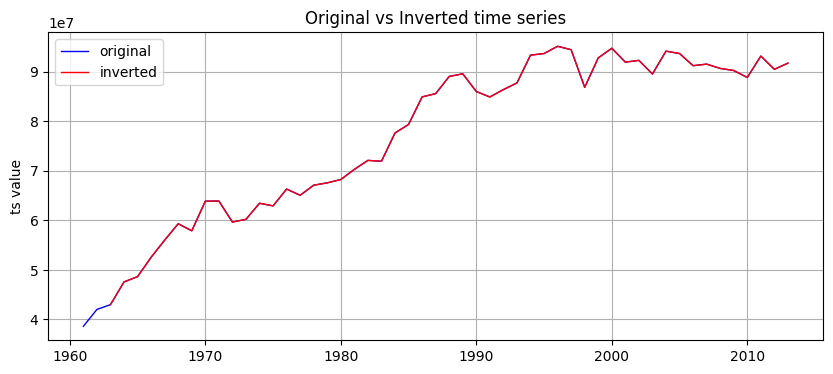

In [ ]:
# check that inverse differencing works correctly

# Invert differencing for 'Capture production' column
inverted = inverse_diff(ts_stationary['Capture production'], ts_world['Capture production'].iloc[1], order=1)

# Plot original and inverted series
plt.figure(figsize=(10, 4))
plt.plot(ts_world.index.year, ts_world['Capture production'], linewidth=1, color='b', label='original')
plt.plot(inverted.index.year, inverted, linewidth=1, color='r', label='inverted')
plt.title('Original vs Inverted time series')
plt.ylabel('ts value')
plt.legend()
plt.grid(True)
plt.show()

* Evaluate model performance on test set

NMSE:
 Capture production           3.822748e+01
Aquaculture production       1.245840e+00
Consumption(kg/capita/yr)    2.657100e+14
dtype: float64
R-squared: -9.2794
MAPE: 0.1003


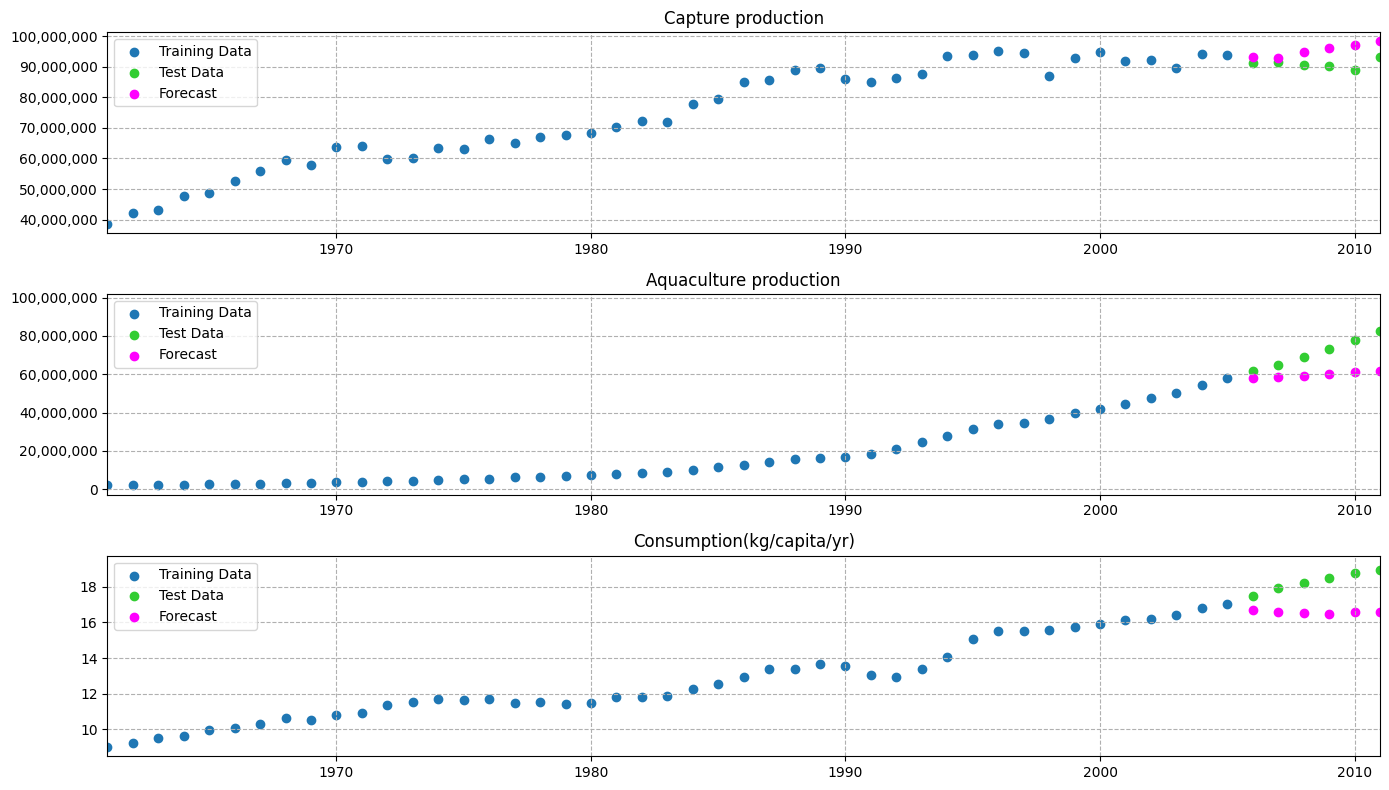

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Split the dataset
split_index = int(len(ts_stationary) * 0.9)
train = ts_stationary.iloc[:split_index]
test = ts_stationary.iloc[split_index:]

# Fit the VAR model on the training data
model = VAR(train)
results = model.fit(3)

# Forecast for the length of the test set
forecast_steps = len(test)
forecast = results.forecast(train.values, steps=forecast_steps)

# Convert the forecast to a DataFrame
forecast_index = pd.date_range(start=train.index[-1] + pd.DateOffset(years=-2), periods=forecast_steps+1, freq='AS-JAN')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=train.columns)

# Invert the differences if necessary
forecast_df['Capture production'] = inverse_diff(forecast_df['Capture production'],
                                                 ts_world['Capture production'].iloc[split_index-1],
                                                 order=1)

forecast_df['Aquaculture production'] = inverse_diff(forecast_df['Aquaculture production'],
                                                     ts_world['Aquaculture production'].iloc[split_index-1],
                                                     order=2)

forecast_df['Consumption(kg/capita/yr)'] = inverse_diff(forecast_df['Consumption(kg/capita/yr)'],
                                                        ts_world['Consumption(kg/capita/yr)'].iloc[split_index-1],
                                                        order=2)

# Calculate error metrics
mse = mean_squared_error(ts_world.iloc[split_index:-2], forecast_df)
nmse = mse / np.var(ts_world.iloc[split_index:-2])
r2 = r2_score(ts_world.iloc[split_index:-2], forecast_df)
mape = mean_absolute_percentage_error(ts_world.iloc[split_index:-2], forecast_df)

print("NMSE:\n", nmse)
print(f"R-squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")



def format_yticks(x, pos):
    return f'{x:,.0f}'

# Plot the original and forecasted values
plt.figure(figsize=(14, 8))

# Plot Capture production
plt.subplot(3, 1, 1)
plt.scatter(ts_world['Capture production'].iloc[:split_index].index.year, ts_world['Capture production'].iloc[:split_index], label='Training Data')
plt.scatter(ts_world['Capture production'].iloc[split_index:].index.year, ts_world['Capture production'].iloc[split_index:], label='Test Data', color='limegreen')
plt.scatter(forecast_df.index.year, forecast_df['Capture production'], label='Forecast', color='magenta', marker='o')
plt.title('Capture production')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
plt.grid(True, linestyle='--')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.xlim((ts_world.index.year[0], forecast_df.index.year[-1]))

# Plot Aquaculture production
plt.subplot(3, 1, 2)
plt.scatter(ts_world['Aquaculture production'].iloc[:split_index].index.year, ts_world['Aquaculture production'].iloc[:split_index], label='Training Data')
plt.scatter(ts_world['Aquaculture production'].iloc[split_index:].index.year, ts_world['Aquaculture production'].iloc[split_index:], label='Test Data', color='limegreen')
plt.scatter(forecast_df.index.year, forecast_df['Aquaculture production'], label='Forecast', color='magenta', marker='o')
plt.title('Aquaculture production')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
plt.grid(True, linestyle='--')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.xlim((ts_world.index.year[0], forecast_df.index.year[-1]))

# Plot Consumption(kg/capita/yr)
plt.subplot(3, 1, 3)
plt.scatter(ts_world['Consumption(kg/capita/yr)'].iloc[:split_index].index.year, ts_world['Consumption(kg/capita/yr)'].iloc[:split_index], label='Training Data')
plt.scatter(ts_world['Consumption(kg/capita/yr)'].iloc[split_index:].index.year, ts_world['Consumption(kg/capita/yr)'].iloc[split_index:], label='Test Data', color='limegreen')
plt.scatter(forecast_df.index.year, forecast_df['Consumption(kg/capita/yr)'], label='Forecast', color='magenta', marker='o')
plt.title('Consumption(kg/capita/yr)')
plt.legend()
plt.grid(True, linestyle='--')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.xlim((ts_world.index.year[0], forecast_df.index.year[-1]))

plt.tight_layout()
plt.show()


* Forecasting future values

In [ ]:
# Fit the VAR model with the chosen order (3) on the entire dataset
model = VAR(ts_stationary)
results = model.fit(3)

# Forecast the next 'n' steps ahead
n_forecasts = 17
forecast = results.forecast(ts_stationary.values, steps=n_forecasts)

# Convert the forecasted values to a DataFrame for easy manipulation
forecast_index = pd.date_range(start=ts_stationary.index[-1] + pd.DateOffset(years=1), periods=n_forecasts, freq='AS-JAN')
VAR_forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=ts_stationary.columns)


# Invert the differences
VAR_forecast_df['Capture production'] = inverse_diff(VAR_forecast_df['Capture production'],
                                                     ts_world['Capture production'].iloc[-1],
                                                     order=1)

VAR_forecast_df['Aquaculture production'] = inverse_diff(VAR_forecast_df['Aquaculture production'],
                                                     ts_world['Aquaculture production'].iloc[-1],
                                                     order=2)

VAR_forecast_df['Consumption(kg/capita/yr)'] = inverse_diff(VAR_forecast_df['Consumption(kg/capita/yr)'],
                                                        ts_world['Consumption(kg/capita/yr)'].iloc[-1],
                                                        order=2)

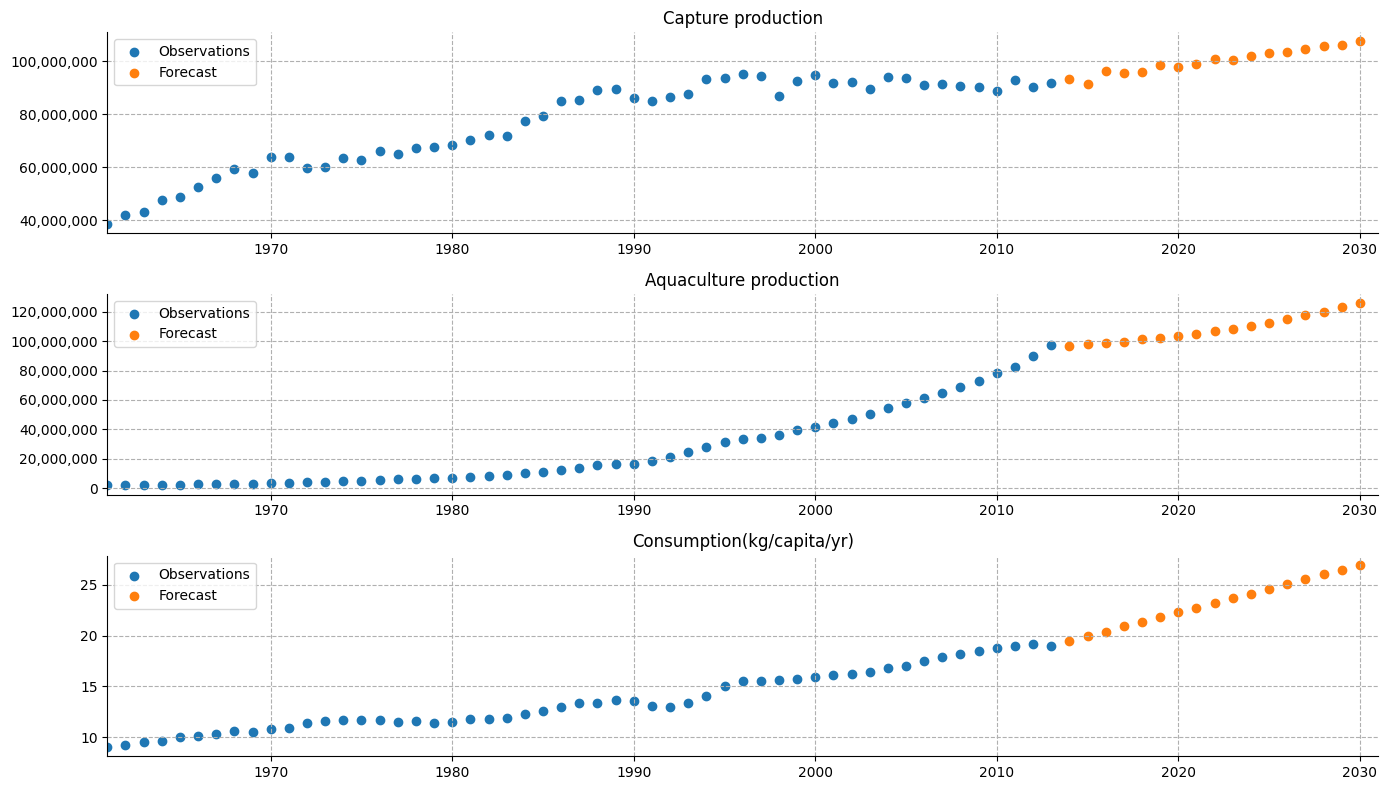

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


# Plot the original and forecasted values
plt.figure(figsize=(14, 8))

# Plot Capture production
plt.subplot(3, 1, 1)
plt.scatter(ts_world.index.year, ts_world['Capture production'], label='Observations')
plt.scatter(VAR_forecast_df.index.year, VAR_forecast_df['Capture production'], label='Forecast')
plt.title('Capture production')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim((1961, 2031))

# Plot Aquaculture production
plt.subplot(3, 1, 2)
plt.scatter(ts_world.index.year, ts_world['Aquaculture production'], label='Observations')
plt.scatter(VAR_forecast_df.index.year, VAR_forecast_df['Aquaculture production'], label='Forecast')
plt.title('Aquaculture production')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim((1961, 2031))

# Plot Consumption(kg/capita/yr)
plt.subplot(3, 1, 3)
plt.scatter(ts_world.index.year, ts_world['Consumption(kg/capita/yr)'], label='Observations')
plt.scatter(VAR_forecast_df.index.year, VAR_forecast_df['Consumption(kg/capita/yr)'], label='Forecast')
plt.title('Consumption(kg/capita/yr)')
plt.legend()
plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim((1961, 2031))

plt.tight_layout()
plt.show()

* Forecasts seem a bit biased/ underfitting

###VECM

* VECM always is one lag less than the underlying VAR model. In our case this is 3-1=2.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, coint_johansen

lag_order = select_order(ts_world, maxlags=10, deterministic="ci")
print(lag_order.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        53.90       54.52   2.570e+23       54.13
1        53.50       54.49   1.742e+23       53.86
2        53.82       55.19   2.457e+23       54.32
3        53.97       55.71   2.974e+23       54.61
4        54.28       56.39   4.325e+23       55.05
5        54.35       56.84   5.179e+23       55.26
6        54.15       57.00   4.910e+23       55.19
7        53.75       56.98   4.127e+23       54.93
8        53.71       57.31   5.504e+23       55.03
9        51.78       55.75   1.286e+23       53.23
10      49.65*      54.00*  3.283e+22*      51.24*
--------------------------------------------------


Order 1 also looks promising. Will try both.

* Next we test cointegration\
(Cointegration: If a linear combination of non-stationary series is itself stationary, the series are said to be cointegrated. This implies that there is a long-term equilibrium relationship among the series, despite them being non-stationary individually.)

In [ ]:
# Johansen test for cointegration
coint_test = coint_johansen(ts_world, det_order=0, k_ar_diff=2)

print('Trace Statistic:')
print(coint_test.lr1)  # Trace statistic

print('\nCritical Values (90%, 95%, 99%):')
print(coint_test.cvt)  # Critical values

print('\nEigenvalues:')
print(coint_test.eig)  # Eigenvalues

Trace Statistic:
[30.00643313 12.39396937  2.63909202]

Critical Values (90%, 95%, 99%):
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Eigenvalues:
[0.29689517 0.1772456  0.05141307]


The results indicate that:
* we reject the null hypothesis of no cointegration\
Conclusion: There is at least one cointegrating relationship.

* at all confidence levels we fail to reject that rank<=1\
Conclusion: There is no evidence of more than one cointegrating relationship.

* at 90% confidence we reject that rank<=2\, but not at 95%\
Conclusion: There might be a weak evidence of a second cointegrating relationship at the 90% level, but this is not strongly supported at higher significance levels.

Final conclusion: we have strong evidence that there is at least one cointegrating relationship in the time series, but mixed evidence that there are more. So, we choose r=1.

* Evaluate model performance on test set

NMSE:
 Capture production           3.549040e+00
Aquaculture production       6.751897e-02
Consumption(kg/capita/yr)    5.482691e+13
dtype: float64
R-squared: 0.1288
MAPE: 0.0202


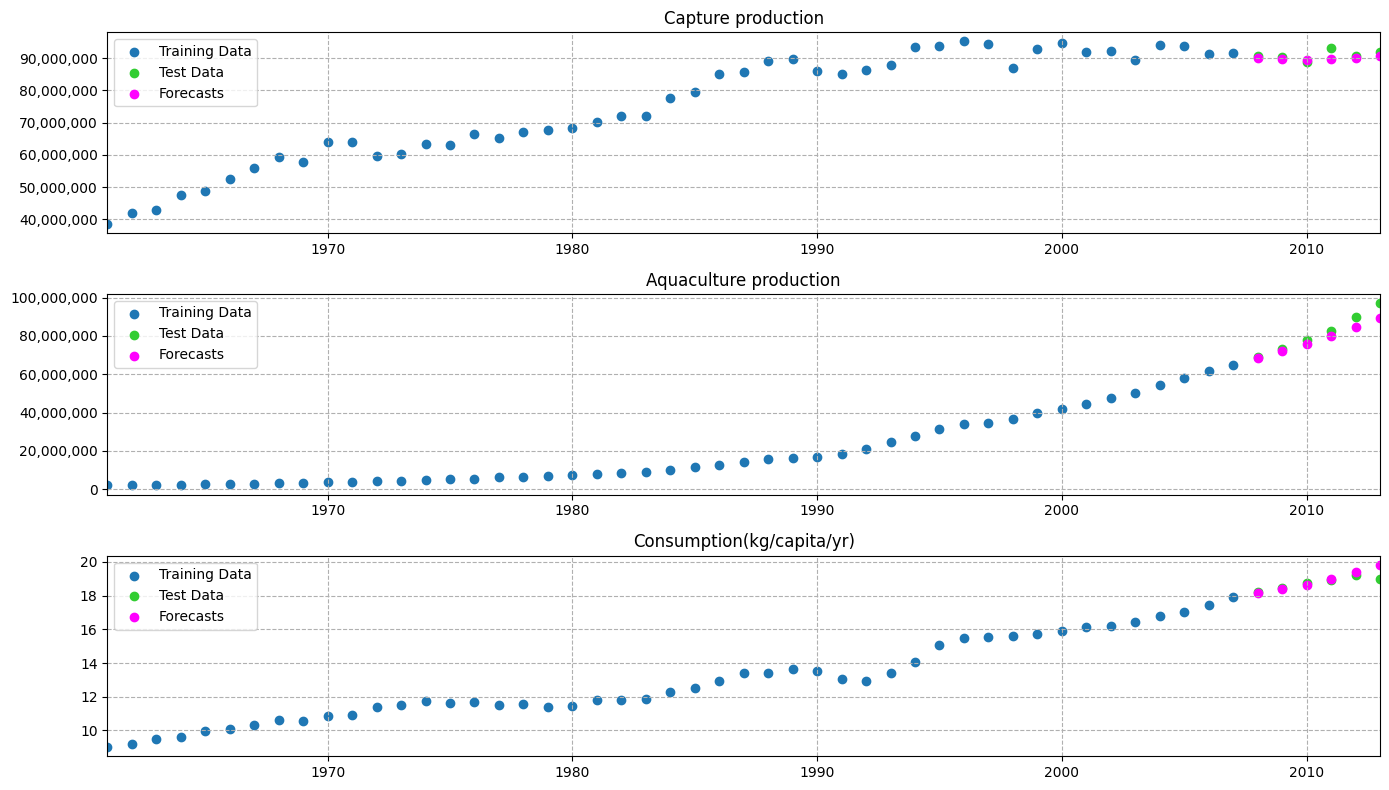

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Split the data into training and testing sets
train_size = int(len(ts_world) * 0.9)    # 90-10 split as in VAR
train, test = ts_world[:train_size], ts_world[train_size:]

# Fit VECM with chosen rank (1) and order (1 less than VAR-->2) on the training set
chosen_lag_order = 2
coint_rank = 1
model = VECM(train, k_ar_diff=chosen_lag_order, coint_rank=coint_rank)
results = model.fit()

# Forecasting for the length of the test set
forecast_steps = len(test)
forecast = results.predict(steps=forecast_steps)

# Convert forecast to DataFrame for easier comparison
forecast_index = pd.date_range(start=train.index[-1], periods=forecast_steps+1, freq='AS-JAN')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=test.columns)

# Calculate error metrics
mse = mean_squared_error(test, forecast_df)
nmse = mse / np.var(test)
r2 = r2_score(test, forecast_df)
mape = mean_absolute_percentage_error(test, forecast_df)

print("NMSE:\n", nmse)
print(f"R-squared: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

# Plot the original and forecasted values
def format_yticks(x, pos):
    return f'{x:,.0f}'

plt.figure(figsize=(14, 8))

# Plot for each variable
for i, col in enumerate(ts_world.columns):
    plt.subplot(len(ts_world.columns), 1, i+1)
    plt.scatter(train.index.year, train[col], label='Training Data')
    plt.scatter(test.index.year, test[col], label='Test Data', color='limegreen')
    plt.scatter(forecast_df.index.year, forecast_df[col], label='Forecasts', color='magenta', marker='o')

    plt.title(col)
    plt.legend()
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
    plt.grid(True, linestyle='--')
    # plt.gca().spines['top'].set_visible(False)
    # plt.gca().spines['right'].set_visible(False)
    plt.xlim((ts_world.index.year[0], forecast_df.index.year[-1]))

plt.tight_layout()
plt.show()

* Forecast future values

In [ ]:
model = VECM(ts_world, k_ar_diff=2, coint_rank=1)
results = model.fit()

# print(results.summary())

In [ ]:
# forecast future values
n_forecast = 17  # Number of future points to forecast
forecast = results.predict(steps=n_forecast)

# Create a forecast dataframe
forecast_index = pd.date_range(start=ts_world.index[-1], periods=n_forecast + 1, freq='AS-JAN')[1:]
VECM_forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=ts_world.columns)

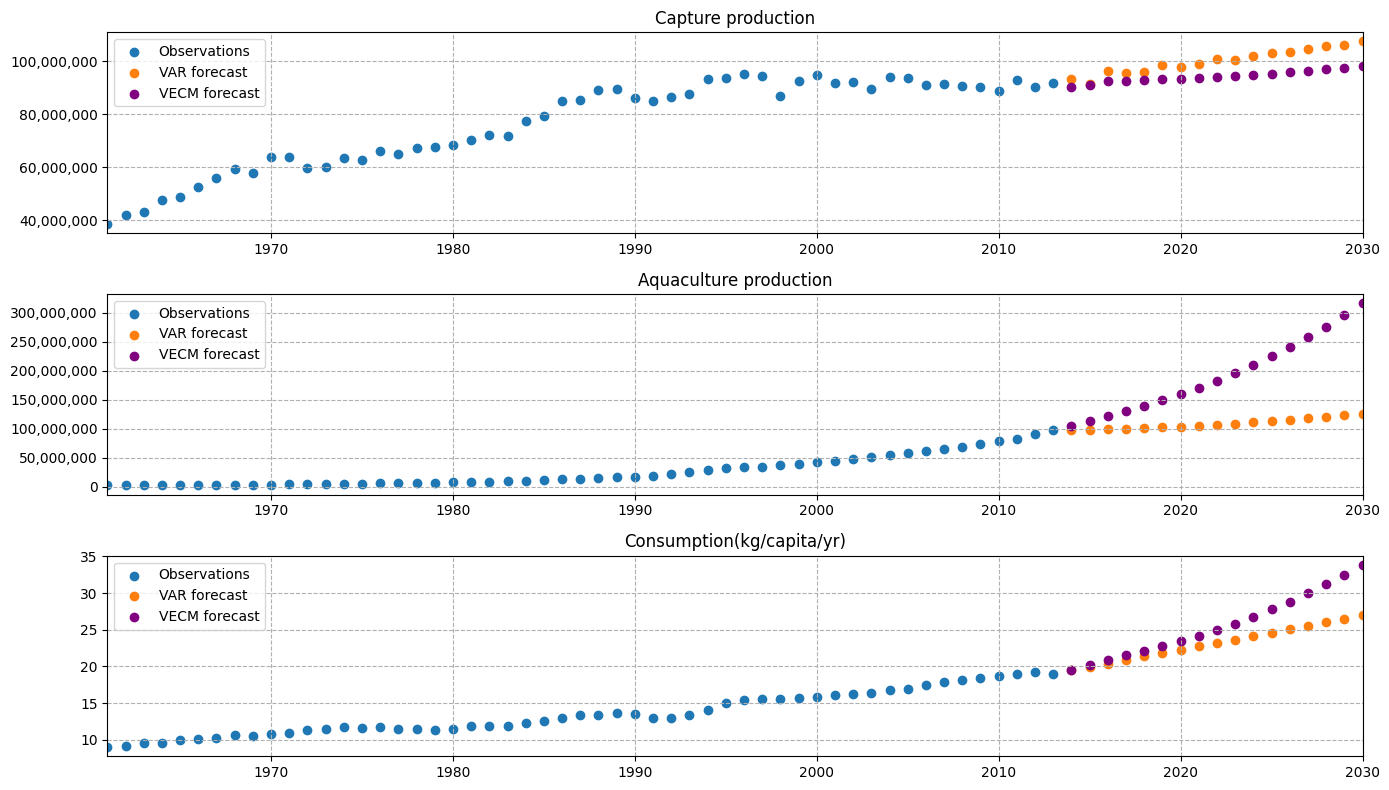

In [ ]:
# Plot forecasts of both models
plt.figure(figsize=(14, 8))

# Plot Capture production
plt.subplot(3, 1, 1)
plt.scatter(ts_world.index.year, ts_world['Capture production'], label='Observations')
plt.scatter(VAR_forecast_df.index.year, VAR_forecast_df['Capture production'], label='VAR forecast')
plt.scatter(VECM_forecast_df.index.year, VECM_forecast_df['Capture production'], color='purple', label='VECM forecast')
plt.title('Capture production')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
plt.grid(True, linestyle='--')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.xlim((ts_world.index.year[0], VECM_forecast_df.index.year[-1]))

# Plot Aquaculture production
plt.subplot(3, 1, 2)
plt.scatter(ts_world.index.year, ts_world['Aquaculture production'], label='Observations')
plt.scatter(VAR_forecast_df.index.year, VAR_forecast_df['Aquaculture production'], label='VAR forecast')
plt.scatter(VECM_forecast_df.index.year, VECM_forecast_df['Aquaculture production'], color='purple', label='VECM forecast')
plt.title('Aquaculture production')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))
plt.grid(True, linestyle='--')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.xlim((ts_world.index.year[0], VECM_forecast_df.index.year[-1]))

# Plot Consumption(kg/capita/yr)
plt.subplot(3, 1, 3)
plt.scatter(ts_world.index.year, ts_world['Consumption(kg/capita/yr)'], label='Observations')
plt.scatter(VAR_forecast_df.index.year, VAR_forecast_df['Consumption(kg/capita/yr)'], label='VAR forecast')
plt.scatter(VECM_forecast_df.index.year, VECM_forecast_df['Consumption(kg/capita/yr)'], color='purple', label='VECM forecast')
plt.title('Consumption(kg/capita/yr)')
plt.legend()
plt.grid(True, linestyle='--')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
plt.xlim((ts_world.index.year[0], VECM_forecast_df.index.year[-1]))

plt.tight_layout()
plt.show()

##🔹Automating the ML pipeline

In [ ]:
# features (input variables)
X = df.loc[1974:2013, ['Capture production', 'Aquaculture production', 'Consumption(kg/capita/yr)']]

# target (output variable)
y = df.loc[1974:2013, 'sustainable']

* Setting the pipeline and the hyperparameter grid for each model

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# estimators to explore and their pipelines
models = {
    "Linear Regression": Pipeline(steps=[
        ("poly", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("linear", LinearRegression())
    ]),
    "Bayesian Ridge Regression": Pipeline(steps=[
        ("poly", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("bayesian", BayesianRidge())
    ]),
    "SVR": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("svr", SVR())
    ]),
    "Random Forest": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("rf", RandomForestRegressor())
    ]),
}

# hyperparameter grid for each model
param_grids = {
    "Linear Regression": {
        "poly__degree": [1, 2, 3, 4],
        "linear__fit_intercept": [True, False],
    },
    "Bayesian Ridge Regression": {
        "poly__degree": [1, 2, 3, 4, 5],
    },
    "SVR": {
        "svr__C": [0.1, 1.0, 10.0],
        "svr__epsilon": [0.01, 0.1, 1.0],
        "svr__kernel": ['linear', 'rbf', 'poly']
    },
    "Random Forest": {
        "rf__n_estimators": [50, 100, 200, 500],
        "rf__max_depth": [None, 10, 20, 30]
    }
}

* Training and evaluating the models

-----Linear Regression------------------------------ 
  Best hyperparameters --> {'linear__fit_intercept': True, 'poly__degree': 2}
  Best hyperparameters mean CV score --> 0.92379
Performance on test set: 
   R² score --> 0.88182
   RMSE --> 2.37126


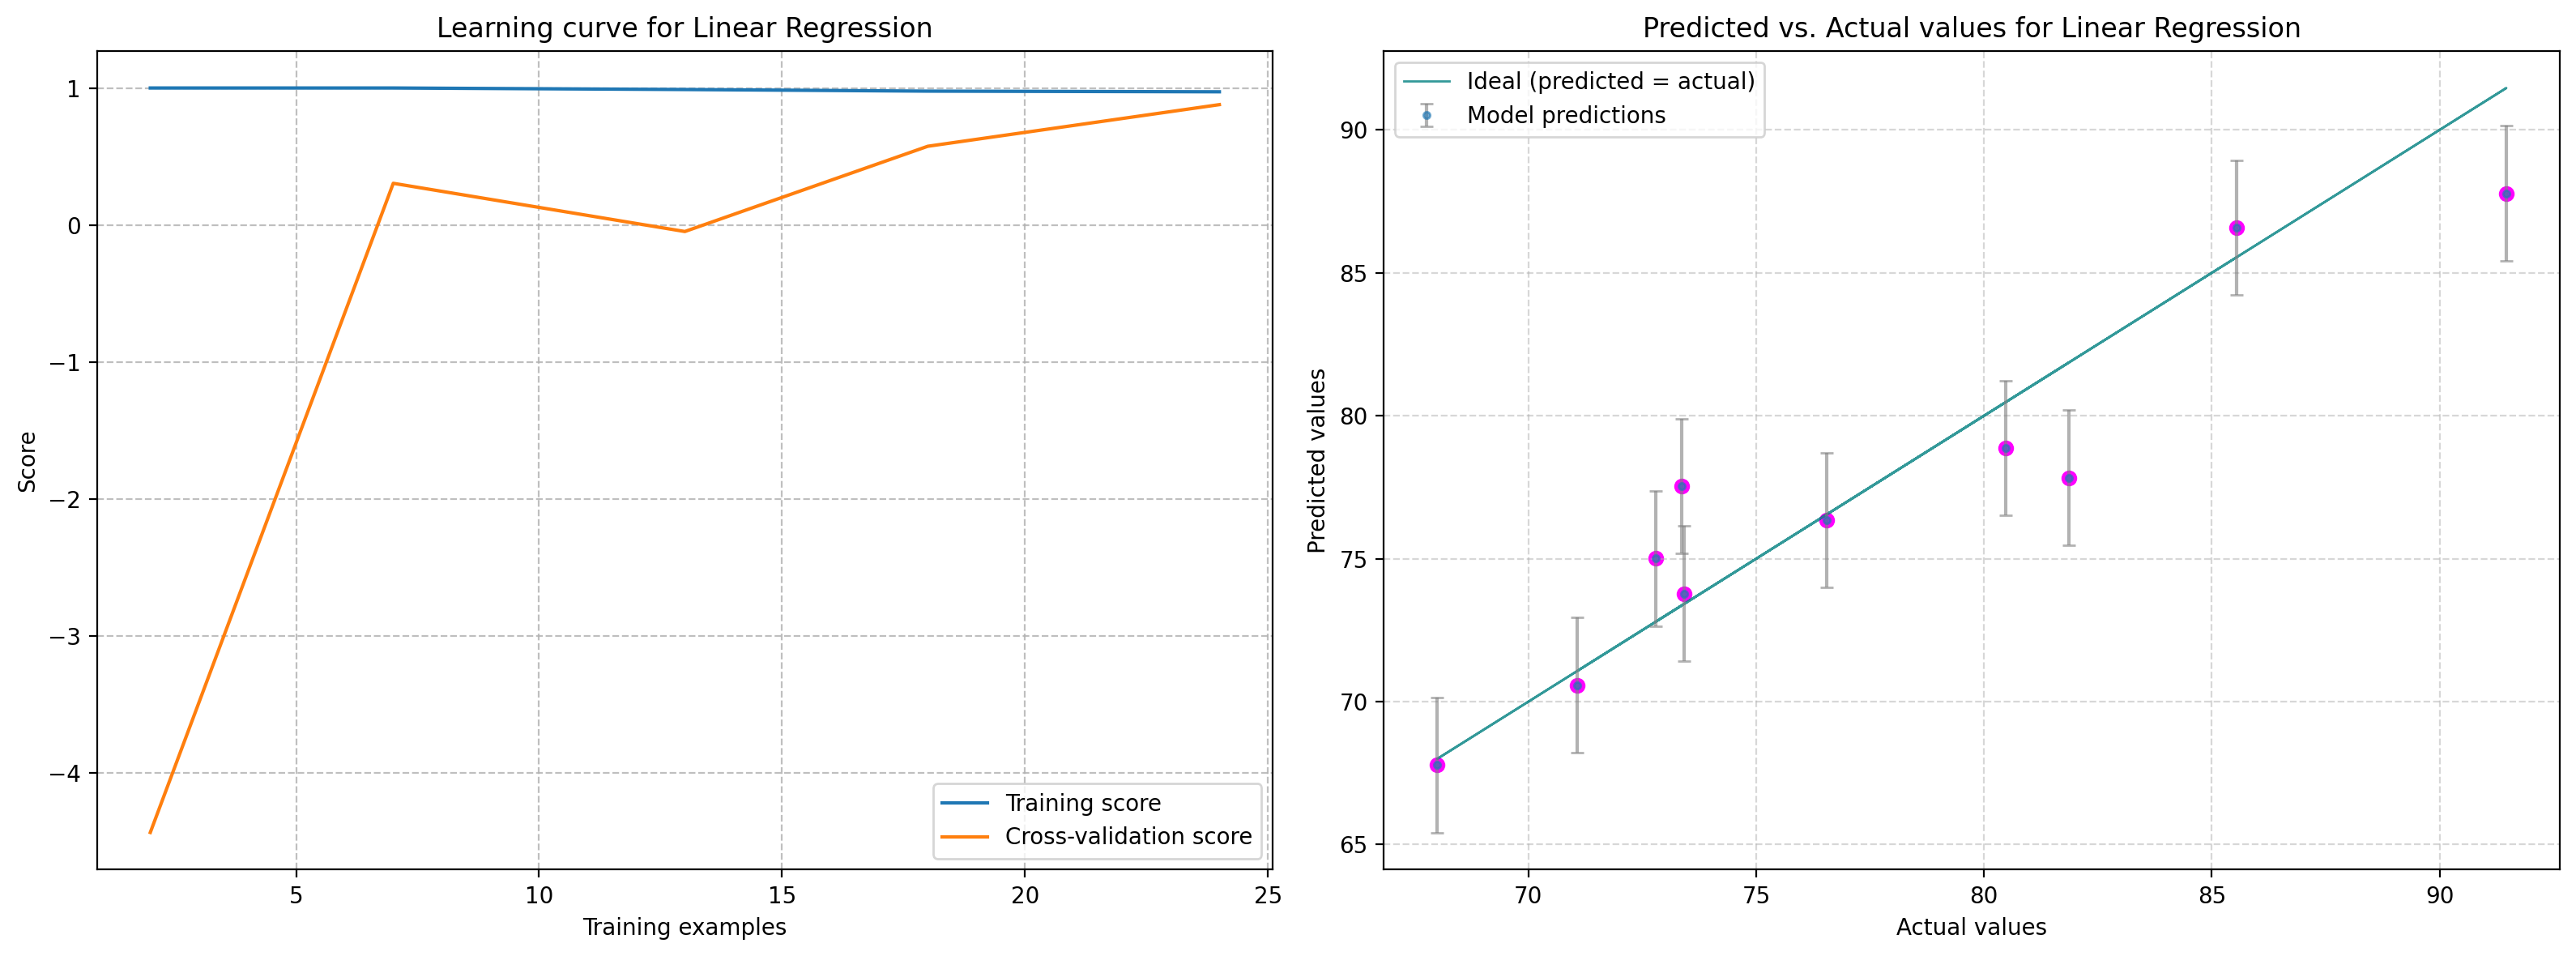

-----Bayesian Ridge Regression------------------------------ 
  Best hyperparameters --> {'poly__degree': 4}
  Best hyperparameters mean CV score --> 0.92802
Performance on test set: 
   R² score --> 0.86311
   RMSE --> 2.55205


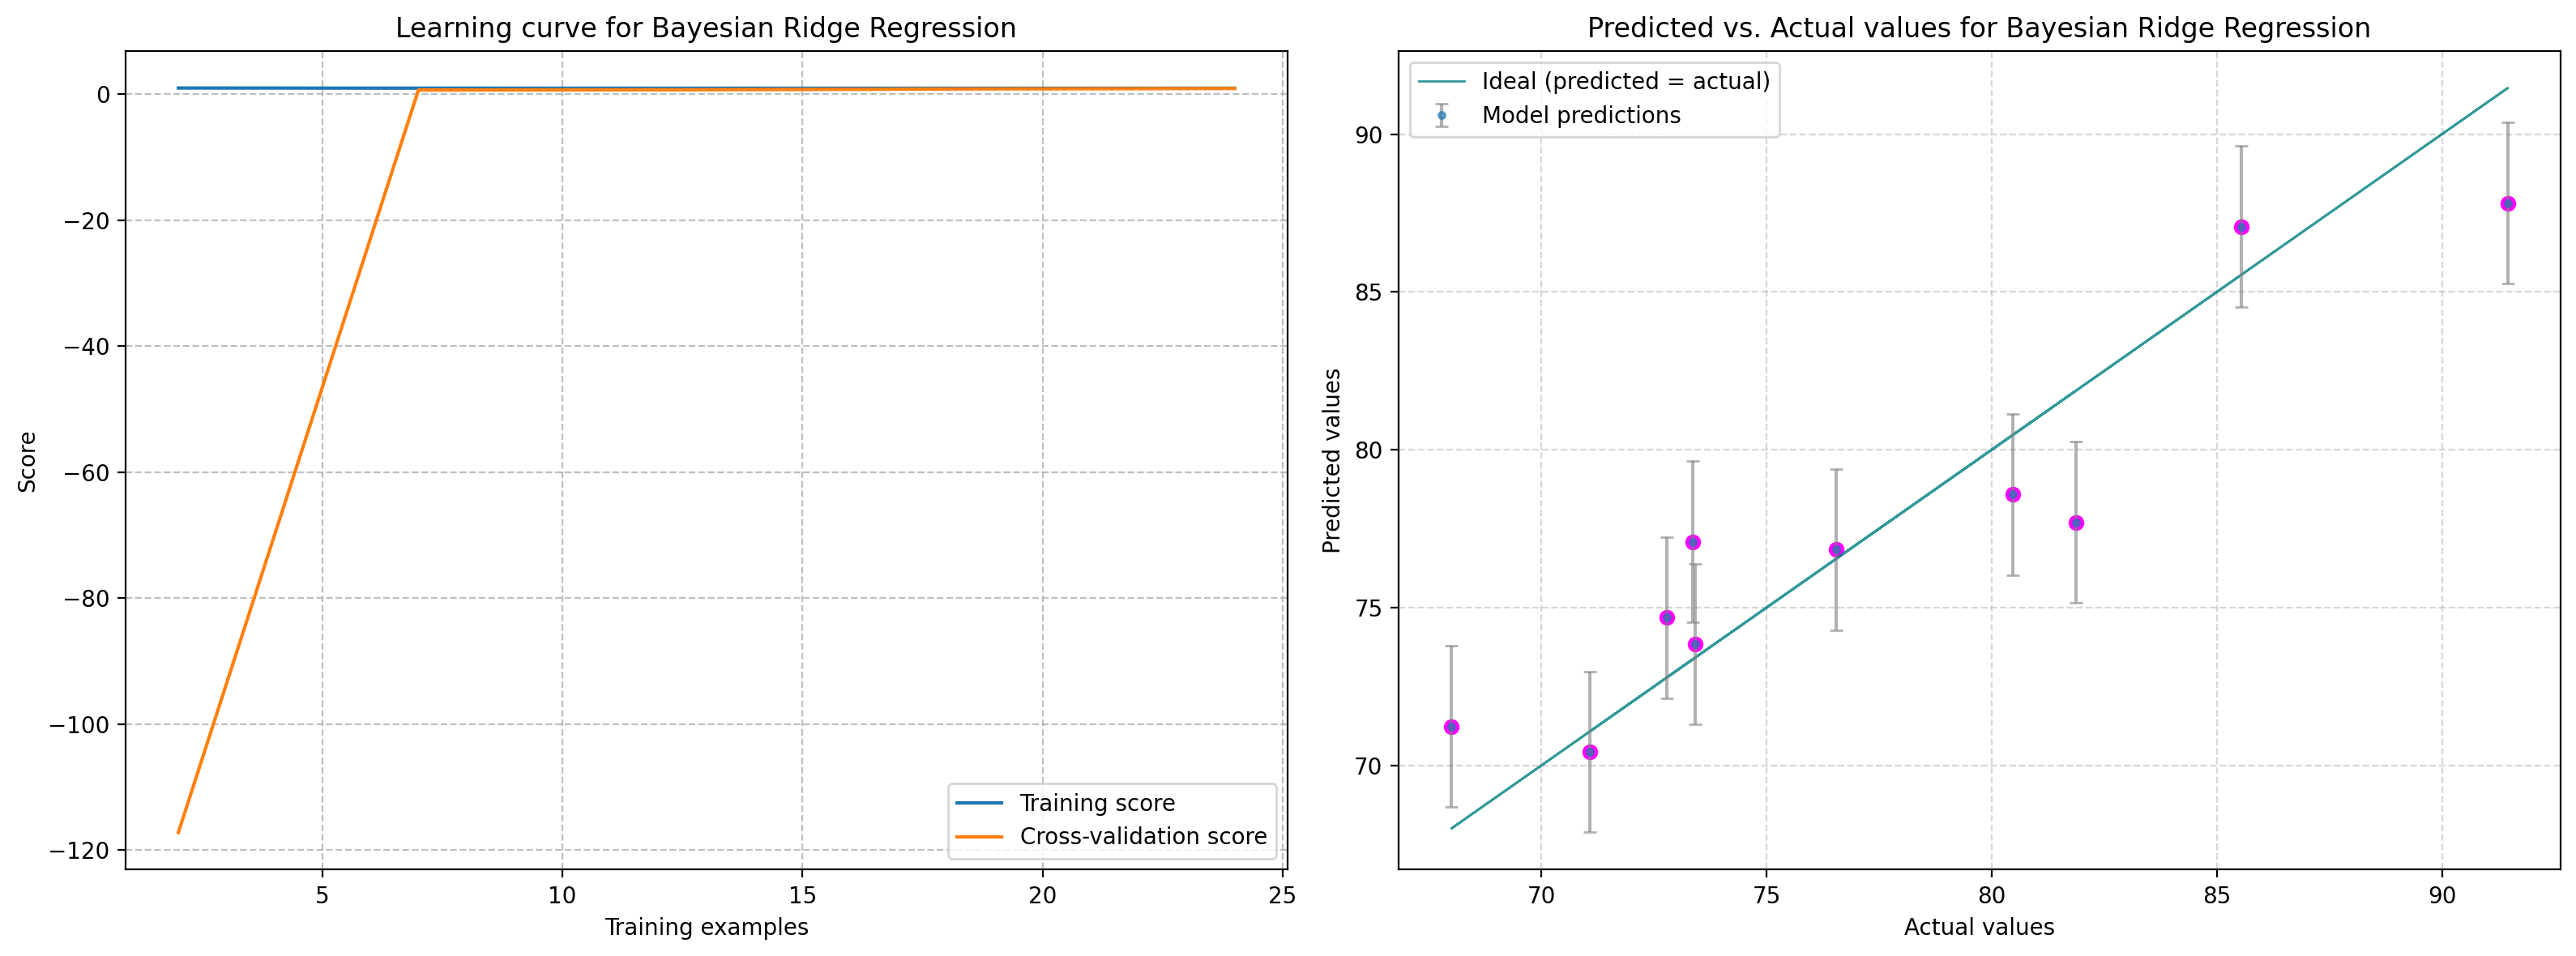

-----SVR------------------------------ 
  Best hyperparameters --> {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__kernel': 'rbf'}
  Best hyperparameters mean CV score --> 0.93411
Performance on test set: 
   R² score --> 0.87047
   RMSE --> 2.48248


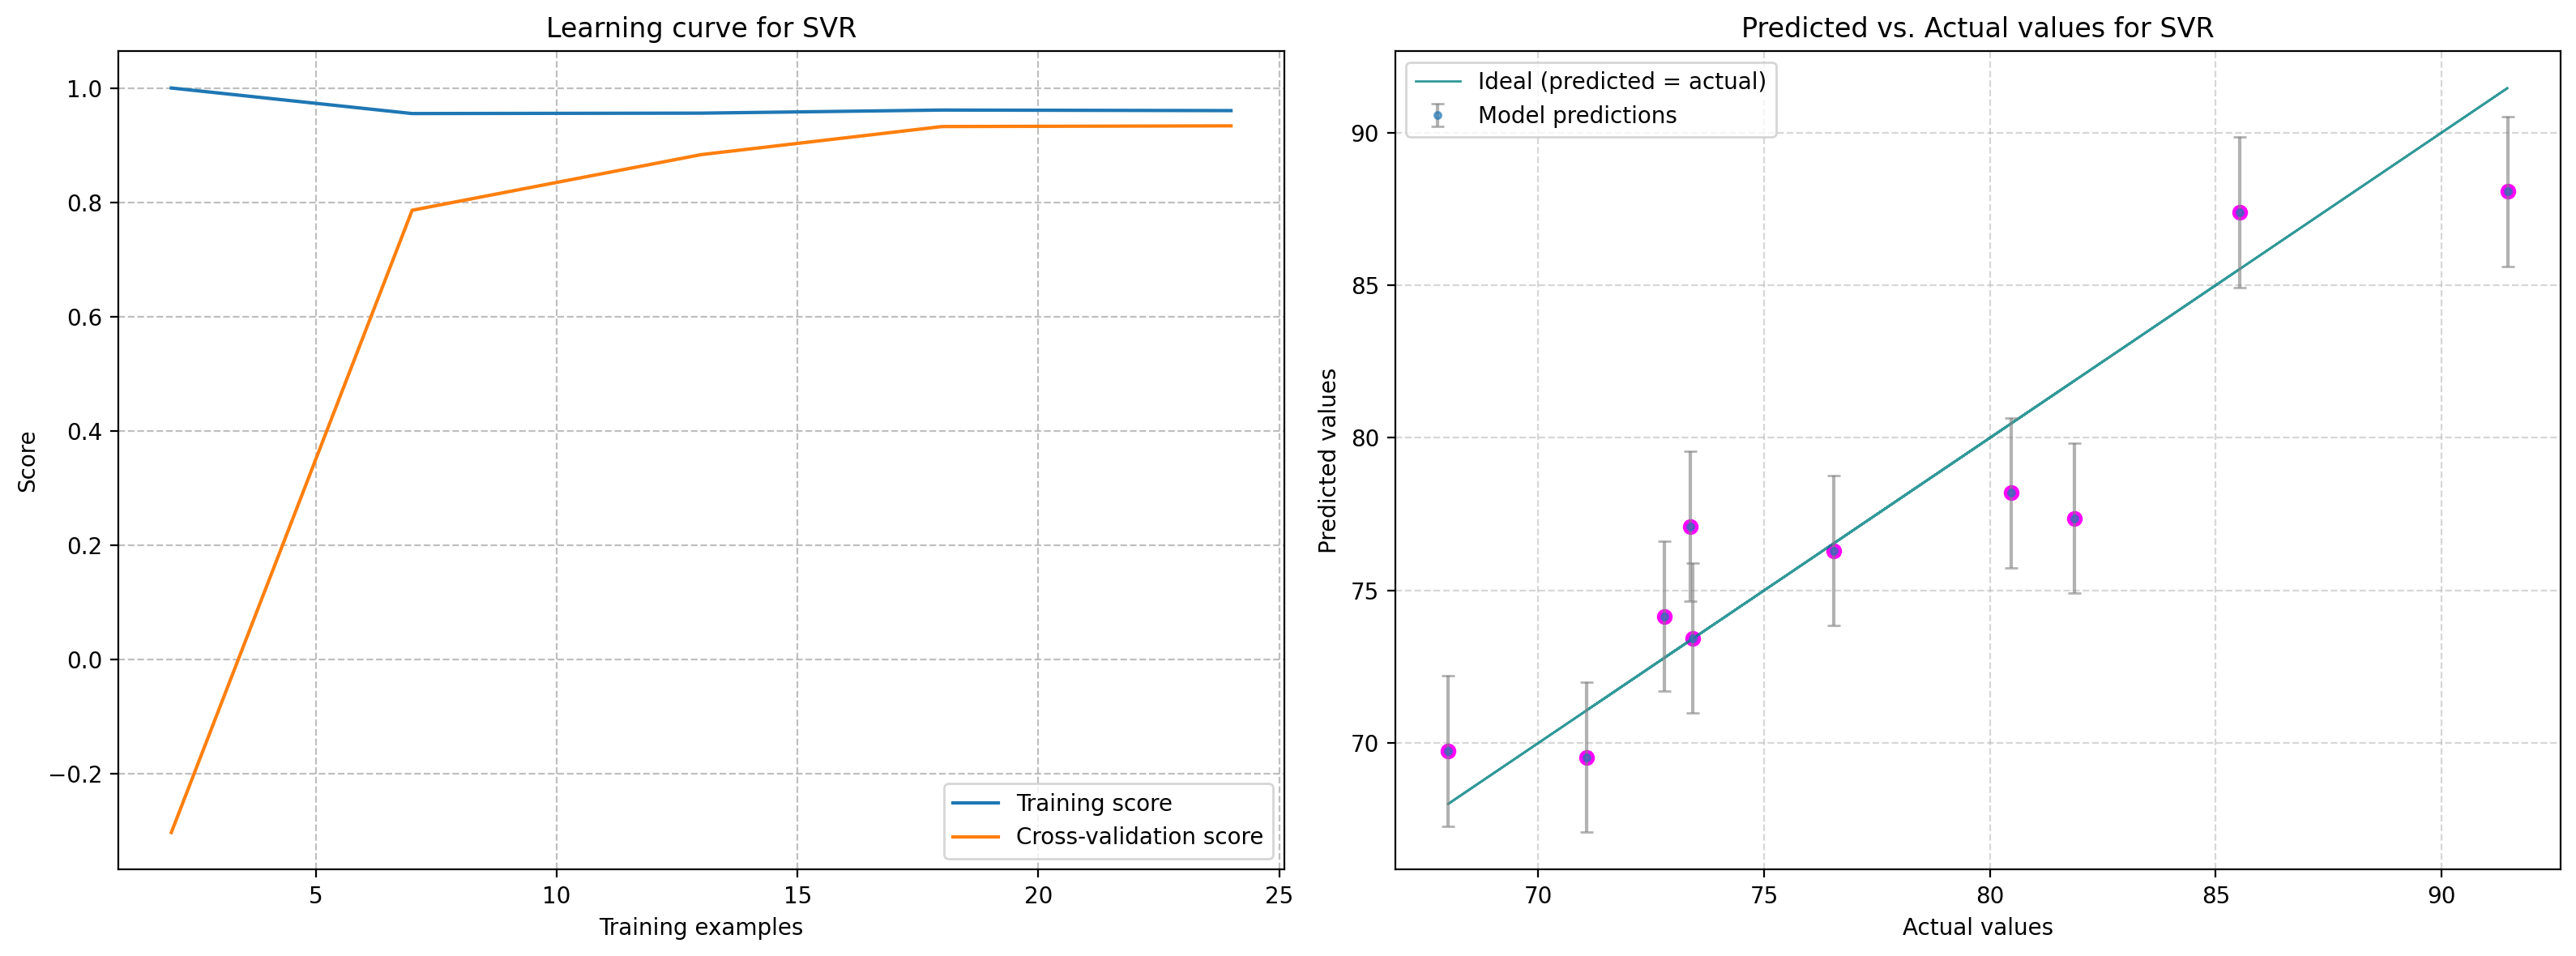

-----Random Forest------------------------------ 
  Best hyperparameters --> {'rf__max_depth': None, 'rf__n_estimators': 50}
  Best hyperparameters mean CV score --> 0.92122
Performance on test set: 
   R² score --> 0.85532
   RMSE --> 2.62364


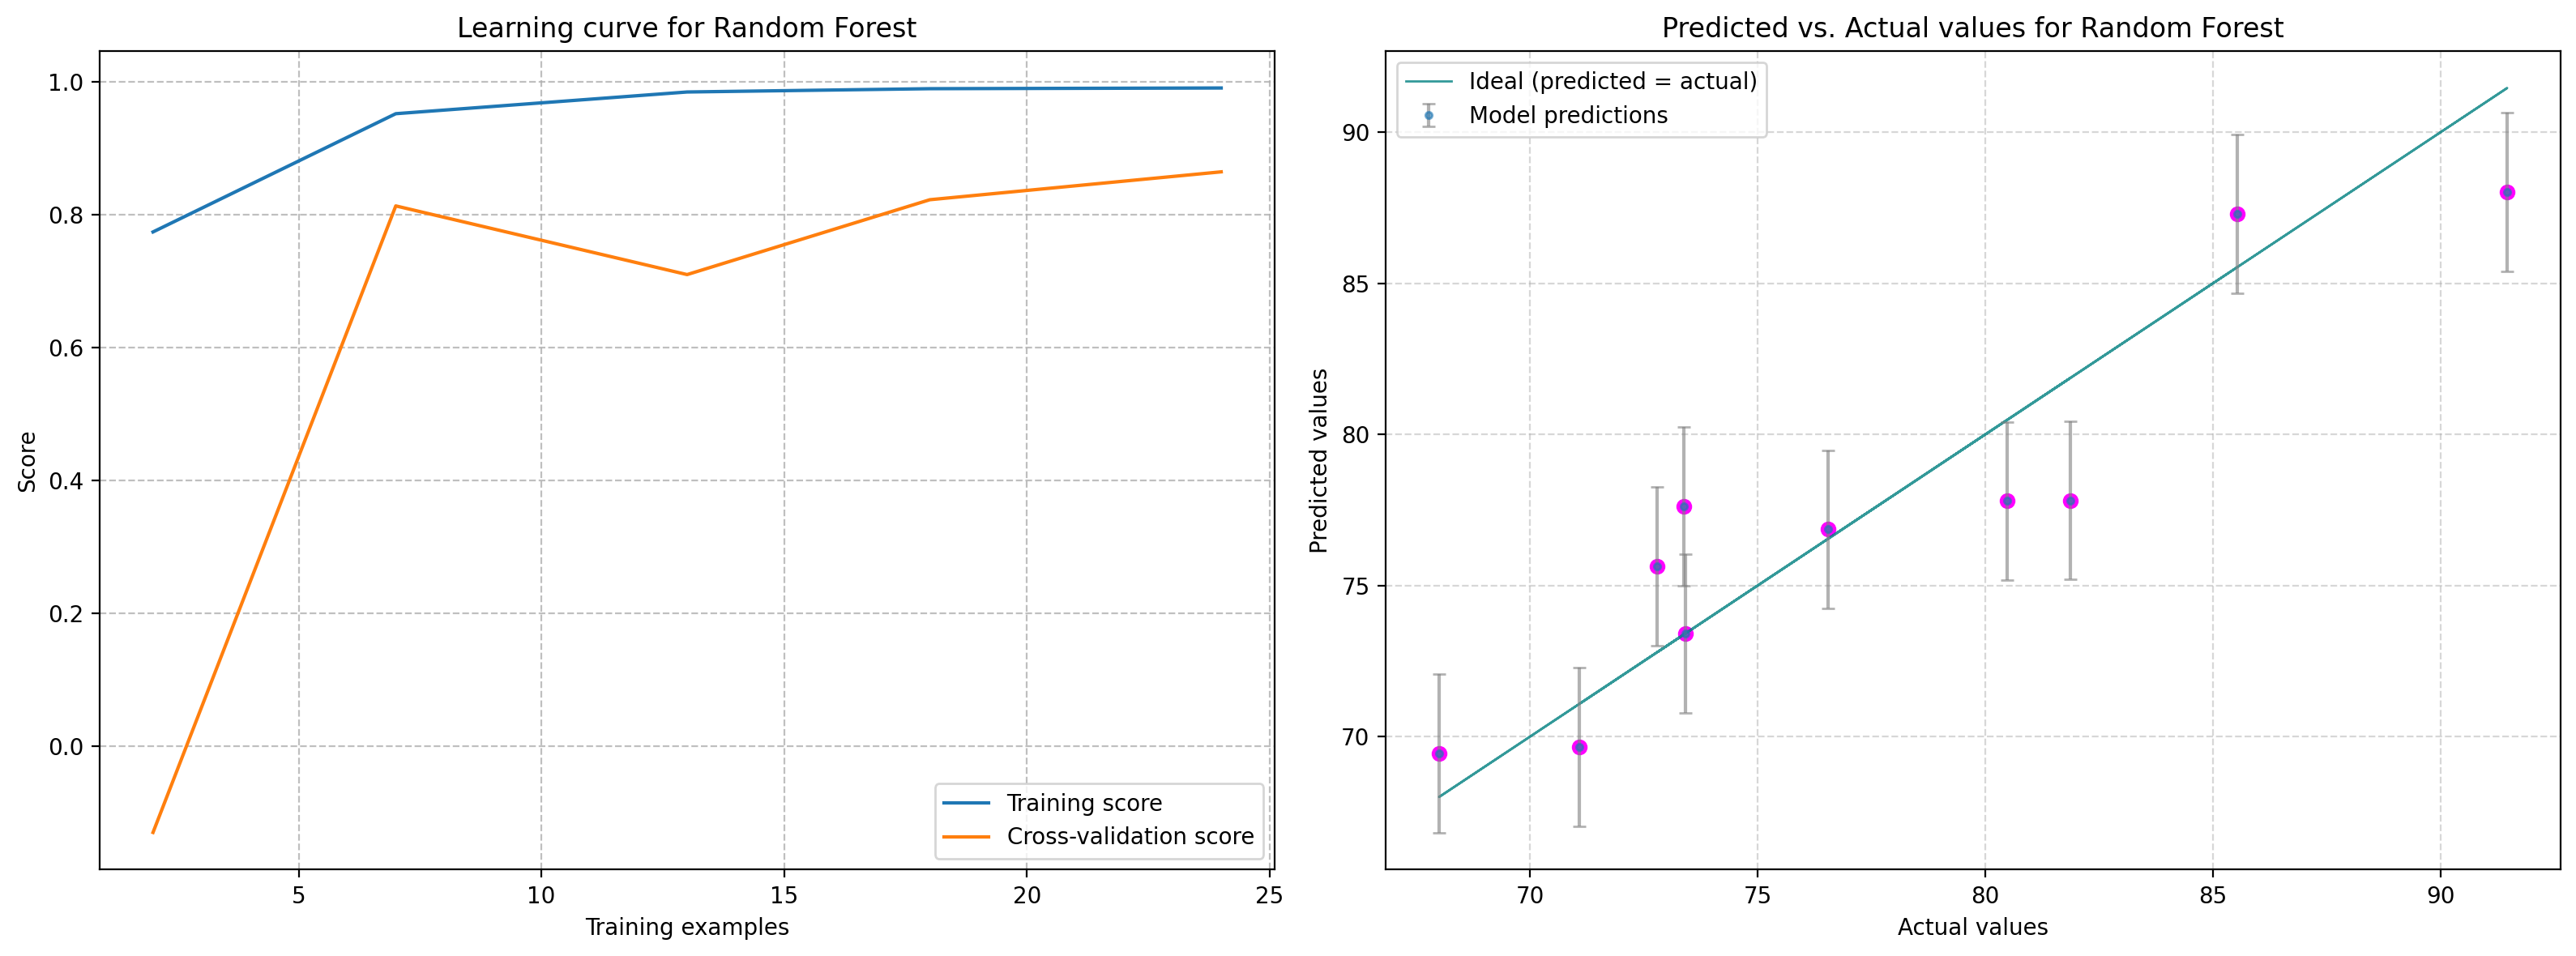

In [ ]:
# TRAIN-TEST SPLITTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# CROSS-VALIDATION SETTINGS
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_params = {}
trained_models = {}

# TRAINING THE MODELS
for model_name, pipeline in models.items():
  param_grid = param_grids[model_name]
  grid_search = GridSearchCV(pipeline, param_grid)
  grid_search.fit(X_train, y_train)

  ## SAVE AND PRINT BEST MODEL PARAMETERS
  best_params[model_name] = grid_search.best_params_
  print(f"{'-'*5}{model_name}{'-'*30} \n  Best hyperparameters --> {grid_search.best_params_}\n\
  Best hyperparameters mean CV score --> {round(grid_search.best_score_, 5)}")

  ## PERFORMANCE EVALUATION ON THE TEST SET
  y_pred = grid_search.best_estimator_.predict(X_test)

  r2 = round(r2_score(y_test, y_pred), 5)
  rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 5)
  print(f"Performance on test set: \n   R² score --> {r2}\n   RMSE --> {rmse}")

  ## MODEL PERFORMANCE PLOTS
  fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

  ### learning curve plot
  train_sizes, train_scores, val_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=kf)
  train_scores_mean = np.mean(train_scores, axis=1)
  val_scores_mean = np.mean(val_scores, axis=1)

  axs[0].plot(train_sizes, train_scores_mean, label='Training score')
  axs[0].plot(train_sizes, val_scores_mean, label='Cross-validation score')
  axs[0].set_xlabel('Training examples')
  axs[0].set_ylabel('Score')
  axs[0].set_title(f'Learning curve for {model_name}')
  axs[0].legend(loc='best')
  axs[0].grid(True, linestyle='--', alpha=0.8)

  ### prediction vs. actual plot with error bars
  error_margin = np.std(y_pred - y_test)

  axs[1].plot(y_test, y_test, linewidth=1, color='teal', label='Ideal (predicted = actual)', alpha=0.8)
  axs[1].scatter(y_test, y_pred, marker='o', color='magenta')
  axs[1].errorbar(y_test, y_pred, yerr=error_margin, fmt='.', ecolor='grey',\
                  capsize=3, label='Model predictions', alpha=0.6)
  axs[1].set_xlabel('Actual values')
  axs[1].set_ylabel('Predicted values')
  axs[1].set_title(f'Predicted vs. Actual values for {model_name}')
  axs[1].legend(loc='best')
  axs[1].grid(True, linestyle='--', alpha=0.5)

  plt.tight_layout()
  plt.show()

  # SAVE MODEL
  trained_models[model_name] = grid_search.best_estimator_

* Training and evaluating the models with cross-validation on the whole dataset (WRONG)

In [ ]:
# from sklearn.utils import shuffle
# from sklearn.model_selection import learning_curve
# from sklearn.metrics import mean_squared_error, r2_score

# # RANDOMIZING THE TEMPORALLY ORDERED DATAPOINTS
# X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# # CROSS-VALIDATION SETTINGS
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# best_params = {}

# # TRAINING THE MODELS
# for model_name, pipeline in models.items():
#     param_grid = param_grids[model_name]
#     grid_search = GridSearchCV(pipeline, param_grid, cv=kf)
#     grid_search.fit(X_shuffled, y_shuffled)

#     ## SAVE AND PRINT BEST MODEL PARAMETERS
#     best_params[model_name] = grid_search.best_params_
#     print(f"{model_name}: \n  Best parameters --> {grid_search.best_params_}\n\
#     Best CV score --> {grid_search.best_score_}\n")

#     ## MODEL PERFORMANCE METRICS PLOTS
#     fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

#     ### learning curve plot
#     train_sizes, train_scores, val_scores = learning_curve(grid_search.best_estimator_, X_shuffled, y_shuffled, cv=kf)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     val_scores_mean = np.mean(val_scores, axis=1)

#     axs[0].plot(train_sizes, train_scores_mean, label='Training score', marker='o')
#     axs[0].plot(train_sizes, val_scores_mean, label='Cross-validation score', marker='o')
#     axs[0].set_xlabel('Training examples')
#     axs[0].set_ylabel('Score')
#     axs[0].set_title(f'Learning curve for {model_name}')
#     axs[0].legend(loc='best')
#     axs[0].grid(True, linestyle='--', alpha=0.8)

#     ### prediction vs. actual plot with error bars
#     y_pred = grid_search.best_estimator_.predict(X_shuffled)
#     error_margin = np.std(y_pred - y_shuffled)

#     axs[1].plot(y_shuffled, y_shuffled, linewidth=1, color='teal', label='Ideal (predicted = actual)', alpha=0.8)
#     axs[1].scatter(y_shuffled, y_pred, marker='o', color='teal')
#     axs[1].errorbar(y_shuffled, y_pred, yerr=error_margin, fmt='.', ecolor='grey',
#                     capsize=3, label='Model predictions', alpha=0.6)
#     axs[1].set_xlabel('Actual values')
#     axs[1].set_ylabel('Predicted values')
#     axs[1].set_title(f'Predicted vs. Actual values for {model_name}')
#     axs[1].legend(loc='best')
#     axs[1].grid(True, linestyle='--', alpha=0.5)

#     plt.tight_layout()
#     plt.show()


Refitting each model on the whole X, y dataset (optional)

In [ ]:
# final_models = {}

# for model_name, pipeline in models.items():
#   pipeline.set_params(**best_params[model_name])
#   pipeline.fit(X, y)
#   final_models[model_name] = pipeline

In [ ]:
# # check if correct hyperparameters are passed in the pipelines
# for model_name, pipeline in final_models.items():
#   print(model_name, pipeline.get_params())

##Predictions

In [ ]:
# features of new data points
X_past = df.loc[1961:1973, ['Capture production', 'Aquaculture production', 'Consumption(kg/capita/yr)']]
X_new_VECM = VECM_forecast_df.copy()
X_new_VECM.index = X_new_VECM.index.year
X_new_VECM = X_new_VECM.loc[2018:]
X_new_VECM.index.name = 'Year'
X_new = pd.concat([X_past, X_new_VECM])
X_new.shape

(26, 3)

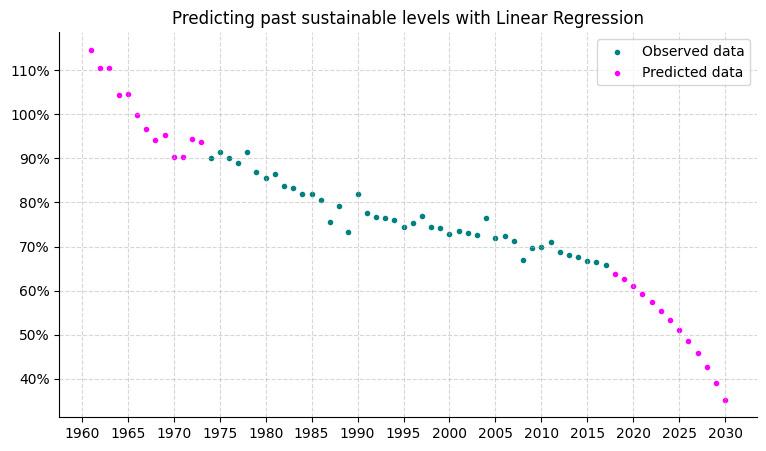

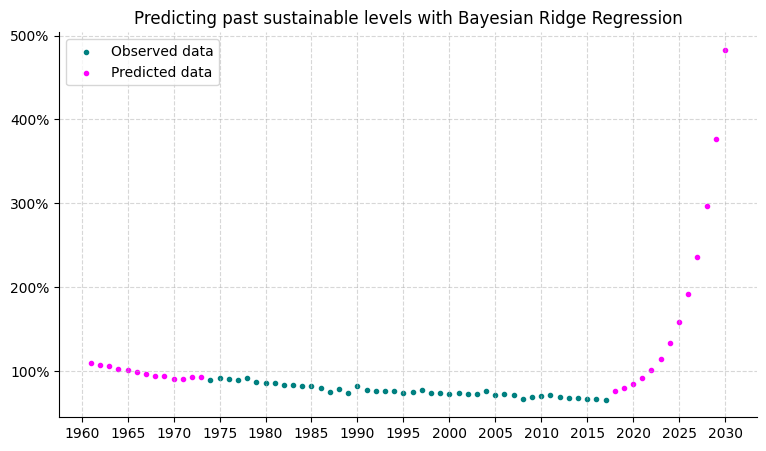

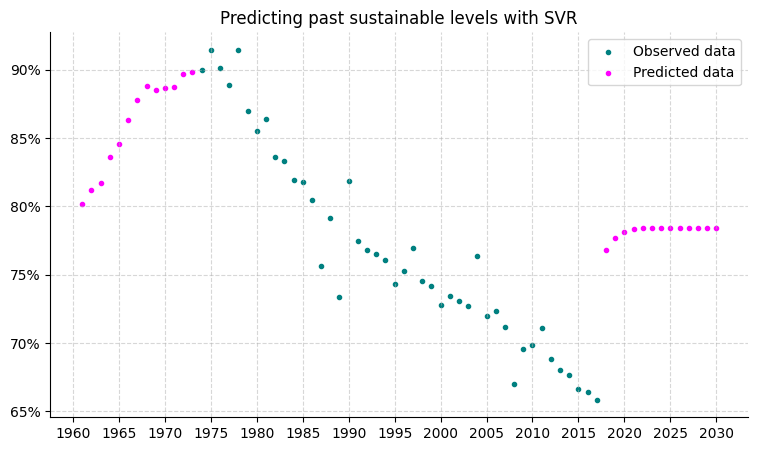

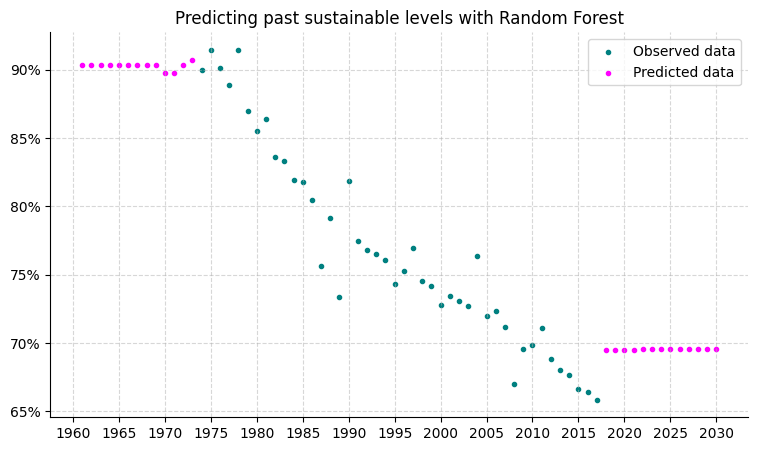

In [ ]:
# each model with its predictions will be saved in a dict
predictions = {}

for model_name, model in trained_models.items():
  predictions[model_name] = model.predict(X_new)

# plotting the results
for model_name, y_pred in predictions.items():
  plt.figure(figsize=(9, 5))
  plt.title(f"Predicting sustainable levels with {model_name}")

  plt.scatter(df5_world['Year'], df5_world['sustainable'], color='teal', label='Observed data', marker='.')
  plt.scatter(X_new.index, y_pred, color='magenta', label='Predicted data', marker='.')

  plt.legend()
  plt.xticks(np.arange(1960, 2035, step=5))
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
  plt.show()

* Clipping points that exceed 100%

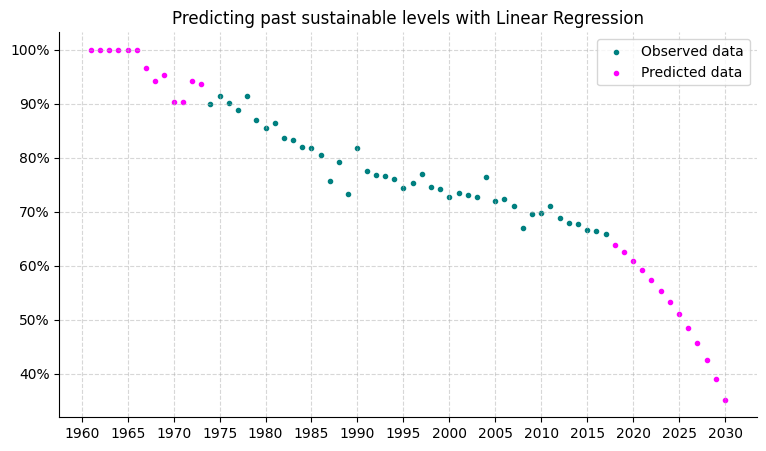

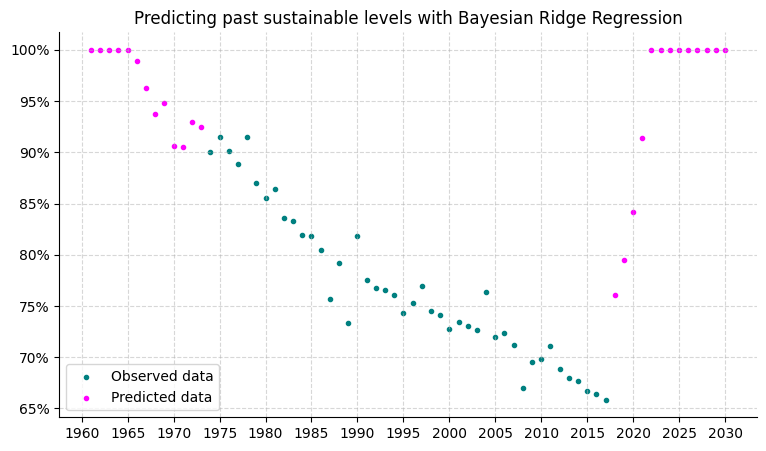

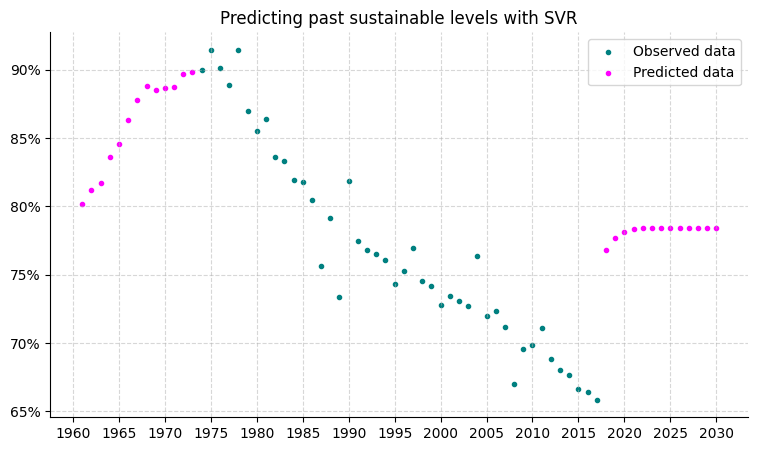

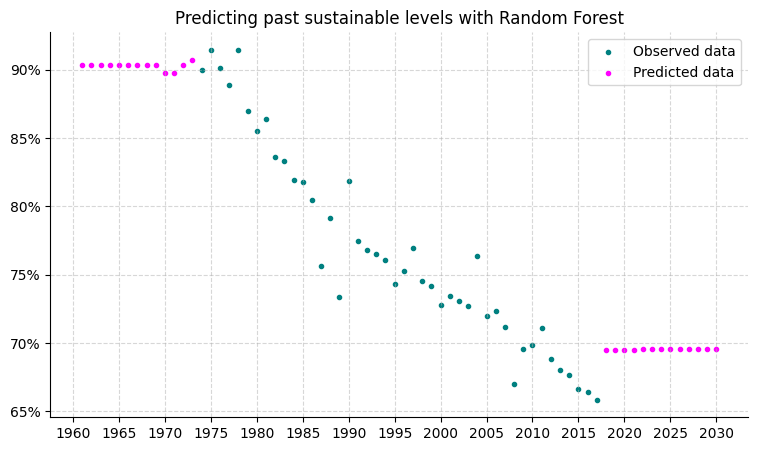

In [ ]:
# Clip the predictions in the dictionary
for model_name, y_pred in predictions.items():
    # Clip predictions to ensure they do not exceed 100%
    predictions[model_name] = np.clip(y_pred, a_min=0, a_max=100)

# Plotting the results
for model_name, y_pred_clipped in predictions.items():
    plt.figure(figsize=(9, 5))
    plt.title(f"Predicting past sustainable levels with {model_name}")

    plt.scatter(df5_world['Year'], df5_world['sustainable'], color='teal', label='Observed data', marker='.')
    plt.scatter(X_new.index, y_pred_clipped, color='magenta', label='Predicted data', marker='.')

    plt.legend()
    plt.xticks(np.arange(1960, 2035, step=5))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    plt.show()

##🔹Logistic transformation to bound y in [0,1].

* The models were trained again on logistic-transformed training data, in an attempt to mitigate predicted points that exceed 100%.

In [ ]:
def logistic_transform(y):
  return 1 / (1 + np.exp(-y))

# Inverse logistic function for back-transformation
def inverse_logistic_transform(y):
  return -np.log((1 / y) - 1)

* Training using the transformed y_train

-----Linear Regression------------------------------ 
  Best hyperparameters --> {'linear__fit_intercept': True, 'poly__degree': 2}
    Best hyperparameters mean CV score --> 0.92172
Performance on test set: 
   R² score --> 0.88192
   RMSE --> 2.37025


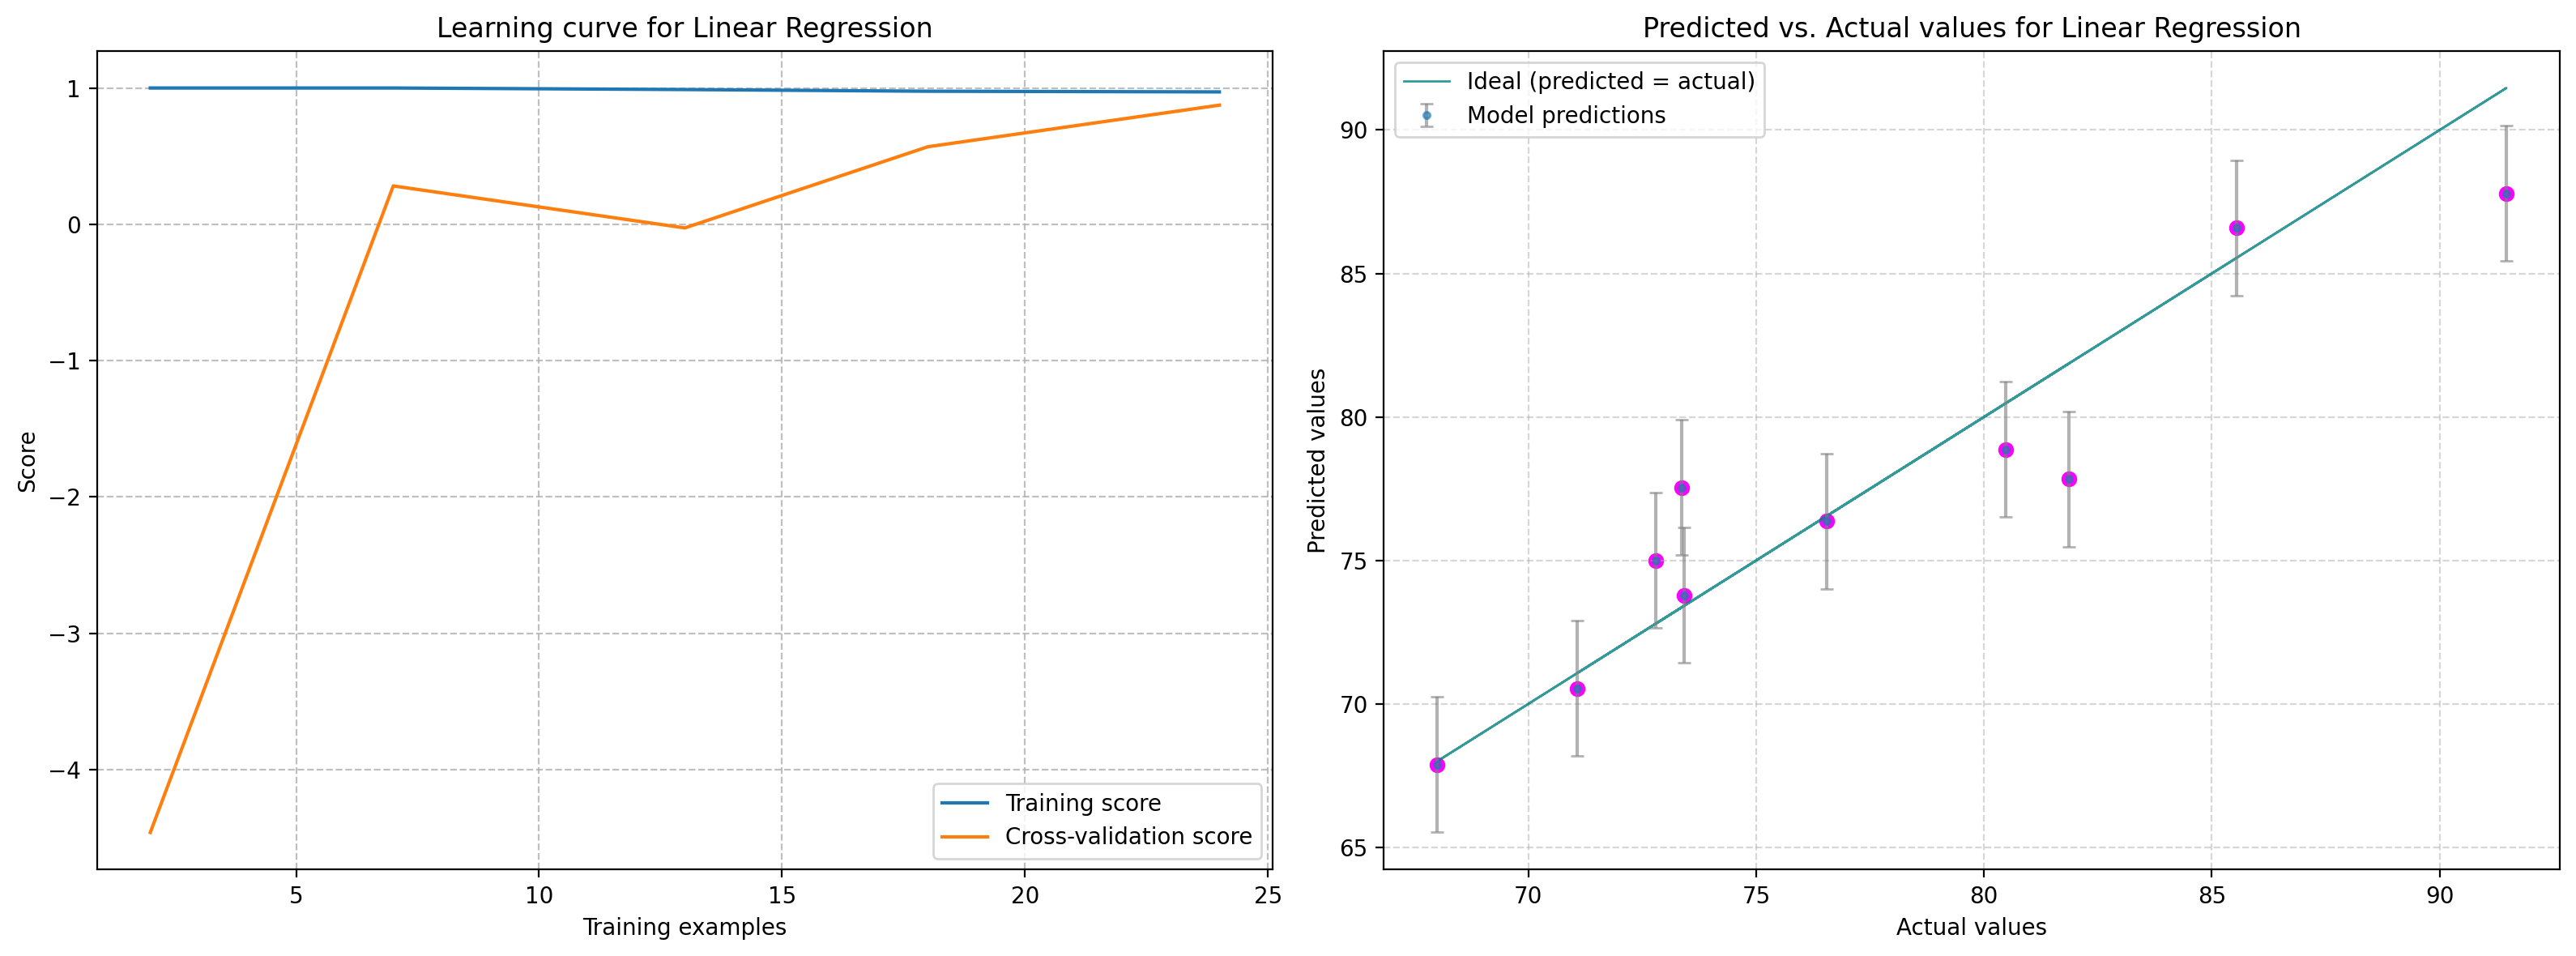

-----Bayesian Ridge Regression------------------------------ 
  Best hyperparameters --> {'poly__degree': 3}
    Best hyperparameters mean CV score --> 0.93089
Performance on test set: 
   R² score --> 0.87119
   RMSE --> 2.47556


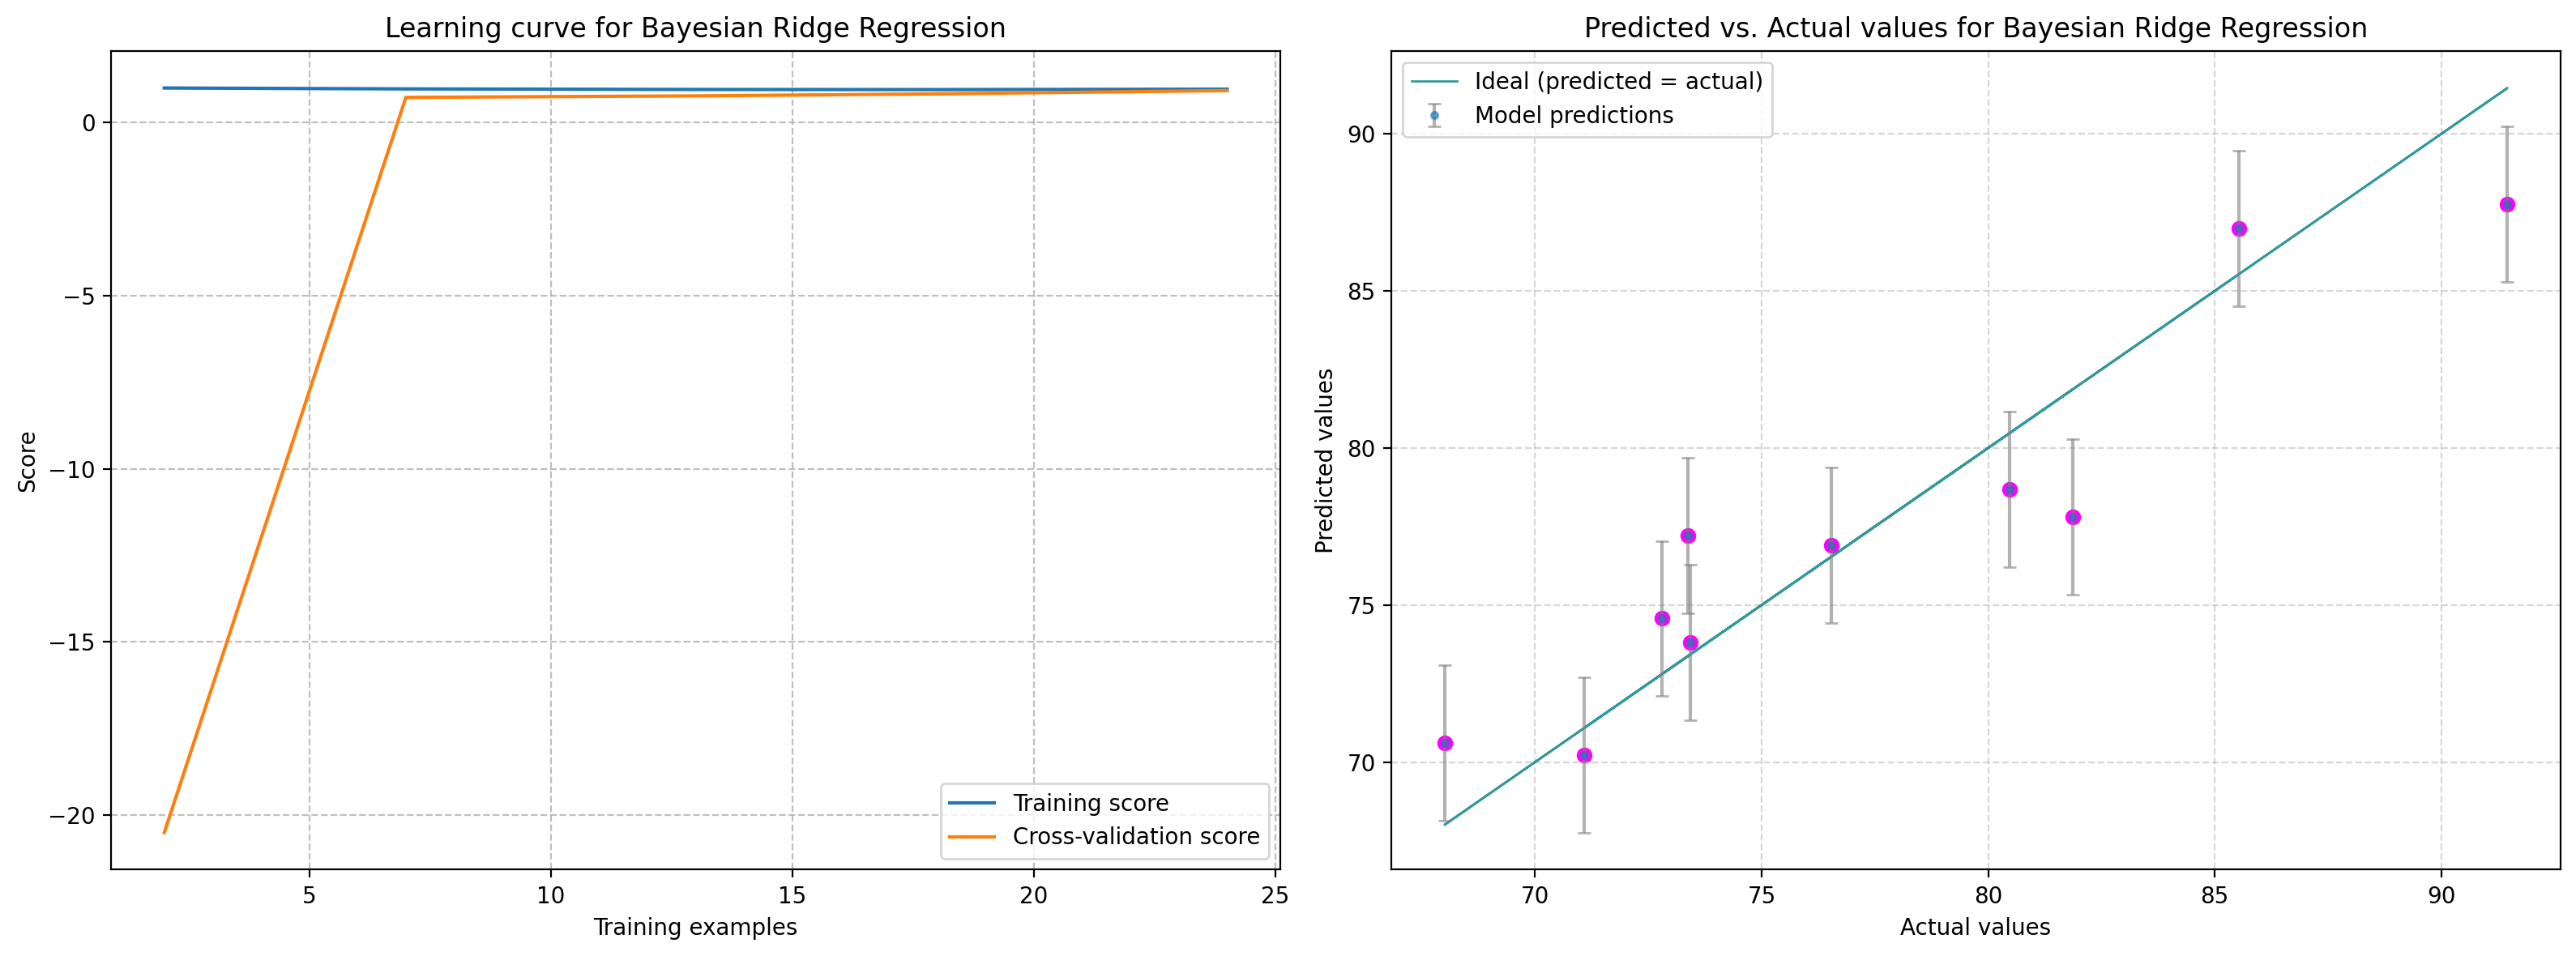

-----SVR------------------------------ 
  Best hyperparameters --> {'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
    Best hyperparameters mean CV score --> 0.79698
Performance on test set: 
   R² score --> 0.82396
   RMSE --> 2.89403


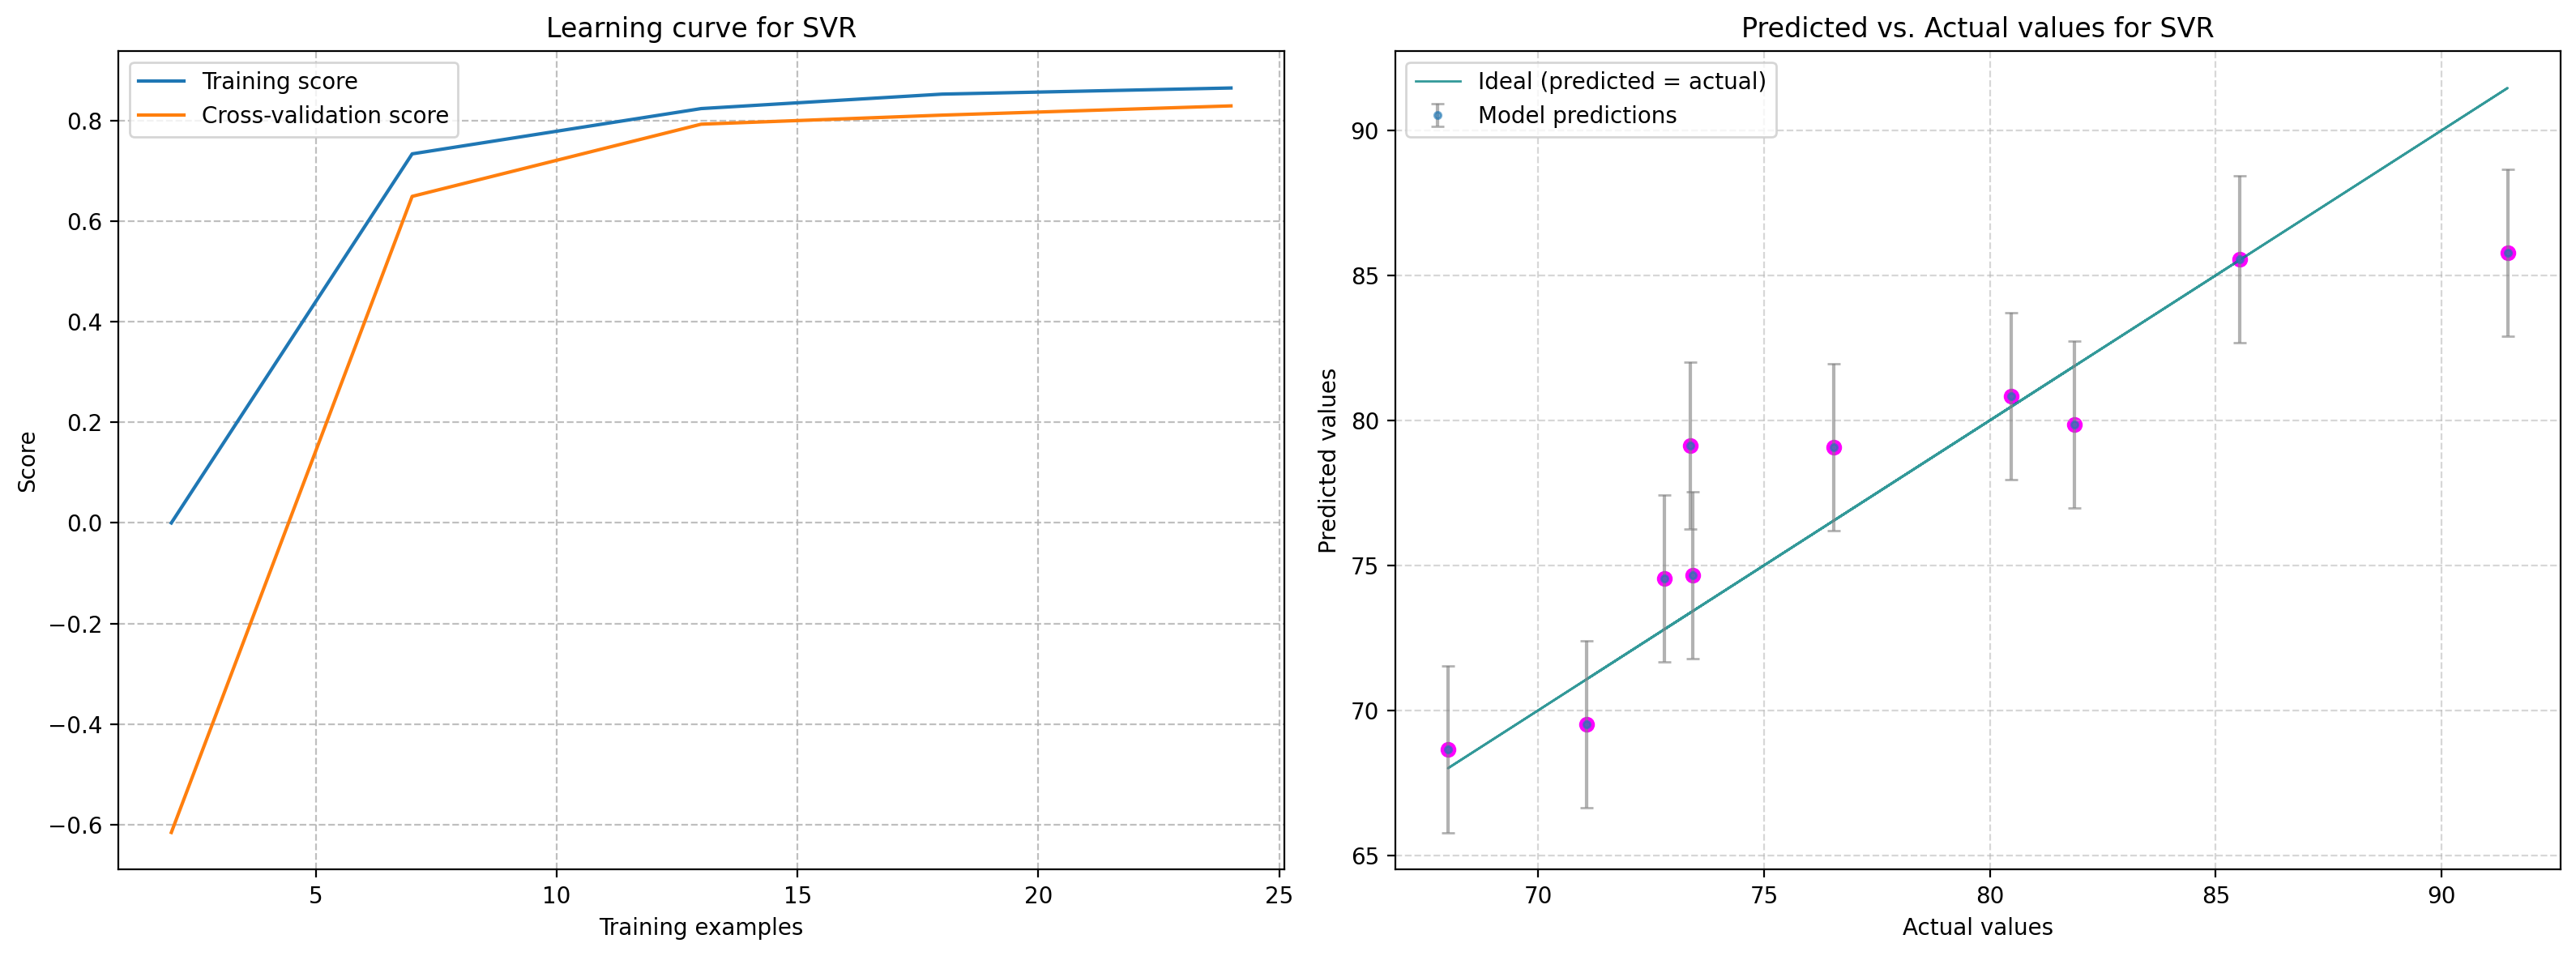

-----Random Forest------------------------------ 
  Best hyperparameters --> {'rf__max_depth': None, 'rf__n_estimators': 50}
    Best hyperparameters mean CV score --> 0.92059
Performance on test set: 
   R² score --> 0.84714
   RMSE --> 2.69676


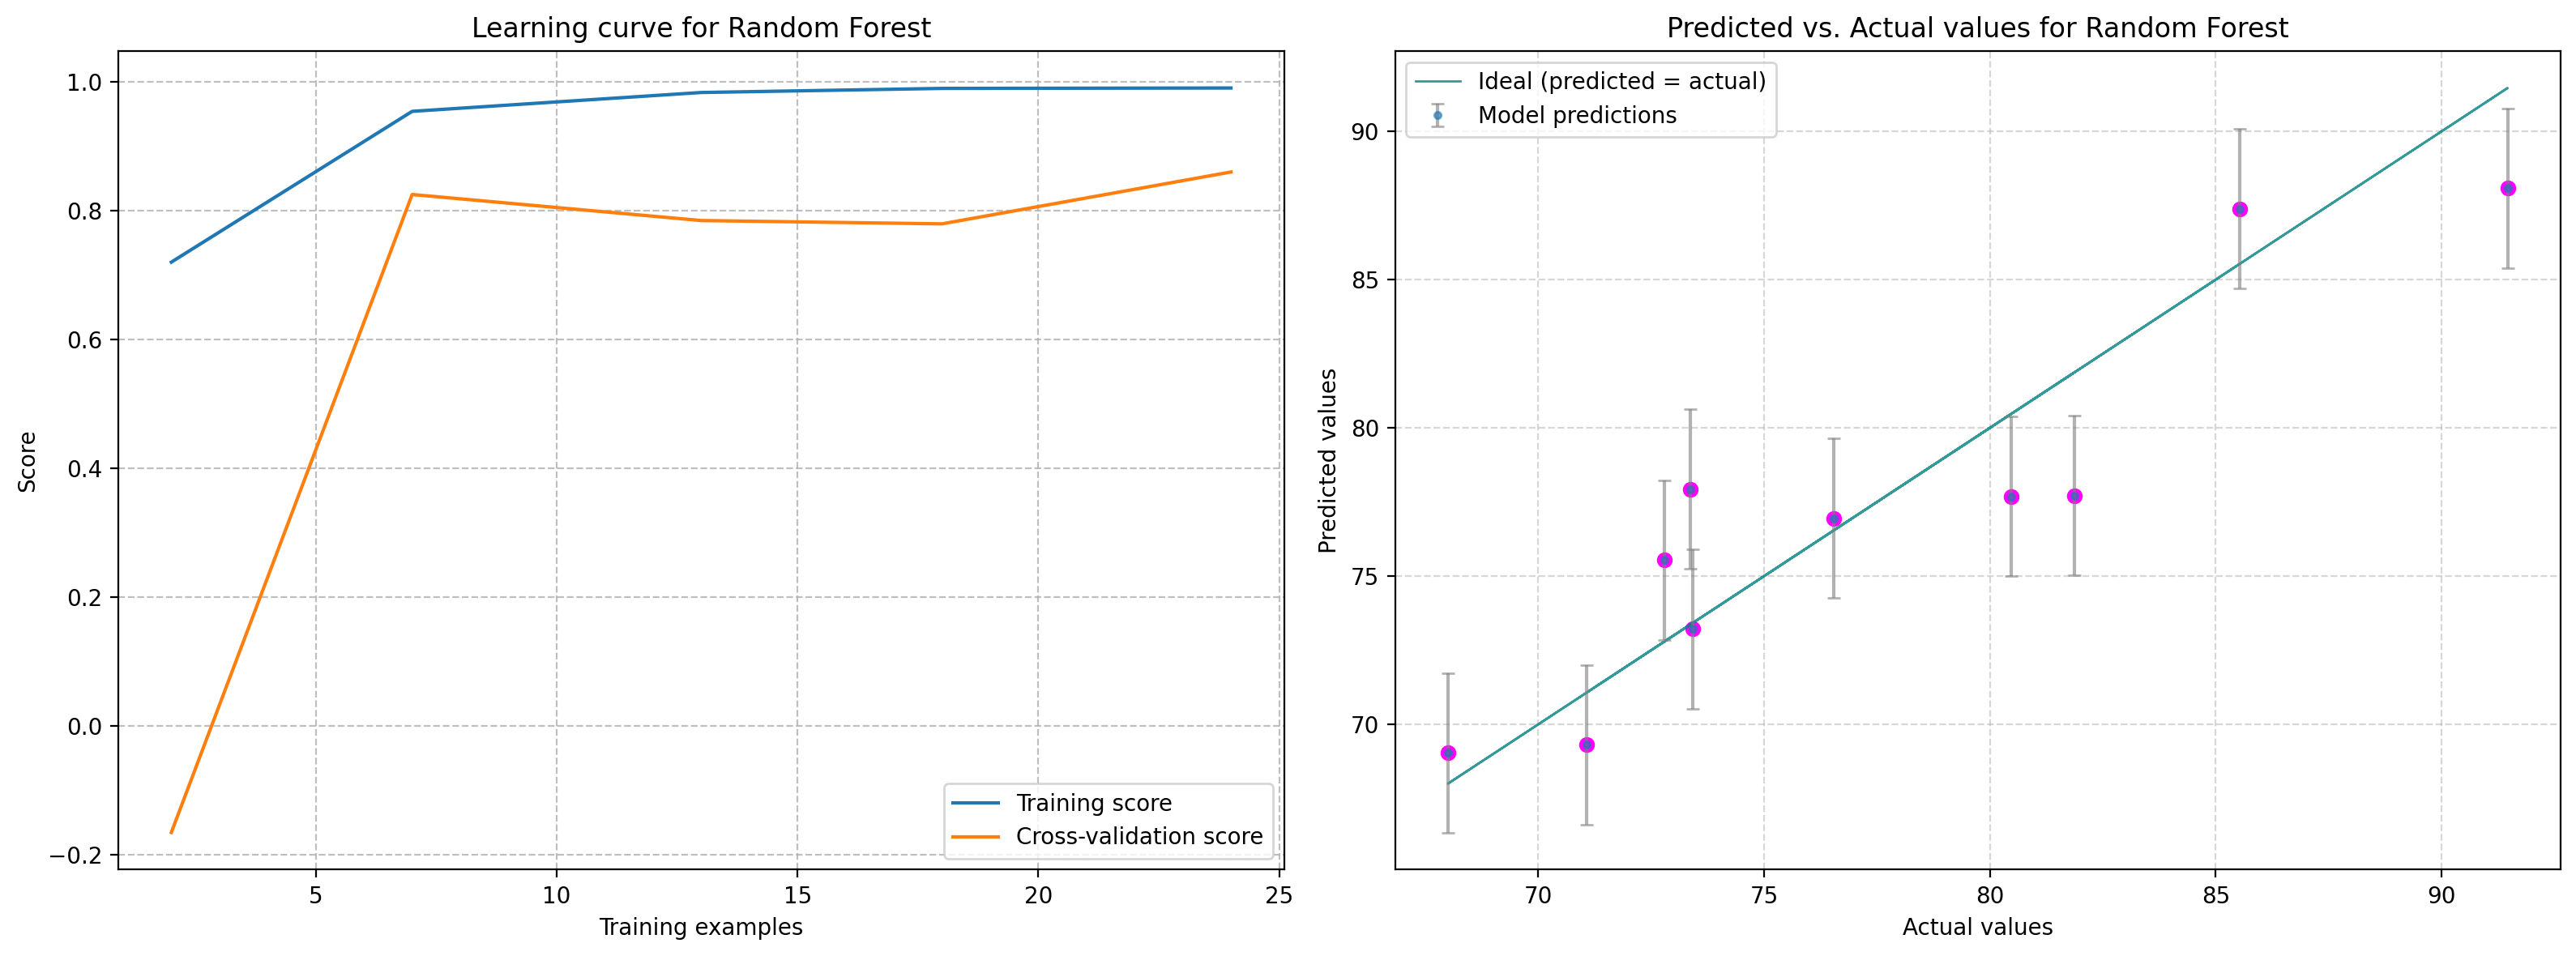

In [ ]:
# TRAIN-TEST SPLITTING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Transform the target variable
y_train_log = logistic_transform(y_train / 100)
y_test_log = logistic_transform(y_test / 100)

# CROSS-VALIDATION SETTINGS
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_params = {}
trained_models = {}

# TRAINING THE MODELS
for model_name, pipeline in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid)
    grid_search.fit(X_train, y_train_log)

    ## SAVE AND PRINT BEST MODEL PARAMETERS
    best_params[model_name] = grid_search.best_params_
    print(f"{'-'*5}{model_name}{'-'*30} \n  Best hyperparameters --> {grid_search.best_params_}\n\
    Best hyperparameters mean CV score --> {round(grid_search.best_score_, 5)}")

    ## PERFORMANCE EVALUATION ON THE TEST SET
    y_pred_log = grid_search.best_estimator_.predict(X_test)

    # Convert predictions back to the original scale
    y_pred = inverse_logistic_transform(y_pred_log) * 100

    r2 = round(r2_score(y_test, y_pred), 5)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 5)
    print(f"Performance on test set: \n   R² score --> {r2}\n   RMSE --> {rmse}")

    ## MODEL PERFORMANCE PLOTS
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), dpi=200)

    ### learning curve plot
    train_sizes, train_scores, val_scores = learning_curve(grid_search.best_estimator_, X_train, y_train_log, cv=kf)
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    axs[0].plot(train_sizes, train_scores_mean, label='Training score')
    axs[0].plot(train_sizes, val_scores_mean, label='Cross-validation score')
    axs[0].set_xlabel('Training examples')
    axs[0].set_ylabel('Score')
    axs[0].set_title(f'Learning curve for {model_name}')
    axs[0].legend(loc='best')
    axs[0].grid(True, linestyle='--', alpha=0.8)

    ### prediction vs. actual plot with error bars
    error_margin = np.std(y_pred - y_test)

    axs[1].plot(y_test, y_test, linewidth=1, color='teal', label='Ideal (predicted = actual)', alpha=0.8)
    axs[1].scatter(y_test, y_pred, marker='o', color='magenta')
    axs[1].errorbar(y_test, y_pred, yerr=error_margin, fmt='.', ecolor='grey',\
                    capsize=3, label='Model predictions', alpha=0.6)
    axs[1].set_xlabel('Actual values')
    axs[1].set_ylabel('Predicted values')
    axs[1].set_title(f'Predicted vs. Actual values for {model_name}')
    axs[1].legend(loc='best')
    axs[1].grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    # SAVE MODEL
    trained_models[model_name] = grid_search.best_estimator_


##Predictions

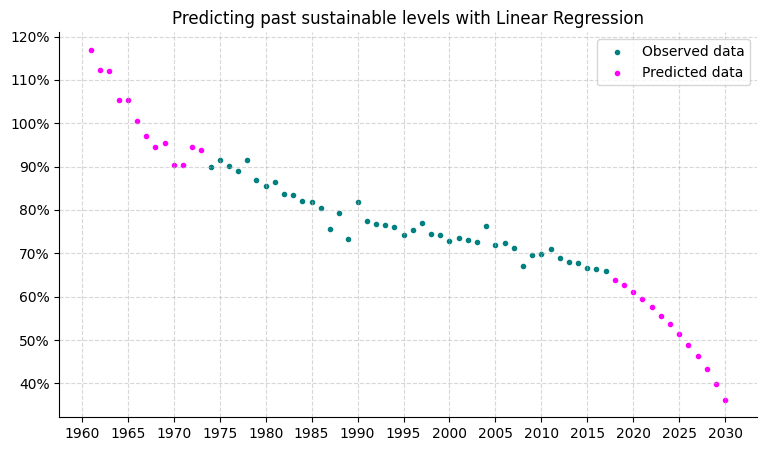

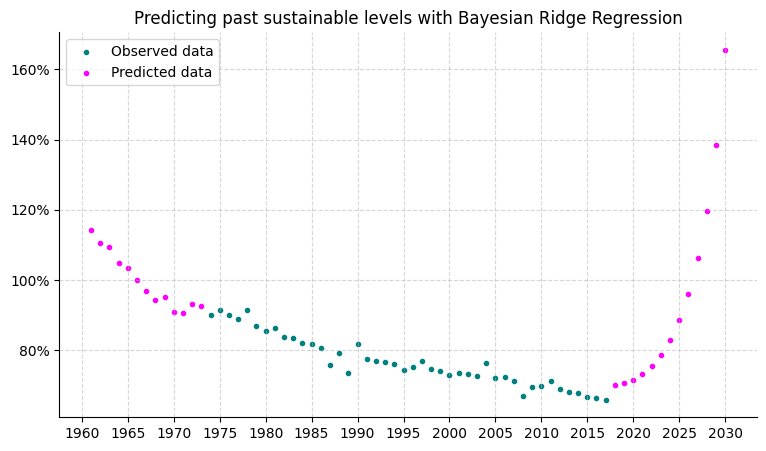

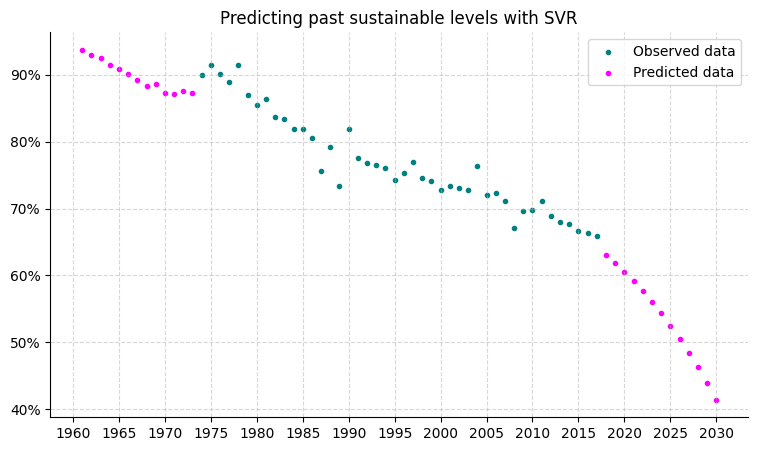

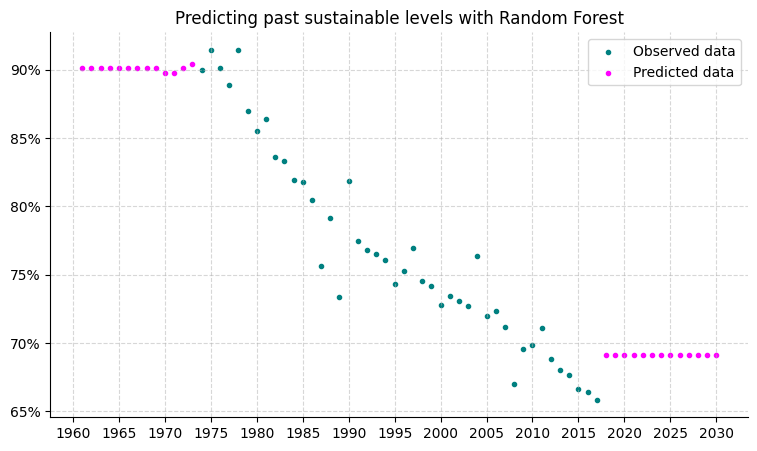

In [ ]:
# each model with its predictions will be saved in a dict
predictions = {}

for model_name, model in trained_models.items():
  log_pred = model.predict(X_new)
  predictions[model_name] = inverse_logistic_transform(log_pred) * 100

# plotting the results
for model_name, y_pred in predictions.items():
  plt.figure(figsize=(9, 5))
  plt.title(f"Predicting past sustainable levels with {model_name}")

  plt.scatter(df5_world['Year'], df5_world['sustainable'], color='teal', label='Observed data', marker='.')
  plt.scatter(X_new.index, y_pred, color='magenta', label='Predicted data', marker='.')

  plt.legend()
  plt.xticks(np.arange(1960, 2035, step=5))
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
  plt.show()

* Clipping points that exceed 100%

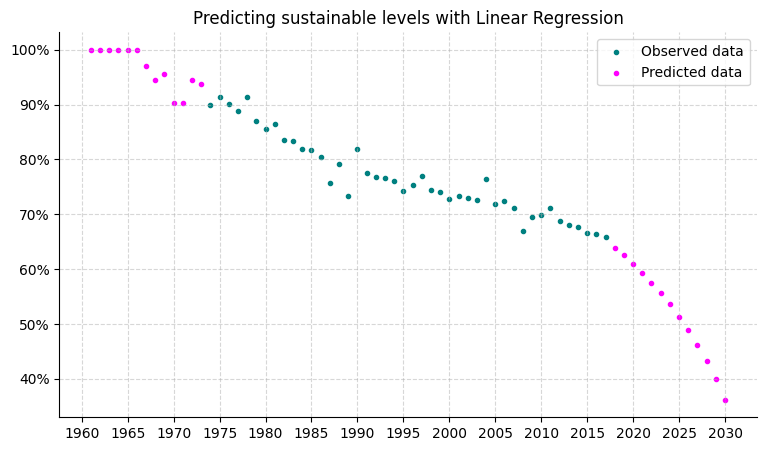

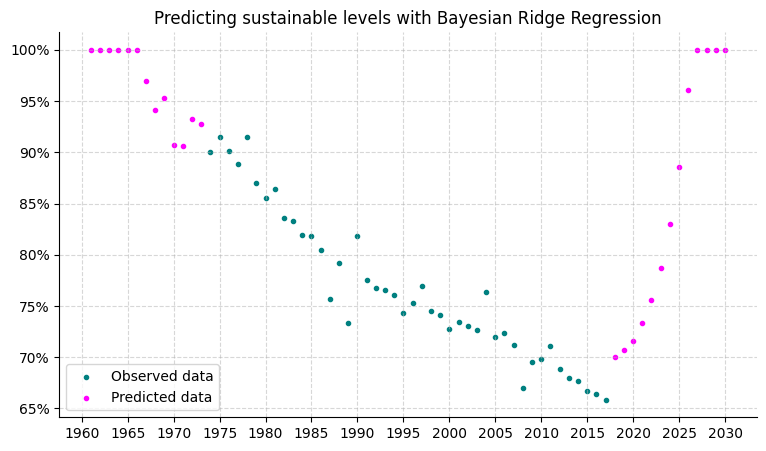

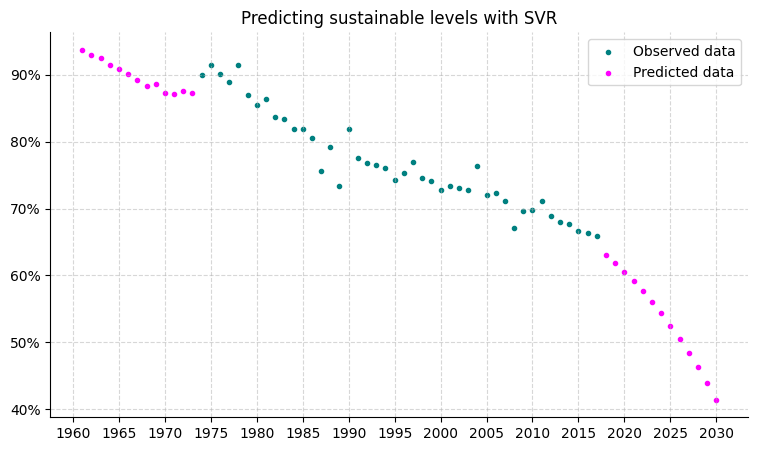

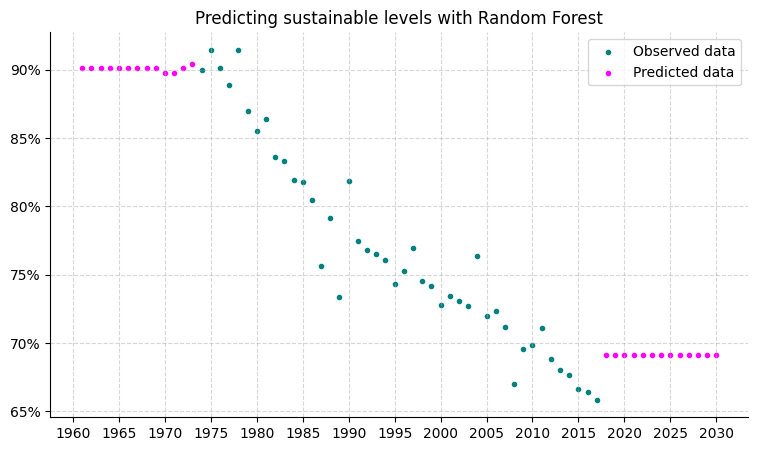

In [ ]:
# Clip the predictions in the dictionary
for model_name, y_pred in predictions.items():
    # Clip predictions to ensure they do not exceed 100%
    predictions[model_name] = np.clip(y_pred, a_min=0, a_max=100)

# Plotting the results
for model_name, y_pred_clipped in predictions.items():
    plt.figure(figsize=(9, 5))
    plt.title(f"Predicting sustainable levels with {model_name}")

    plt.scatter(df5_world['Year'], df5_world['sustainable'], color='teal', label='Observed data', marker='.')
    plt.scatter(X_new.index, y_pred_clipped, color='magenta', label='Predicted data', marker='.')

    plt.legend()
    plt.xticks(np.arange(1960, 2035, step=5))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
    plt.show()

##🔹Final result

In [ ]:
[key for key in(predictions.keys())]

['Linear Regression', 'Bayesian Ridge Regression', 'SVR', 'Random Forest']

In [ ]:
chosen_model = 'Linear Regression'    # choose from list above
forecast_values = predictions[chosen_model]
forecast_years = list(range(1961, 1974)) + list(range(2018, 2031))

# create a df for forecasts
df_forecasts = pd.DataFrame({
    'Year': forecast_years,
    'sustainable': forecast_values
    })

# create a complete df
df_combined = pd.concat([df5_world, df_forecasts], ignore_index=True)
df_combined = df_combined.drop_duplicates(subset='Year', keep='last')
df_combined = df_combined.sort_values(by='Year').reset_index(drop=True)
df_combined.shape

(70, 2)

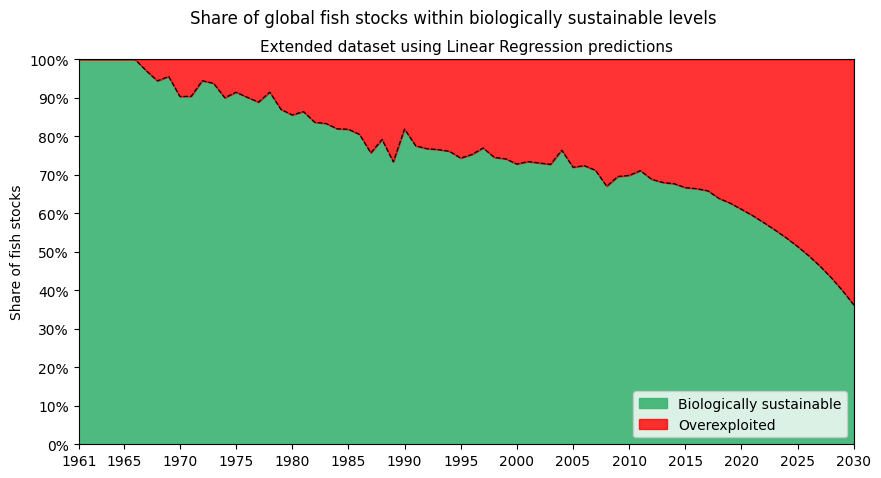

In [ ]:
# final plot
plt.figure(figsize=(10, 5))
plt.suptitle("Share of global fish stocks within biologically sustainable levels")
plt.title(f'Extended dataset using {chosen_model} predictions', fontsize=11)
plt.ylabel('Share of fish stocks')

plt.plot(df_combined['Year'], df_combined['sustainable'], color='black', linewidth=0.9, linestyle='--')
plt.fill_between(df_combined['Year'], 0, df_combined['sustainable'], label="Biologically sustainable", color="mediumseagreen", alpha=0.9)
plt.fill_between(df_combined['Year'], df_combined['sustainable'], 100, label="Overexploited", color="red", alpha=0.8)

plt.legend(fontsize=10, loc="lower right")
default_ticks = np.arange(1960, 2035, step=5)
custom_ticks = sorted(set(default_ticks) | {1961})
plt.xticks(custom_ticks)
plt.yticks(np.arange(0, 110, step=10))
plt.xlim((1961, 2030))
plt.ylim(0, 100)
# plt.grid(True, linestyle='--', color='black', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
print(f'Forecast of sustainable levels for year 2030: {forecast_values[-1]:.1f}%')

36.2013655634815